## Imports

In [1]:
%matplotlib widget

from importlib import reload

import functools
import logging
import os
import pathlib
import time

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import fitsio
import pyds9

In [7]:
import hxstack as hx
import hxdisplay as hxdisp
import nirander
import pfsutils
reload(hx)
reload(hxdisp)
reload(nirander)

2020-04-10 18:34:28.187Z butler           10 butler.py:69 loaded butler from {'pfi': {'template': 'pfi/PFI.yaml', 'loader': <bound method YAML.load of <ruamel_yaml.main.YAML object at 0x7fe509272f90>>}, 'modulePath': {'template': 'pfi/cobras/{moduleName}'}, 'cobraGeometry': {'template': 'pfi/cobras/{moduleName}/{cobraInModule}/geometry.yaml', 'loaderModule': 'ics.cobraCharmer.cobra'}, 'moduleXml': {'template': 'pfi/modules/{moduleName}/{moduleName}{version}.xml', 'loaderModule': 'ics.cobraCharmer.pfiDesign'}, 'motorMap': {'template': 'pfi/cobras/{moduleName}/{cobraModuleId}/maps/{motor}_{direction}_{mapName}.yaml', 'loaderModule': 'ics.cobraCharmer.motormap'}, 'configRoot': {'template': '/data/pfsx/config'}}, for {'fpsRun': {'template': 'pfs/{pfsDay}/fps/{visit:06d}'}, 'spsFile': {'template': 'pfs/{pfsDay}/sps/PF{site}A{visit:06d}{spectrograph}{armNum}.fits'}, 'rampFile': {'template': 'pfs/{pfsDay}/sps/PF{site}B{visit:06d}{spectrograph}{armNum}.fits'}, 'mcsFile': {'template': 'pfs/{pfs

<module 'nirander' from '/data/pfsx/notebooks/nirander.py'>

In [24]:
maskPath = nirander.nirButler.getPath('mask', idDict=dict(visit=9000))
fitsio.write(maskPath, data=badMask.astype('u2'), clobber=True)

In [4]:
%store -r badMask

In [5]:
d1 = pyds9.DS9('disp1', start=True)
d2 = pyds9.DS9('disp2', start=True)
d3 = pyds9.DS9('disp3', start=True)

cam = 'n1'

# Acquisition notes, 2019

## 2019-04-04

Pumpdown, with 18315 and ASIC 120
Configured as warmNoIrp (IRP looks strange when warm).

Taking nreset=1 nread=3 ramps every 15 minutes

- 2067....2137 or so

## 2019-04-05

Baking, SAM off.

## 2019-04-10

Done baking. SAM on at 310K, warmNoIrp

- 2145 looks fine, 
- 2146, turn off gauge. noise unchanged, back on.

- 2147 on, taking nreset=1 nread=3 ramps every 15 min.

## 2019-05-01

About to start cooling. SAM on at 300K, warmNoIrp

- 3620 looks good

- 3623... warmNoIrp 5-read ramps every 10 min.

## 2019-05-15

About to start pumping. ASIC mounted loosely. warmNoIrp

- 3683 OK

## 2019-05-22

About to start cooling

- 3685 OK
- 3686 15m 3-read loop
   Went bad at ~250K
- 3714 SPI ok, but image still bad. 
  reconfig
  
- 3715 image good

## 2019-12-19

Changed ASIC-H4 cable

- 3914 10xdark. Looks OK!
    n.b.: 3913 on b9 ROIC was good
    
## 209-12-23

Starting cooldown

- 3916..3974 warmNoIrp 5xdark down to ~230K. OK

Switched to cold, with IRP

- 3918  5xdark /10min OK
- 3919..4067 same. ~3990 change to spots at ~210K
- 4068..4527 20xdark /15m

- 4234, 123K/104K looks good.
- 4527, 123K/104K looks good.

# Acquisition notes, 2020

## 2020-01-03

Turned off ASIC for a couple of hours

- 4528, 116K/101K, looks good : CPL -- compare with 4527
    Actually, "dark curent" is a hair higher (1.6 vs 1.4e-/s. So checking
- 4529, 1.5 e-/s
- 4530, 1.47e-/s, so OK.
- 4531, oops, 50-read ramp. Could be useful.

Checking ion gauge noise.

- 4532-3, 5-read ramps

gauge off

- 4534-6, 5-read ramps. Hmm. Look closer, CPL

gauge on

- 4537-9 5-read ramps.

## 2020-01-06

Warm up. Detector heater on power=70. 17h30 Eastern

- 4540 5-read. Oklahoma more visible. Lower bacground?
- 4541 5-read. OK more normal, but 0.8e-/s background?
- 4542 5-read. Back to 1.5e-/s

## 2020-02-13

New cable.

- 4697 cryostat open. detector good.

## 2020-02-24

Eep: detector cold, turn stuff on....

- 4716 alive. noisy. saturated 99K/103K
- 4717 20-read 
- 4718 5-reset 5-read saturated

coldNoIrp

- 4719 5-read, still saturated

lights off in cleanroom

- 4720 5-read. yay! positive slope! 25 e-/s

Back to IRP

- 4723 20-read

Room made dark

- 4736 30-read noIRP 1.3e-/s

Starting to look for spots

- 4742 10-read no IRP ~20pix saturated spot ~16 mA
- 4743 4-read, not saturated
- 4744 3-read

## 2020-02-27

Focus range

- 4751, home, 15pix spot
- 4752, 125um, 25pix spot
- 4753, 250um, 36pix spot

Replaced 1080AA lamp with 672AA

Back to 10800nm, added cracked ND3

- 4770 5um 8pix
- 4771 50um 5pix
- 4772 100um 5pix
- 4773 150um 6pix

## 2020-02-28

Lowering intensity

- 4803 50mA, 90um
- 4810 25mA, 90um
- 4811 10mA, 90um
- 4812 3mA, 90um

Darks

- 4813..14 50-read 
- 4815..16 100-read

Light back on, 3mA

- 4818 50-read. Clipped at ~10 (check further)
- 4819..4841 5-read, stepping through focus
- 4845..4879 5-read, another focus sweep, with more 1um steps (85um..110um)

## 2020-03-02

Check

- 4880, 10-read

Change DSub to 0.6. Note measured quite a bit higher.

- 4881, 10-read

To coldNoIRP for basic tuning. Note that gain is 0dB

- 4883, Vrefmain=~1.8, read0 background ~29k
- 4884, Vrefmain=~1.6, read0 background ~32k

Raising gain to 2.82 (gain=5), Vrefmain=1.6V

- 4886, 3-read. Dsub=0.6V (reads as 1.0). Vrefmain=1.6V Bkgd~32k, spot peak~4600
- 4887, 3-read. Vrefmain=2.0V. bkgnd=~13k, peak~4500
- 4888, 3-read. Vrefmain=2.1V, bkgnd=~6500, peak~4500 (bkgnd too low.)
- 4889, 20-read. Vrefmain=2.0V, bknd=~13k, peak~41k
- 4890, 30-read. bknd~13k, peak~50k
- 4891, 50-read. bkgnd~13k, peak~50k

Focus scan again

- 4892..4912, 5-read

## 2020-03-04

Added LED hedgehog, etc.

- 4920 LED 3mA, spot at 1300,1560?
- 4921 LED at 19 mA, Meade X at home. No obvious spot, so that 1300,1560 was not it

- 4923 10-read, focus at 100um, LED at 5mA, Meade centered in both axes.
- 4924 Same, but with focus at 130um

Motor controller problems

- 4935-7, at mot=25500,14500 three focus positions
- 4938, mot=26000,14500, foc=100
- 4939, mot=26000,15000, foc=100

## 2020-03-05

Motor scales

- 4962..4971 see below
- 4973, 20-read dark right after LED off
- 4974.., 20-read wih LED back on.

## 2020-03-08

Turn off LED

- 5037 100-read ramp with LED on until read ~20.
- 5038 100-read, LED off

## 2020-03-10

Better motor scales


## 2020-03-11

Readnoise and persistence, etc. for JEG
Background is ugly, so back to IRP: cold, Vrefmain=2.0V, DSub=0.6V

- 5138, 5139 - 50-read 

## 2020-03-13

Hedgehog in
IRP: cold, Vrefmain=2.0V, DSub=0.6V

- 5140 5-read, no LED (I do not think)
- 5142 5-read, 1085@100 no spot
- 5143 20-read, no spot
- 5144 50-read, barely visil

ND4 filter removed

- 5145, 10-read. Bright, saturating in one read.
- 5156, 10-read, 10%, good level at 5 reads
- 5147, 3-reads, 25%
- 5148, 3-reads, 30% Nice, but background ring

Redarkened room. Found entry room light on.

- 5149, 3-read, 30% No ring, ~15e-/s background

Taking a couple of reference "background" ramps

- 5150-5151, 20-read darks
- 5152, 3-read 1085@30% 

- 5154-8 20-read, 1085@30%

Turn LED off

- 5159-66 20-read darks -- good for persistence

## 2020-03-14

- 5167-75 20-read darks, no persistence goot for superDark

LED 1085 @ 30%

- 5176, 3-read

## 2020-03-17

Smee: Telescope mount fiddled with, and motor control LEDs suppressed.

- 5177-9 10-read "darks" Wel, with LED on by mistake
- 5180-5 same?

- 5186 10-read, LED off.

## 2020-03-24

OK, scans.

- 5216-20 superdark, 5 * 10-reas
- 5274-83 yscan: x=30000, y=5000..23000
- 5284-93 xscan: y=14500, x=6000..51000

## 2020-03-25..28 

Development. Test data, mostly.

## 2020-03-29

- 5863..7 5-ramp 5-dark stack

Damnit. Rebooted

## 2020-04-07

Swapped x in images. Now wavelength increases with X.

- 7905..8156 Focus checks, at 88, 2040, 4000 and other rows
- 8157..8161 dark set for superdark
- 8268..2105 dither set. Server reboot killed it at start of 970

## 2020-04-10

After several reboots, restarting dither set

- 


# Take new superdark, save, load new calibration object

In [1252]:
focusCheck.visit

0      7905
1      7906
2      7907
3      7908
4      7909
       ... 
247    8152
248    8153
249    8154
250    8155
251    8156
Name: visit, Length: 252, dtype: int64

In [11]:
reload(nirander)
meade = nirander.NirIlluminator()
meade.ledsOff()
meade.getPix()

2020-04-10 18:59:23.993Z butler           10 butler.py:69 loaded butler from {'pfi': {'template': 'pfi/PFI.yaml', 'loader': <bound method YAML.load of <ruamel_yaml.main.YAML object at 0x7fe509268250>>}, 'modulePath': {'template': 'pfi/cobras/{moduleName}'}, 'cobraGeometry': {'template': 'pfi/cobras/{moduleName}/{cobraInModule}/geometry.yaml', 'loaderModule': 'ics.cobraCharmer.cobra'}, 'moduleXml': {'template': 'pfi/modules/{moduleName}/{moduleName}{version}.xml', 'loaderModule': 'ics.cobraCharmer.pfiDesign'}, 'motorMap': {'template': 'pfi/cobras/{moduleName}/{cobraModuleId}/maps/{motor}_{direction}_{mapName}.yaml', 'loaderModule': 'ics.cobraCharmer.motormap'}, 'configRoot': {'template': '/data/pfsx/config'}}, for {'fpsRun': {'template': 'pfs/{pfsDay}/fps/{visit:06d}'}, 'spsFile': {'template': 'pfs/{pfsDay}/sps/PF{site}A{visit:06d}{spectrograph}{armNum}.fits'}, 'rampFile': {'template': 'pfs/{pfsDay}/sps/PF{site}B{visit:06d}{spectrograph}{armNum}.fits'}, 'mcsFile': {'template': 'pfs/{pfs

array([846.33751231,  87.5892356 ])

In [13]:
# Take and save a fresh dark
dark = nirander.takeSuperDark(meade, force=True, nread=5, nexp=5)
nirander.nirButler.put(dark, 'dark', dict(visit=dark.visit0))

2020-04-10 19:22:26.820Z butler           10 butler.py:303 dumping dark({'visit': 10396}) = <class 'darkCube.DarkCube'> to /data/pfsx/redux/n1/calibs/dark-010396-n1.fits


In [14]:
%store -r badMask

In [15]:
reload(hx)
hxCalib = hx.HxCalib('n1', darkStack=dark, badMask=badMask)

# Bootstrap motor scales

In [863]:
# Bootstrap: do it manually
xx = np.arange(6000,55000,5000)
yy = np.arange(5000,25000,2000)
xc = 30000
yc = 14500
print(len(xx), len(yy))

yscan = nirander.motorScan(meade, xc, yy, led=(1085,30), posInPixels=False)
xscan = nirander.motorScan(meade, xx, yc, led=(1085,30), posInPixels=False)
scans = pd.concat([xscan, yscan])

xScaleSet = nirander.measureSet(xscan, hxCalib)
yScaleSet = nirander.measureSet(yscan, hxCalib)

10 10


In [923]:
allSscan =  pd.concat(sscan2, ignore_index=True)
nirander.measureSet(allSscan, hxCalib)

,visit,xstep,ystep,x2,y2,xpix,ypix,flux,peak,size
0,7847,56025,4518,1.063501,1.087451,104.163932,201.584615,70580.203125,19013.484375,1.075476
1,7848,56902,13963,1.025589,1.019884,104.251276,2001.334522,72334.156250,18577.990234,1.022737
2,7849,57619,24256,1.041637,1.131006,103.871540,3898.555007,67495.210938,16308.580078,1.086322
3,7850,21553,4479,1.007685,1.087597,2702.194731,199.738471,65667.023438,11488.736328,1.047641
4,7851,21262,13985,1.080545,1.079190,2703.258965,2001.511978,63435.042969,11398.369141,1.079867
5,7852,21095,24344,1.108682,1.219771,2702.891966,3899.685826,65851.625000,9493.898438,1.164227
6,7853,4572,4546,1.105766,1.241375,3986.317338,197.572849,32321.669922,7372.956543,1.173570
7,7854,3699,14006,1.012094,0.827890,3988.039795,1999.763152,26558.392578,8721.922852,0.919992
8,7855,3091,24319,1.034558,1.210633,3985.616535,3902.854944,29738.384766,4629.867188,1.122595


In [924]:
reload(nirander)
meade = nirander.NirIlluminator()

sscan = []
y = [200, 800, 1400, 2000, 2650, 3300, 3900]
# y = [200, 2000, 3900]
pfsutils.oneCmd('xcu_n1', 'motors move piston=110 abs microns')
for w in meade.leds.wave:
    scan1 = nirander.motorScan(meade, None, y, led=w)
    sscan.extend(scan1)
allSscan =  pd.concat(sscan, ignore_index=True)
nirander.measureSet(allSscan, hxCalib)

2020-04-06 17:47:06.332Z butler           10 butler.py:69 loaded butler from {'pfi': {'template': 'pfi/PFI.yaml', 'loader': <bound method YAML.load of <ruamel_yaml.main.YAML object at 0x7fc25c410850>>}, 'modulePath': {'template': 'pfi/cobras/{moduleName}'}, 'cobraGeometry': {'template': 'pfi/cobras/{moduleName}/{cobraInModule}/geometry.yaml', 'loaderModule': 'ics.cobraCharmer.cobra'}, 'moduleXml': {'template': 'pfi/modules/{moduleName}/{moduleName}{version}.xml', 'loaderModule': 'ics.cobraCharmer.pfiDesign'}, 'motorMap': {'template': 'pfi/cobras/{moduleName}/{cobraModuleId}/maps/{motor}_{direction}_{mapName}.yaml', 'loaderModule': 'ics.cobraCharmer.motormap'}, 'configRoot': {'template': '/data/pfsx/config'}}, for {'fpsRun': {'template': 'pfs/{pfsDay}/fps/{visit:06d}'}, 'spsFile': {'template': 'pfs/{pfsDay}/sps/PF{site}A{visit:06d}{spectrograph}{armNum}.fits'}, 'rampFile': {'template': 'pfs/{pfsDay}/sps/PF{site}B{visit:06d}{spectrograph}{armNum}.fits'}, 'mcsFile': {'template': 'pfs/{pfs

['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=110', 'abs', 'microns']


2020-04-06 17:47:08.745Z meade            30 nirander.py:116 send: led 1300 100
2020-04-06 17:47:08.748Z meade            30 nirander.py:124 rcvd: OK, reply: OK
2020-04-06 17:47:08.957Z meade            30 nirander.py:116 send: move 4372 4346
2020-04-06 17:47:28.715Z meade            30 nirander.py:124 rcvd: OK, reply: OK
2020-04-06 17:47:28.717Z meade            30 nirander.py:116 send: move 4572 4546
2020-04-06 17:47:29.425Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 17:48:22.859Z meade            30 nirander.py:116 send: move 4048 7451
2020-04-06 17:48:25.982Z meade            30 nirander.py:124 rcvd: OK, reply: OK
2020-04-06 17:48:25.984Z meade            30 nirander.py:116 send: move 4248 7651
2020-04-06 17:48:26.693Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 17:49:26.988Z meade            30 nirander.py:116 send: move 3758 10607
2020-04-06 17:49:30.419Z meade            30 nirander.py:124 rcvd: OK, reply: OK
2020-04-06 17:49:30.420Z meade            30 nirander.py:116 send: move 3958 10807
2020-04-06 17:49:31.128Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 17:50:21.382Z meade            30 nirander.py:116 send: move 3499 13806
2020-04-06 17:50:24.808Z meade            30 nirander.py:124 rcvd: OK, reply: OK
2020-04-06 17:50:24.810Z meade            30 nirander.py:116 send: move 3699 14006
2020-04-06 17:50:25.518Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 17:51:27.308Z meade            30 nirander.py:116 send: move 3255 17310
2020-04-06 17:51:31.040Z meade            30 nirander.py:124 rcvd: OK, reply: OK
2020-04-06 17:51:31.042Z meade            30 nirander.py:116 send: move 3455 17510
2020-04-06 17:51:31.750Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 17:52:32.879Z meade            30 nirander.py:116 send: move 3049 20842
2020-04-06 17:52:36.611Z meade            30 nirander.py:124 rcvd: OK, reply: OK
2020-04-06 17:52:36.613Z meade            30 nirander.py:116 send: move 3249 21042
2020-04-06 17:52:37.320Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 17:53:37.401Z meade            30 nirander.py:116 send: move 2891 24119
2020-04-06 17:53:40.827Z meade            30 nirander.py:124 rcvd: OK, reply: OK
2020-04-06 17:53:40.829Z meade            30 nirander.py:116 send: move 3091 24319
2020-04-06 17:53:41.539Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 17:54:42.415Z meade            30 nirander.py:116 send: led 1200 33
2020-04-06 17:54:42.417Z meade            30 nirander.py:124 rcvd: OK, reply: OK
2020-04-06 17:54:42.627Z meade            30 nirander.py:116 send: move 8577 4325
2020-04-06 17:55:02.684Z meade            30 nirander.py:124 rcvd: OK, reply: OK
2020-04-06 17:55:02.687Z meade            30 nirander.py:116 send: move 8777 4525
2020-04-06 17:55:03.395Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 17:55:58.341Z meade            30 nirander.py:116 send: move 8306 7435
2020-04-06 17:56:01.463Z meade            30 nirander.py:124 rcvd: OK, reply: OK
2020-04-06 17:56:01.465Z meade            30 nirander.py:116 send: move 8506 7635
2020-04-06 17:56:02.173Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 17:57:03.878Z meade            30 nirander.py:116 send: move 8064 10597
2020-04-06 17:57:07.309Z meade            30 nirander.py:124 rcvd: OK, reply: OK
2020-04-06 17:57:07.311Z meade            30 nirander.py:116 send: move 8264 10797
2020-04-06 17:57:08.018Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 17:58:08.415Z meade            30 nirander.py:116 send: move 7849 13801
2020-04-06 17:58:11.843Z meade            30 nirander.py:124 rcvd: OK, reply: OK
2020-04-06 17:58:11.845Z meade            30 nirander.py:116 send: move 8049 14001
2020-04-06 17:58:12.554Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 17:59:14.306Z meade            30 nirander.py:116 send: move 7648 17310
2020-04-06 17:59:18.038Z meade            30 nirander.py:124 rcvd: OK, reply: OK
2020-04-06 17:59:18.040Z meade            30 nirander.py:116 send: move 7848 17510
2020-04-06 17:59:18.749Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 18:00:19.499Z meade            30 nirander.py:116 send: move 7479 20848
2020-04-06 18:00:23.233Z meade            30 nirander.py:124 rcvd: OK, reply: OK
2020-04-06 18:00:23.235Z meade            30 nirander.py:116 send: move 7679 21048
2020-04-06 18:00:23.944Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 18:01:24.772Z meade            30 nirander.py:116 send: move 7351 24130
2020-04-06 18:01:28.202Z meade            30 nirander.py:124 rcvd: OK, reply: OK
2020-04-06 18:01:28.204Z meade            30 nirander.py:116 send: move 7551 24330
2020-04-06 18:01:28.912Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 18:02:29.896Z meade            30 nirander.py:116 send: led 1085 30
2020-04-06 18:02:29.898Z meade            30 nirander.py:124 rcvd: OK, reply: OK
2020-04-06 18:02:30.107Z meade            30 nirander.py:116 send: move 21353 4279
2020-04-06 18:02:50.170Z meade            30 nirander.py:124 rcvd: OK, reply: OK
2020-04-06 18:02:50.171Z meade            30 nirander.py:116 send: move 21553 4479
2020-04-06 18:02:50.880Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 18:03:45.688Z meade            30 nirander.py:116 send: move 21241 7399
2020-04-06 18:03:48.813Z meade            30 nirander.py:124 rcvd: OK, reply: OK
2020-04-06 18:03:48.815Z meade            30 nirander.py:116 send: move 21441 7599
2020-04-06 18:03:49.524Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 18:04:51.411Z meade            30 nirander.py:116 send: move 21144 10571
2020-04-06 18:04:54.837Z meade            30 nirander.py:124 rcvd: OK, reply: OK
2020-04-06 18:04:54.838Z meade            30 nirander.py:116 send: move 21344 10771
2020-04-06 18:04:55.547Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 18:05:55.010Z meade            30 nirander.py:116 send: move 21062 13785
2020-04-06 18:05:58.441Z meade            30 nirander.py:124 rcvd: OK, reply: OK
2020-04-06 18:05:58.443Z meade            30 nirander.py:116 send: move 21262 13985
2020-04-06 18:05:59.151Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 18:06:50.201Z meade            30 nirander.py:116 send: move 20989 17304
2020-04-06 18:06:53.929Z meade            30 nirander.py:124 rcvd: OK, reply: OK
2020-04-06 18:06:53.931Z meade            30 nirander.py:116 send: move 21189 17504
2020-04-06 18:06:54.639Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 18:07:55.470Z meade            30 nirander.py:116 send: move 20932 20853
2020-04-06 18:07:59.204Z meade            30 nirander.py:124 rcvd: OK, reply: OK
2020-04-06 18:07:59.206Z meade            30 nirander.py:116 send: move 21132 21053
2020-04-06 18:07:59.915Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 18:09:00.055Z meade            30 nirander.py:116 send: move 20895 24144
2020-04-06 18:09:03.481Z meade            30 nirander.py:124 rcvd: OK, reply: OK
2020-04-06 18:09:03.484Z meade            30 nirander.py:116 send: move 21095 24344
2020-04-06 18:09:04.193Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 18:10:04.728Z meade            30 nirander.py:116 send: led 1070 33
2020-04-06 18:10:04.731Z meade            30 nirander.py:124 rcvd: OK, reply: OK
2020-04-06 18:10:04.941Z meade            30 nirander.py:116 send: move 24589 4272
2020-04-06 18:10:24.990Z meade            30 nirander.py:124 rcvd: OK, reply: OK
2020-04-06 18:10:24.991Z meade            30 nirander.py:116 send: move 24789 4472
2020-04-06 18:10:25.700Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 18:11:21.274Z meade            30 nirander.py:116 send: move 24517 7393
2020-04-06 18:11:24.402Z meade            30 nirander.py:124 rcvd: OK, reply: OK
2020-04-06 18:11:24.403Z meade            30 nirander.py:116 send: move 24717 7593
2020-04-06 18:11:25.112Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 18:12:15.951Z meade            30 nirander.py:116 send: move 24457 10566
2020-04-06 18:12:19.377Z meade            30 nirander.py:124 rcvd: OK, reply: OK
2020-04-06 18:12:19.379Z meade            30 nirander.py:116 send: move 24657 10766
2020-04-06 18:12:20.088Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 18:13:20.644Z meade            30 nirander.py:116 send: move 24408 13781
2020-04-06 18:13:24.073Z meade            30 nirander.py:124 rcvd: OK, reply: OK
2020-04-06 18:13:24.075Z meade            30 nirander.py:116 send: move 24608 13981
2020-04-06 18:13:24.780Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 18:14:25.449Z meade            30 nirander.py:116 send: move 24367 17302
2020-04-06 18:14:29.183Z meade            30 nirander.py:124 rcvd: OK, reply: OK
2020-04-06 18:14:29.185Z meade            30 nirander.py:116 send: move 24567 17502
2020-04-06 18:14:29.894Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 18:15:30.750Z meade            30 nirander.py:116 send: move 24339 20851
2020-04-06 18:15:34.479Z meade            30 nirander.py:124 rcvd: OK, reply: OK
2020-04-06 18:15:34.480Z meade            30 nirander.py:116 send: move 24539 21051
2020-04-06 18:15:35.189Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 18:16:36.354Z meade            30 nirander.py:116 send: move 24324 24143
2020-04-06 18:16:39.779Z meade            30 nirander.py:124 rcvd: OK, reply: OK
2020-04-06 18:16:39.781Z meade            30 nirander.py:116 send: move 24524 24343
2020-04-06 18:16:40.489Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 18:17:41.357Z meade            30 nirander.py:116 send: led 1050 19
2020-04-06 18:17:41.360Z meade            30 nirander.py:124 rcvd: OK, reply: OK
2020-04-06 18:17:41.570Z meade            30 nirander.py:116 send: move 27028 4269
2020-04-06 18:18:01.618Z meade            30 nirander.py:124 rcvd: OK, reply: OK
2020-04-06 18:18:01.620Z meade            30 nirander.py:116 send: move 27228 4469
2020-04-06 18:18:02.328Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 18:18:58.521Z meade            30 nirander.py:116 send: move 26986 7390
2020-04-06 18:19:01.644Z meade            30 nirander.py:124 rcvd: OK, reply: OK
2020-04-06 18:19:01.647Z meade            30 nirander.py:116 send: move 27186 7590
2020-04-06 18:19:02.356Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 18:20:02.646Z meade            30 nirander.py:116 send: move 26953 10563
2020-04-06 18:20:06.077Z meade            30 nirander.py:124 rcvd: OK, reply: OK
2020-04-06 18:20:06.078Z meade            30 nirander.py:116 send: move 27153 10763
2020-04-06 18:20:06.787Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 18:21:08.318Z meade            30 nirander.py:116 send: move 26929 13778
2020-04-06 18:21:11.748Z meade            30 nirander.py:124 rcvd: OK, reply: OK
2020-04-06 18:21:11.749Z meade            30 nirander.py:116 send: move 27129 13978
2020-04-06 18:21:12.458Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 18:22:13.809Z meade            30 nirander.py:116 send: move 26913 17299
2020-04-06 18:22:17.537Z meade            30 nirander.py:124 rcvd: OK, reply: OK
2020-04-06 18:22:17.539Z meade            30 nirander.py:116 send: move 27113 17499
2020-04-06 18:22:18.247Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 18:23:17.904Z meade            30 nirander.py:116 send: move 26906 20849
2020-04-06 18:23:21.636Z meade            30 nirander.py:124 rcvd: OK, reply: OK
2020-04-06 18:23:21.638Z meade            30 nirander.py:116 send: move 27106 21049
2020-04-06 18:23:22.346Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 18:24:24.131Z meade            30 nirander.py:116 send: move 27108 24341
2020-04-06 18:24:27.861Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 18:25:28.731Z meade            30 nirander.py:116 send: led 970 83
2020-04-06 18:25:28.734Z meade            30 nirander.py:124 rcvd: OK, reply: OK
2020-04-06 18:25:28.943Z meade            30 nirander.py:116 send: move 46019 4281
2020-04-06 18:25:48.979Z meade            30 nirander.py:124 rcvd: OK, reply: OK
2020-04-06 18:25:48.981Z meade            30 nirander.py:116 send: move 46219 4481
2020-04-06 18:25:49.689Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 18:26:44.788Z meade            30 nirander.py:116 send: move 46411 7593
2020-04-06 18:26:48.214Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 18:27:38.516Z meade            30 nirander.py:116 send: move 46592 10757
2020-04-06 18:27:41.946Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 18:28:32.656Z meade            30 nirander.py:116 send: move 46763 13964
2020-04-06 18:28:36.087Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 18:29:27.178Z meade            30 nirander.py:116 send: move 46934 17475
2020-04-06 18:29:30.915Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 18:30:21.552Z meade            30 nirander.py:116 send: move 47093 21015
2020-04-06 18:30:25.280Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 18:31:16.081Z meade            30 nirander.py:116 send: move 47227 24298
2020-04-06 18:31:19.810Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 18:32:10.278Z meade            30 nirander.py:116 send: led 930 40
2020-04-06 18:32:10.280Z meade            30 nirander.py:124 rcvd: OK, reply: OK
2020-04-06 18:32:10.489Z meade            30 nirander.py:116 send: move 55825 4318
2020-04-06 18:32:30.540Z meade            30 nirander.py:124 rcvd: OK, reply: OK
2020-04-06 18:32:30.541Z meade            30 nirander.py:116 send: move 56025 4518
2020-04-06 18:32:31.248Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 18:33:26.301Z meade            30 nirander.py:116 send: move 56338 7618
2020-04-06 18:33:29.731Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 18:34:20.632Z meade            30 nirander.py:116 send: move 56631 10769
2020-04-06 18:34:24.060Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 18:35:14.631Z meade            30 nirander.py:116 send: move 56902 13963
2020-04-06 18:35:18.057Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 18:36:10.280Z meade            30 nirander.py:116 send: move 57172 17460
2020-04-06 18:36:14.011Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 18:37:13.711Z meade            30 nirander.py:116 send: move 57416 20986
2020-04-06 18:37:17.440Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-06 18:38:08.477Z meade            30 nirander.py:116 send: move 57619 24256
2020-04-06 18:38:12.206Z meade            30 nirander.py:124 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


,visit,xstep,ystep,x2,y2,xpix,ypix,flux,peak,size
0,7856,4572,4546,1.078518,1.135553,3986.851021,197.208679,32379.468750,5581.933594,1.107036
1,7857,4248,7651,1.004772,0.945886,3986.201098,799.906376,30850.914062,10489.267578,0.975329
2,7858,3958,10807,0.960235,0.895149,3985.655817,1401.277209,29370.757812,7921.830078,0.927692
3,7859,3699,14006,1.056443,0.775950,3985.267344,2001.306944,28333.783203,7716.088379,0.916197
4,7860,3455,17510,1.041997,0.824117,3985.064508,2650.460564,28233.433594,6661.690918,0.933057
5,7861,3249,21042,0.995816,1.068628,3984.870735,3299.915906,28869.503906,7264.978516,1.032222
6,7862,3091,24319,1.123282,1.208901,3986.470551,3901.986932,30213.660156,4857.762695,1.166092
7,7863,8777,4525,1.249730,0.805353,3665.247272,198.423200,35543.664062,10161.220703,1.027542
8,7864,8506,7635,0.962435,0.913477,3667.840690,798.959129,63003.035156,21259.914062,0.937956
9,7865,8264,10797,1.001940,0.866135,3665.743766,1400.952533,63506.039062,21072.710938,0.934037


In [975]:
meade.stepsToPix(meade.pixToSteps([4000,4000]))

array([3999.98801115, 4000.06034204])

In [971]:
import skimage.transform
t =  skimage.transform.ProjectiveTransform()

src = allSscan[['xstep', 'ystep']].values.astype('f4')
dst =  allSscan[['xpix', 'ypix']].values
t.estimate(src, dst)#, order=3)
tinv = t.inverse
#tinv.estimate(dst, src, order=3)
#print(np.round(t(src) - dst))
#print(np.round((tinv(dst) - src)/np.array([15.0,6])))
print(t.params)
#print(tinv.params)
#skimage.transform.warp(src,t)

[[-7.29713459e-02  5.03186582e-03  4.18365204e+03]
 [ 2.08787075e-04  1.91548157e-01 -6.78352586e+02]
 [ 2.37363712e-08  2.42779233e-06  9.64776455e-01]]


In [770]:
allSscan =  pd.concat(sscan, ignore_index=True)
nirander.measureSet(allSscan, hxCalib)

,visit,xstep,ystep,x2,y2,xpix,ypix,flux,peak,size
0,7787,3399,3923,3.443433,3.667135,4079.526184,76.586025,63954.078125,5096.628906,3.555284
1,7788,3399,8637,3.057563,3.059011,4039.550227,988.850859,68044.351562,4012.627441,3.058287
2,7789,3399,13966,3.035505,2.825704,4006.440239,1992.300043,61764.675781,4399.399414,2.930605
3,7790,3399,19391,3.263862,3.189429,3980.698312,2995.327230,66612.257812,5961.056152,3.226645
4,7791,3399,24913,4.001386,3.797643,3960.794130,4008.922811,64612.917969,5823.763672,3.899514
5,7792,7851,3923,2.632918,2.658596,3738.587886,81.100073,58756.289062,5504.201172,2.645757
6,7793,7851,8637,2.412852,2.245242,3708.930227,990.238612,61684.015625,4533.938477,2.329047
7,7794,7851,13966,2.446065,2.015237,3677.138434,1994.645029,56046.437500,4358.897949,2.230651
8,7795,7851,19391,2.576860,2.373892,3655.774891,2995.754628,57668.128906,4992.434082,2.475376
9,7796,7851,24913,3.198587,2.821515,3640.540754,4006.846945,58334.992188,5787.978516,3.010051


In [782]:
xscan = allSscan[allSscan.xstep == 57034]
yscan = allSscan[allSscan.ystep == 13966]
print(xscan)
print(yscan)

    visit  xstep  ystep        x2        y2        xpix         ypix  \
30   7817  57034   3923  3.040366  2.933512   17.457224    82.631832   
31   7818  57034   8637  2.899398  3.600604   55.216031   995.074777   
32   7819  57034  13966  2.258472  2.741656   90.010720  2000.003717   
33   7820  57034  19391  2.375196  2.847154  120.232953  3005.893025   
34   7821  57034  24913  2.880426  3.709248  144.671621  4020.397028   

            flux         peak      size  
30  25989.865234  2296.172363  2.986939  
31  31999.636719  2271.082275  3.250001  
32  27341.203125  2326.073486  2.500064  
33  27717.402344  2131.764893  2.611175  
34  26825.416016  2952.411133  3.294837  
    visit  xstep  ystep        x2        y2         xpix         ypix  \
2    7789   3399  13966  3.035505  2.825704  4006.440239  1992.300043   
7    7794   7851  13966  2.446065  2.015237  3677.138434  1994.645029   
12   7799  21227  13966  1.162483  1.180857  2703.156540  1996.311511   
17   7804  24590  13966

In [548]:
xreps, yreps = ditherTest()
pd.concat([xreps, yreps], ignore_index=True)

,visit,xsteps,ysteps,xpix,ypix
0,5568,29690,13966,2010.011662,1999.333632
1,5569,29690,13968,2010.013220,1999.740972
2,5570,29690,13970,2010.015037,2000.071677
3,5571,29690,13972,2010.010387,2000.449243
4,5572,29690,13974,2010.011125,2000.844664
5,5573,29690,13976,2010.009186,2001.160866
6,5574,29690,13978,2010.029588,2001.566628
7,5575,29690,13980,2010.033023,2001.915627
8,5576,29690,13982,2010.092328,2002.214630
9,5577,29690,13984,2010.144784,2002.670001


/software/conda/envs/anaconda_2019.07/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


FigureCanvasNbAgg()

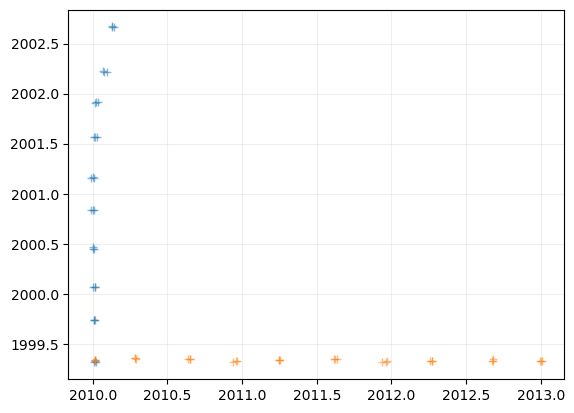

In [546]:
f, pl = plt.subplots()
rreps = xreps
pl.plot(rreps.xpix, rreps.ypix, '+', alpha=0.5)
rreps = yreps
pl.plot(rreps.xpix, rreps.ypix, '+', alpha=0.5)

pl.grid(which='major', alpha=0.2)

f

In [950]:
yreps

,visit,xsteps,ysteps,xpix,ypix
0,5578,29690,13966,2010.017106,1999.341319
1,5579,29695,13966,2010.282150,1999.358689
2,5580,29700,13966,2010.650177,1999.351999
3,5581,29705,13966,2010.965253,1999.333155
4,5582,29710,13966,2011.247978,1999.340860
5,5583,29715,13966,2011.632766,1999.352505
6,5584,29720,13966,2011.963761,1999.325049
7,5585,29725,13966,2012.274564,1999.336952
8,5586,29730,13966,2012.681816,1999.334921
9,5587,29735,13966,2013.007619,1999.335977


## Validate motor scales

FigureCanvasNbAgg()

poly([28578.19474297 22502.44952645   -77.00154733])
poly([13867.61941718  9006.4850141    135.15100759])


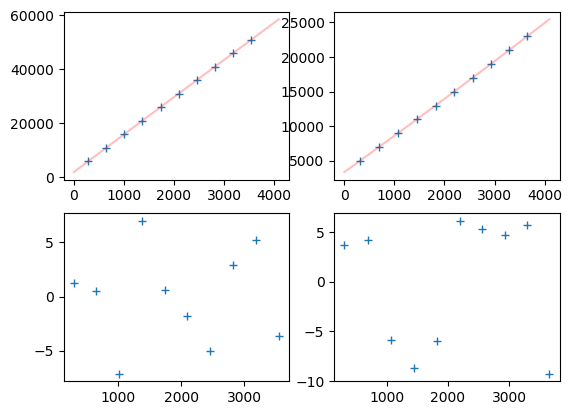

In [402]:
f, pl = plt.subplots(ncols=2, nrows=2)

def plfit(x, y, p0, p1, deg=1):
    p0.plot(x, y, '+')
    fit = np.polynomial.Polynomial.fit(x, y, deg)
    xx = np.linspace(0,4096,1000)
    p0.plot(xx, fit(xx), 'r-', alpha=0.25)
    p1.plot(x, y-fit(x), '+')
    
    return fit

xfit = plfit(scans.xpix[10:], scans.xsteps[10:], *pl[:,0], deg=2)
yfit = plfit(scans.ypix[:10], scans.ysteps[:10], *pl[:,1], deg=2)

print(xfit)
print(yfit)
f

FigureCanvasNbAgg()

poly([28578.19474297 22502.44952645   -77.00154733])
poly([2.84916566e+04 2.25154234e+04 7.07086477e+00])


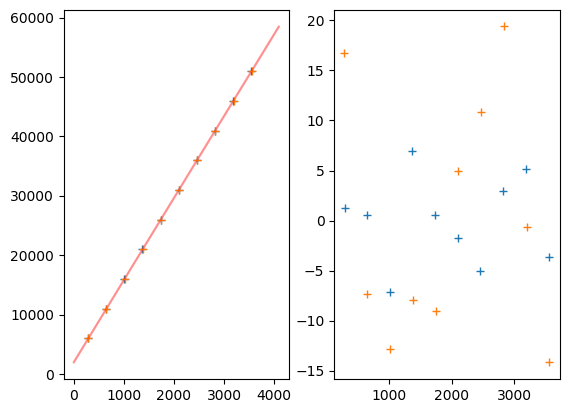

In [890]:
f, pl = plt.subplots(ncols=2, nrows=1)
xfit = plfit(scans.xpix[10:], scans.xsteps[10:], *pl, deg=2)
xfit2 = plfit(xscan2.xpix, xscan2.xsteps, *pl, deg=2)
print(xfit)
print(xfit2)
f

# Detector grid

FigureCanvasNbAgg()

-0.020000425513366307


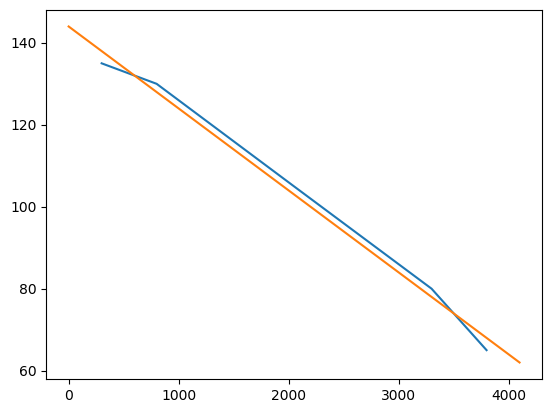

In [167]:
x = [300, 800, 2048, 3300, 3800]
foc = [135, 130, 105, 80, 65]

f,pl = plt.subplots()
pl.plot(x,foc)
fit = np.polyfit(x,foc, 1)
xx = np.linspace(0,4100,100)
pl.plot(xx, np.polyval(fit, xx))
print(fit[0])
f

In [977]:
reload(nirander)
meade = nirander.NirIlluminator()
def runAtXy(meade, mapLed=True, adjustFocusSlope=False, nread=3):

    if adjustFocusSlope:
        # Adjust seed using crude slope. See 20200329 plots
        x,y = meade.getPix()
        slope = -0.02
        focus = centerFocus + (x-2048)*slope
    
    visit = nirander.takeRamp(cam, nread=nread)
    x, y = meade.getSteps()
        
    ret = pd.DataFrame(data=dict(visit=[visit],
                                 xStep=[x], yStep=[y]))
    return ret

def focusAtXy(meade, centerFocus=120, spacing=30, r=3, 
              nread=3, thresh=500,
              doMeasureAndTweak=True, hxCalib=None):
        
    xStep, yStep = meade.getSteps()
    if doMeasureAndTweak:
        x,y = meade.getPix()
        measureCall = functools.partial(nirander.measureSet, thresh=thresh,
                                        hxCalib=hxCalib, center=[[x,y]])
    else:
        measureCall = None
    ret = nirander.scanForFocus(center=centerFocus, spacing=spacing, r=r,
                                measureCall=measureCall)
    ret['xstep'] = xStep
    ret['ystep'] = yStep
    
    return ret

lowFocus = functools.partial(focusAtXy, centerFocus=50, r=1)
highFocus = functools.partial(focusAtXy, centerFocus=150, r=1)
bracketFocus = functools.partial(focusAtXy, centerFocus=110, r=2, spacing=40)


2020-04-06 22:23:32.706Z butler           10 butler.py:69 loaded butler from {'pfi': {'template': 'pfi/PFI.yaml', 'loader': <bound method YAML.load of <ruamel_yaml.main.YAML object at 0x7fc25c783090>>}, 'modulePath': {'template': 'pfi/cobras/{moduleName}'}, 'cobraGeometry': {'template': 'pfi/cobras/{moduleName}/{cobraInModule}/geometry.yaml', 'loaderModule': 'ics.cobraCharmer.cobra'}, 'moduleXml': {'template': 'pfi/modules/{moduleName}/{moduleName}{version}.xml', 'loaderModule': 'ics.cobraCharmer.pfiDesign'}, 'motorMap': {'template': 'pfi/cobras/{moduleName}/{cobraModuleId}/maps/{motor}_{direction}_{mapName}.yaml', 'loaderModule': 'ics.cobraCharmer.motormap'}, 'configRoot': {'template': '/data/pfsx/config'}}, for {'fpsRun': {'template': 'pfs/{pfsDay}/fps/{visit:06d}'}, 'spsFile': {'template': 'pfs/{pfsDay}/sps/PF{site}A{visit:06d}{spectrograph}{armNum}.fits'}, 'rampFile': {'template': 'pfs/{pfsDay}/sps/PF{site}B{visit:06d}{spectrograph}{armNum}.fits'}, 'mcsFile': {'template': 'pfs/{pfs

### Acquire grid with focus sweep at each pos

### Measure *all* visits

In [1012]:
reload(nirander)
for i in range(len(grid)):
    infoAtSpot = focusInfo[i]
    infoAtSpot['xsteps'] = xSteps = grid.iloc[i]['xsteps']
    infoAtSpot['ysteps'] = ySteps = grid.iloc[i]['ysteps']
    center = meade.stepsToPix(xSteps, ySteps)
    print(f"{i}: measuring at {center[0]:0.1f}, {center[1]:0.1f}")
    try:
        nirander.measureSet(infoAtSpot, hxCalib, thresh=250, center=[center], radius=100)
    except Exception as e:
        print(f"{i} failed: {e}")
        
focusGrid = pd.concat(focusInfo, ignore_index=True)

0: measuring at (300.04254892118433, 300.1778505352743)
1: measuring at (300.04254892118433, 799.887080722657)
2: measuring at (300.04254892118433, 2047.9412802451238)
3: measuring at (300.04254892118433, 3300.093331477341)
4: measuring at (300.04254892118433, 3799.625931170118)
5: measuring at (800.026639829294, 300.1778505352743)
6: measuring at (800.026639829294, 799.887080722657)
7: measuring at (800.026639829294, 2047.9412802451238)
8: measuring at (800.026639829294, 3300.093331477341)
9: measuring at (800.026639829294, 3799.625931170118)
10: measuring at (2047.9733697285562, 300.1778505352743)
11: measuring at (2047.9733697285562, 799.887080722657)
12: measuring at (2047.9733697285562, 2047.9412802451238)
13: measuring at (2047.9733697285562, 3300.093331477341)
14: measuring at (2047.9733697285562, 3799.625931170118)
15: measuring at (3300.01627241542, 300.1778505352743)
16: measuring at (3300.01627241542, 799.887080722657)
17: measuring at (3300.01627241542, 2047.9412802451238)


### Sanity plots

In [1233]:
reload(hxdisp)
def plotFocusGrid(focusGrid, nfocus=6):
    fg = focusGrid.groupby('wavelength')
    waves = np.unique(focusGrid.wavelength.values)
    nx = len(waves)
    ny = len(focusGrid)//(nx*nfocus)

    print(len(focusGrid), nx, ny, waves)
            
    f, pl = plt.subplots(num="focusGrid", clear=True, 
                         ncols=nx, nrows=ny, squeeze=False,
                         sharex=True, sharey=True,
                         figsize=(16,16*ny/nx))
    xSteps = []
    ySteps = []
    focus = []
    size = []

    for w_i, wg in enumerate(fg):
        wave, group = wg
        
        glow = group.iloc[0::nfocus]
        order = np.argsort(glow.ypix.values)
        # print(f'{w_i} {wave}:{np.round(glow.ypix.values)} {np.round(order)}')
        for i_i, i in enumerate(order):
            fset = group.iloc[i*6:(i+1)*6]
            print(f"name: {wave}/{i} {i_i}:{w_i} {len(fset)} {np.round(fset.focus.values)} {np.round(fset.ypix.values)}")
            _, minFocus, minSize = hxdisp.focusPlot(fset, pl[i_i, w_i])
        #xSteps.append(xStep)
        #ySteps.append(yStep)
        #focus.append(minFocus)
        #size.append(minSize)
    return f


2020-04-07 18:47:32.646Z butler           10 butler.py:69 loaded butler from {'pfi': {'template': 'pfi/PFI.yaml', 'loader': <bound method YAML.load of <ruamel_yaml.main.YAML object at 0x7fc1f3604210>>}, 'modulePath': {'template': 'pfi/cobras/{moduleName}'}, 'cobraGeometry': {'template': 'pfi/cobras/{moduleName}/{cobraInModule}/geometry.yaml', 'loaderModule': 'ics.cobraCharmer.cobra'}, 'moduleXml': {'template': 'pfi/modules/{moduleName}/{moduleName}{version}.xml', 'loaderModule': 'ics.cobraCharmer.pfiDesign'}, 'motorMap': {'template': 'pfi/cobras/{moduleName}/{cobraModuleId}/maps/{motor}_{direction}_{mapName}.yaml', 'loaderModule': 'ics.cobraCharmer.motormap'}, 'configRoot': {'template': '/data/pfsx/config'}}, for {'fpsRun': {'template': 'pfs/{pfsDay}/fps/{visit:06d}'}, 'spsFile': {'template': 'pfs/{pfsDay}/sps/PF{site}A{visit:06d}{spectrograph}{armNum}.fits'}, 'rampFile': {'template': 'pfs/{pfsDay}/sps/PF{site}B{visit:06d}{spectrograph}{armNum}.fits'}, 'mcsFile': {'template': 'pfs/{pfs

In [1202]:
fg = focusCheck.groupby('wavelength')
focusPos = None
for wave, group in fg:
    if focusPos is None:
        focusList = group.focus
        focusList = focusList[focusList == focusList.astype('int')]
        focusPos = np.unique(focusList.values)
        print(group.loc[group.focus==min(focusPos)])
        xxxxx
    glow = group.iloc[0::6]
    order = np.argsort(glow.ypix.values)
    print(f'{wave}:{np.round(glow.ypix.values)} {np.round(order)}')
    for i in order:
        i0 = i*6
        fset = group.iloc[i*6:(i+1)*6]
        print(f"name: {wave}/{i} {np.round(fset.focus.values)} {np.round(fset.ypix.values)}")
    #for row in group:
    #    print(f" {row}")
    
# bestFocusGrid = focusCheck.loc[(focusCheck.focus != focusCheck.focus.values.astype('int')) & (focusCheck.ypix > 0)]


     visit  focus        x2        y2        xpix         ypix          flux  \
108   8013   55.0  2.105023  1.966506   80.246293    84.625563  74421.273438   
114   8019   55.0  1.719062  1.382092  103.373091  2032.768359  76239.328125   
120   8025   55.0  2.246041  2.140922  105.739171  4018.838146  62366.039062   
198   8103   55.0  1.753319  1.632695   94.957534   798.602339  82571.851562   
204   8109   55.0  1.996318  1.728601  107.973992  3198.104470  71037.828125   
246   8151   55.0  2.670325  2.362622  114.281580  4012.194611  66858.601562   

             peak      size  xstep  ystep  wavelength  dutyCycle  
108   9493.351562  2.035765  56267   3928         930         40  
114   8098.569336  1.550577  56936  14134         930         40  
120  10194.241211  2.193482  57644  24917         930         40  
198   9373.622070  1.693007  56507   7592         930         40  
204   7821.161133  1.862460  57351  20449         930         40  
246   6588.228027  2.516474  57642  2

NameError: name 'xxxxx' is not defined

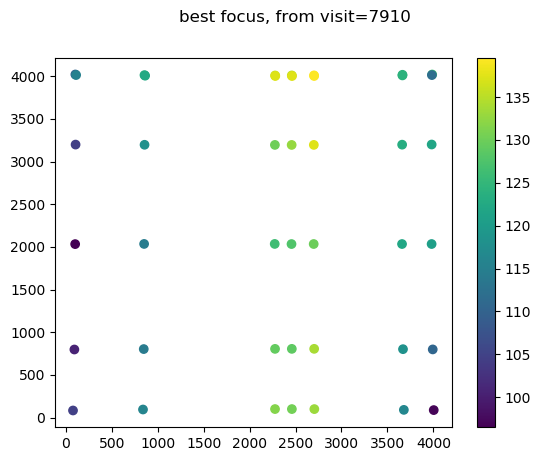

In [1171]:
fop = focusOffsetPlot(meade, bestFocusGrid, visit=bestFocusGrid['visit'].min())
fop.savefig('n1_bestfocus_7910.pdf')
fop

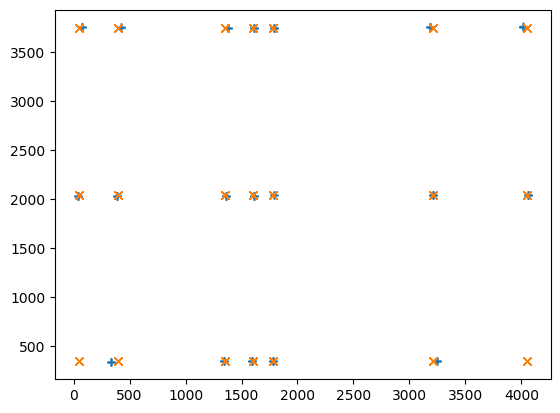

In [460]:
f,p1 = plt.subplots(num='grid2', clear=True)
p1.plot(fullset.xpix, fullset.ypix, '+')
p1.plot(nirander.xStepToPix(fullset.xstep), nirander.yStepToPix(fullset.ystep), 'x')
f

In [868]:
fullset.ystep.unique()

array([ 3923,  8637, 13966, 19391, 24913])

2020-04-06 13:28:25.671Z butler           10 butler.py:69 loaded butler from {'pfi': {'template': 'pfi/PFI.yaml', 'loader': <bound method YAML.load of <ruamel_yaml.main.YAML object at 0x7fc25c2398d0>>}, 'modulePath': {'template': 'pfi/cobras/{moduleName}'}, 'cobraGeometry': {'template': 'pfi/cobras/{moduleName}/{cobraInModule}/geometry.yaml', 'loaderModule': 'ics.cobraCharmer.cobra'}, 'moduleXml': {'template': 'pfi/modules/{moduleName}/{moduleName}{version}.xml', 'loaderModule': 'ics.cobraCharmer.pfiDesign'}, 'motorMap': {'template': 'pfi/cobras/{moduleName}/{cobraModuleId}/maps/{motor}_{direction}_{mapName}.yaml', 'loaderModule': 'ics.cobraCharmer.motormap'}, 'configRoot': {'template': '/data/pfsx/config'}}, for {'fpsRun': {'template': 'pfs/{pfsDay}/fps/{visit:06d}'}, 'spsFile': {'template': 'pfs/{pfsDay}/sps/PF{site}A{visit:06d}{spectrograph}{armNum}.fits'}, 'rampFile': {'template': 'pfs/{pfsDay}/sps/PF{site}B{visit:06d}{spectrograph}{armNum}.fits'}, 'mcsFile': {'template': 'pfs/{pfs

[[4078.64269595   77.18327305]
 [4041.02880463  987.60576224]
 [4006.43926172 1992.26207186]
 [3979.55526236 2996.58258576]
 [3960.47423867 4008.82952217]
 [3738.81318301   81.81521821]
 [3707.38289355  990.62041075]
 [3678.67851165 1993.47886355]
 [3656.58096385 2996.00231109]
 [3641.12369748 4006.45442678]
 [2726.43544718   91.54222848]
 [2713.53456284  997.3194356 ]
 [2702.45650669 1996.84631029]
 [2694.68321895 2996.07784619]
 [2690.05589472 4003.28247725]
 [2473.15957383   92.95312452]
 [2464.9057515   998.40130524]
 [2458.24619013 1997.57921925]
 [2454.06095391 2996.48057058]
 [2452.1428993  4003.37508178]
 [2282.76338749   93.72951888]
 [2278.00249601  999.0446587 ]
 [2274.6635122  1998.08947145]
 [2273.17404472 2996.87417839]
 [2273.29058402 4003.66949576]
 [ 798.63894901   90.98486873]
 [ 820.95822317  998.62152711]
 [ 843.34696786 2000.42527274]
 [ 862.72322015 3002.16527747]
 [ 878.56057272 4012.12069922]
 [  18.17999743   83.025164  ]
 [  54.51837246  994.21988091]
 [  90.2

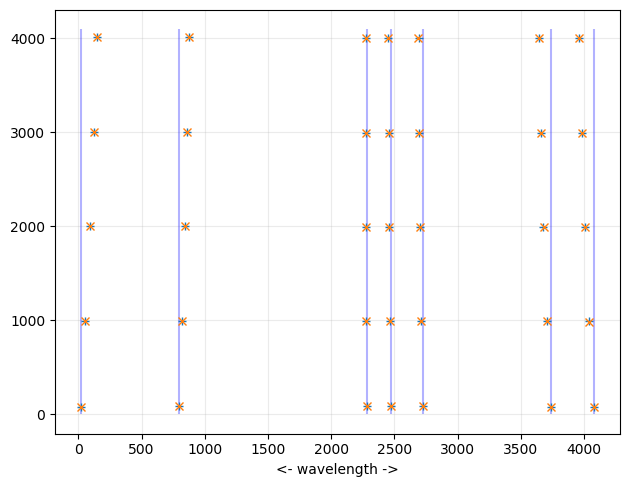

In [882]:
reload(nirander)
fullset =  allSscan
f,p1 = plt.subplots(num='grid3', clear=True)
p1.plot(fullset.xpix, fullset.ypix, '+')
target = nirander.stepToPix(fullset[['xstep','ystep']].values)
bottomRow_w = fullset.ystep == fullset.ystep.min()

bottomTarget = nirander.stepToPix(fullset[bottomRow_w][['xstep','ystep']].values)

p1.plot(target[:,0], target[:,1], 'x')
p1.vlines(bottomTarget[:,0], 0, 4100, color='b', alpha=0.3)
p1.grid(alpha=0.25)
p1.set_xlabel('<- wavelength ->')

print(target)
f

2020-04-07 15:35:52.870Z butler           10 butler.py:69 loaded butler from {'pfi': {'template': 'pfi/PFI.yaml', 'loader': <bound method YAML.load of <ruamel_yaml.main.YAML object at 0x7fc1d8651f50>>}, 'modulePath': {'template': 'pfi/cobras/{moduleName}'}, 'cobraGeometry': {'template': 'pfi/cobras/{moduleName}/{cobraInModule}/geometry.yaml', 'loaderModule': 'ics.cobraCharmer.cobra'}, 'moduleXml': {'template': 'pfi/modules/{moduleName}/{moduleName}{version}.xml', 'loaderModule': 'ics.cobraCharmer.pfiDesign'}, 'motorMap': {'template': 'pfi/cobras/{moduleName}/{cobraModuleId}/maps/{motor}_{direction}_{mapName}.yaml', 'loaderModule': 'ics.cobraCharmer.motormap'}, 'configRoot': {'template': '/data/pfsx/config'}}, for {'fpsRun': {'template': 'pfs/{pfsDay}/fps/{visit:06d}'}, 'spsFile': {'template': 'pfs/{pfsDay}/sps/PF{site}A{visit:06d}{spectrograph}{armNum}.fits'}, 'rampFile': {'template': 'pfs/{pfsDay}/sps/PF{site}B{visit:06d}{spectrograph}{armNum}.fits'}, 'mcsFile': {'template': 'pfs/{pfs

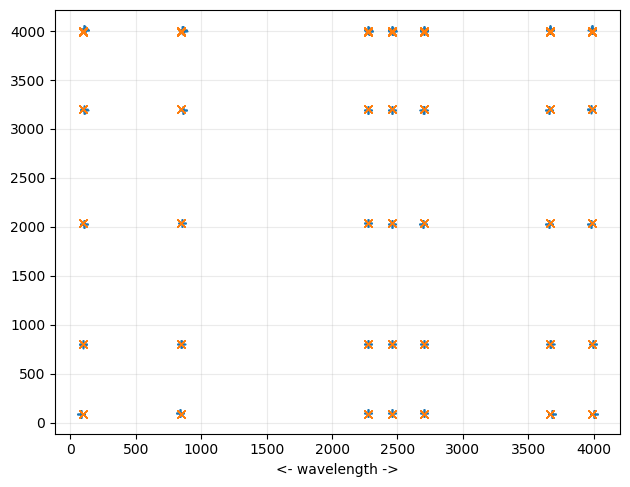

In [1050]:
reload(nirander)
fullset =  focusCheck
f,p1 = plt.subplots(num='grid3', clear=True)
p1.plot(fullset.xpix, fullset.ypix, '+')
target = nirander.stepToPix(fullset[['xstep','ystep']].values)
bottomRow_w = fullset.ystep <= 250

bottomTarget = nirander.stepToPix(fullset[bottomRow_w][['xstep','ystep']].values)

p1.plot(target[:,0], target[:,1], 'x')
p1.vlines(bottomTarget[:,0], 0, 4100, color='b', alpha=0.3)
p1.grid(alpha=0.25)
p1.set_xlabel('<- wavelength ->')

# print(target)
f

In [883]:
f.savefig('n1_xscale_vs_y.pdf')

# Display image

In [9]:
reload(hxdisp)
reload(hx)
reload(nirander)
reload(pfsutils)
lastFname = hx.rampPath(-1, cam='n1')
lastRamp = hx.ramp(lastFname)
# print(lastFname, pfsutils.getRampInfo(lastFname))
hxdisp.imShow(lastRamp, d1, r0=0, r1=-1, darkRamp=dark, matchDarkLevel=True) # , doCorrect=False)
print(ctr)
d1.set('zoom to 1')
d1.set(f'pan to {ctr[0]} {ctr[1]}')
#d1.set('scale asinh')
#d1.set(f'scale limits {np.percentile(lastImg, 5)} {np.percentile(lastImg, 99.0)}')

2020-04-10 18:34:56.496Z butler           10 butler.py:69 loaded butler from {'pfi': {'template': 'pfi/PFI.yaml', 'loader': <bound method YAML.load of <ruamel_yaml.main.YAML object at 0x7fe5092bc0d0>>}, 'modulePath': {'template': 'pfi/cobras/{moduleName}'}, 'cobraGeometry': {'template': 'pfi/cobras/{moduleName}/{cobraInModule}/geometry.yaml', 'loaderModule': 'ics.cobraCharmer.cobra'}, 'moduleXml': {'template': 'pfi/modules/{moduleName}/{moduleName}{version}.xml', 'loaderModule': 'ics.cobraCharmer.pfiDesign'}, 'motorMap': {'template': 'pfi/cobras/{moduleName}/{cobraModuleId}/maps/{motor}_{direction}_{mapName}.yaml', 'loaderModule': 'ics.cobraCharmer.motormap'}, 'configRoot': {'template': '/data/pfsx/config'}}, for {'fpsRun': {'template': 'pfs/{pfsDay}/fps/{visit:06d}'}, 'spsFile': {'template': 'pfs/{pfsDay}/sps/PF{site}A{visit:06d}{spectrograph}{armNum}.fits'}, 'rampFile': {'template': 'pfs/{pfsDay}/sps/PF{site}B{visit:06d}{spectrograph}{armNum}.fits'}, 'mcsFile': {'template': 'pfs/{pfs

NameError: name 'dark' is not defined

hreads=10 readTime=11.14 adcGain=1.3909815185782786


FigureCanvasNbAgg()

[0 1 2 3 4 5 6 7 8 9]
x: [ 0.   11.14 22.28 33.42 44.56 55.7  66.84 77.98 89.12]
y: [-4284.223  -4171.5537 -4057.4932 -3948.9966 -3836.3271 -3723.6577
 -3615.1611 -3503.8826 -3393.9949]


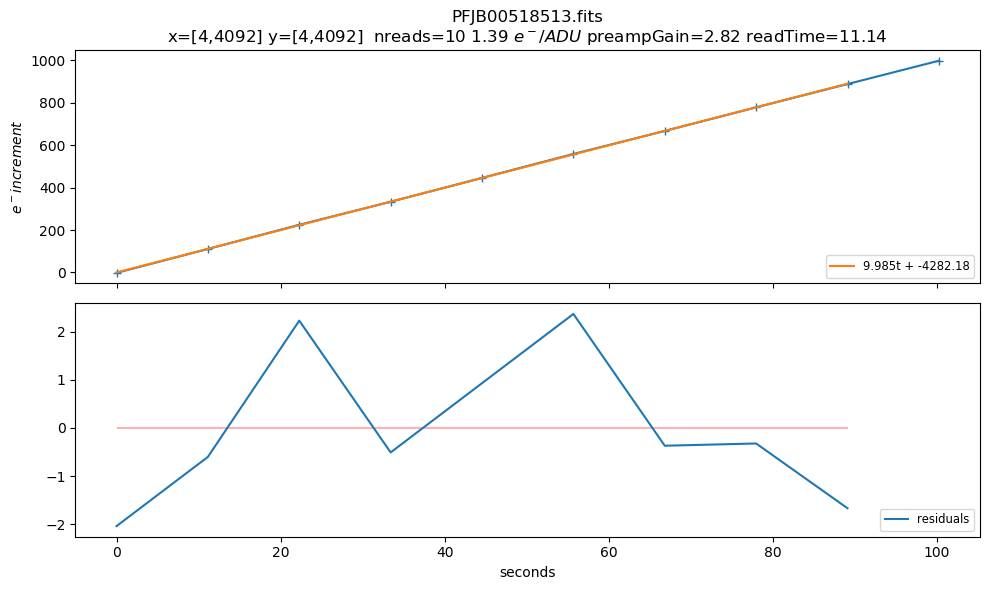

In [95]:
# Up the ramp signal
reload(hxdisp)
slices = slice(int(ctr[1])-5, int(ctr[1])+6), slice(int(ctr[0])-5, int(ctr[0])+6)
fig, *_ = hxdisp.regStats(lastFname, r0=0, r1=-1, fitr0=0, fitr1=-1, preampGain=2.82) # , slices=slices)
fig

# Read noise

In [19]:
def sampleRegions(cnt=1000, rad=31, seed=1):
    randgen = np.random.default_rng(seed)
    regions = []
    cmin = 4 + rad
    cmax = 4096 - 4 - rad
    for i in range(cnt):
        x = randgen.integers(cmin, cmax)
        y = randgen.integers(cmin, cmax)
        
        regions.append((slice(x-rad, x+rad+1), slice(y-rad, y+rad+1)))
        
    return regions

def rn1(diffIm, slices):
    region = diffIm[slices]
    region = region - np.median(region)
    return np.std(region)

def rn(ramp, r0=0, r1=1, rad=31, useCds=True):
    if useCds:
        rd0 = hx.rampCds(ramp, r0, r0+1)
        rd1 = hx.rampCds(ramp, r1, r1+1)
    else:
        rd0 = hx.rampRead(ramp, r0)
        rd1 = hx.rampRead(ramp, r1)
    
    diffIm = rd1-rd0
    
    regions = sampleRegions(rad=rad)
    res = np.array([rn1(diffIm, reg) for reg in regions])
    if useCds:
        res /= np.sqrt(2)
    return res, diffIm

def sampleStats(im, rad=11, cnt=1000):
    meds = np.zeros(cnt, dtype='f4')
    means = np.zeros(cnt, dtype='f4')
    stds = np.zeros(cnt, dtype='f4')
    
    regions = sampleRegions(cnt=cnt, rad=rad)
    for i in range(cnt):
        reg = im[regions[i]]
        meds[i] = np.median(reg)
        means[i] = np.mean(reg)
        stds[i] = np.std(reg)
    return meds, means, stds


In [989]:
d2.set_np2arr(cd2[40] - cd1[40])

1

/software/conda/envs/anaconda_2019.07/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


FigureCanvasNbAgg()

17.962713


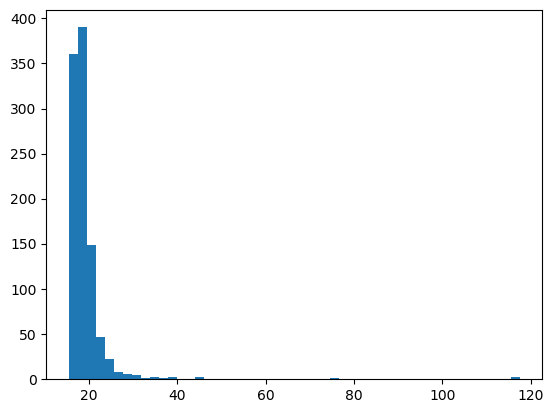

In [950]:
readnoiseRamp = hx.ramp(hx.rampPath(5138, cam='n1'))
res, dim = rn(readnoiseRamp, 45, 47, useCds=True)
_f,p1 = plt.subplots()
p1.hist(res, bins=50)
print(np.median(res))

d2.set_np2arr(dim)
_f


In [897]:
readnoiseRamp = hx.ramp(hx.rampPath(-1 ,cam='n1'))
hxdisp.imShow(readnoiseRamp, d1, 1, 2)

In [13]:
import scipy.ndimage

def mapBad(im, nsig=3, bkgndFilt=0, badMask=None, nrep=5):
    
    # bkgd = sep.Background(im)
    if bkgndFilt > 0:
        bkgnd = scipy.ndimage.median_filter(im, bkgndFilt)
        im = im - bkgnd
    
    if badMask is None:
        badMask = np.zeros_like(im, dtype='bool')
        
    for i in range(nrep):
        med = np.median(im[~badMask])
        im -= med
        sd = np.std(im[~badMask])
    
        badMask2 = (im < -nsig*sd) | (im > nsig*sd)
        badMask = badMask2 | badMask
        print(f"{i+1}: {sd} {badMask.sum()} {100*(1-badMask.sum()/badMask.size):0.2f}")
    
    return badMask, sd, im

def interpolate(im, mask, r=3):
    outIm = im.copy()
    outIm[mask] = scipy.ndimage.median_filter(im, size=r)[mask]
    
    return outIm

In [47]:
cds = dark._cube[-1].copy()
badMask, badStd, flatCds = mapBad(cds, nsig=4, bkgndFilt=21)

1: 74.5937728881836 49571 99.70
2: 15.886547088623047 218929 98.70
3: 4.147176742553711 341367 97.97
4: 3.352386474609375 434712 97.41
5: 3.1701061725616455 464910 97.23


In [48]:
badMask0, badStd0, flatCds0 = badMask.copy(), badStd, flatCds.copy() 

In [1199]:
badMask, badStd, flatCds = badMask0.copy(), badStd0, flatCds0.copy()

In [1169]:
badpix, badStd, flatCds = mapBad(flatCds, nsig=3, badMask=badpix) # , badMask=badpix)
print(badStd, badpix.sum(), 100*(1-badpix.sum()/badpix.size))

84.88152 433835 97.41414189338684


In [55]:
lastCdsClean = interpolate(lastCds, badMask)

In [61]:
flatIm, spots, _, bkgnd = getPeaks(lastCds, sigma=1000.0, mask=badMask)
len(spots)
spots

array([(1000., 14, 11, 2242, 2245, 2017, 2020, 2243.71316944, 2018.52302878, 0.77152127, 0.80413417, 0.00531753, 0., 0., 0., 0.89720637, 0.87788165, 1.41318321, 1.29619968, 1.24363029, -0.01714286, 49184.2890625, 54031.16796875, 6764.42822266, 11783.74121094, 2244, 2019, 2244, 2019, 0)],
      dtype=[('thresh', '<f8'), ('npix', '<i8'), ('tnpix', '<i8'), ('xmin', '<i8'), ('xmax', '<i8'), ('ymin', '<i8'), ('ymax', '<i8'), ('x', '<f8'), ('y', '<f8'), ('x2', '<f8'), ('y2', '<f8'), ('xy', '<f8'), ('errx2', '<f8'), ('erry2', '<f8'), ('errxy', '<f8'), ('a', '<f8'), ('b', '<f8'), ('theta', '<f8'), ('cxx', '<f8'), ('cyy', '<f8'), ('cxy', '<f8'), ('cflux', '<f8'), ('flux', '<f8'), ('cpeak', '<f8'), ('peak', '<f8'), ('xcpeak', '<i8'), ('ycpeak', '<i8'), ('xpeak', '<i8'), ('ypeak', '<i8'), ('flag', '<i8')])

In [51]:
d1.set('array mask [dim=4096,bitpix=16]', badMask.astype('i2'))

1

# Ginga goo

In [22]:
from ginga.misc.log import get_logger
import ipyevents
logger = get_logger("my viewer", log_stderr=False, log_file='/tmp/ginga.log', level=40)

from ginga.web.jupyterw.ImageViewJpw import EnhancedCanvasView
v2 = EnhancedCanvasView(logger=logger)
# set our linkage between the jupyter widget at ginga

# enable all possible keyboard and pointer operations
bd = v2.get_bindings()
bd.enable_all(True)

In [23]:
coordinates = ipywidgets.HTML('<h3>coordinates show up here</h3>')

# callback to display position in RA/DEC deg
def mouse_move(viewer, button, data_x, data_y, w):
    image = viewer.get_image()
    if image is not None:
        ra, dec = image.pixtoradec(data_x, data_y)
        w.value = "cursor at %f, %f" % (ra, dec)

v2.add_callback('cursor-changed', mouse_move, coordinates)


In [21]:
import ginga
import ipywidgets

from ginga.web.pgw import ipg

jimg = ipywidgets.Image(format='png', width=500, height=500)

In [184]:
del server
server = ipg.make_server(host='localhost', port=9999, use_opencv=True)
server.start(no_ioloop=True)

In [209]:
v1 = server.get_viewer('v1')

In [27]:
v2.load_data(hx.rampCds(lastFname))

In [28]:
ipywidgets.VBox([jimg, coordinates])

In [ ]:
# badpix = mapBad(cds, 2)
print(badMask.sum(), badMask.size, 100*(1-badMask.sum()/badMask.size))
v1.load_data(badMask.astype('i2'))
v1.show()

In [145]:
im2 = interpolate(cdsImg, badMask, r=5)

In [345]:
d2.set_np2arr(corrImg)
d2.set('array mask [dim=4096,bitpix=16]', badMask.astype('u2'))
d2.set('mask transparency 60')

1

# defs

In [30]:
reload(hx)
def ap(cds, ramp, i, ctr=ctr, subOffset=None):
    apFlux = sep.sum_circle(cds, ctr[0], ctr[1], 3.0)
    x,y = int(ctr[0]), int(ctr[1])
    reg = cds[y-5:y+6, x-5:x+6]
    peak = np.max(reg)
    if subOffset is not None:
        apRef = sep.sum_circle(cds, ctr[0]-subOffset[0], ctr[1]-subOffset[1], 3.0)
        return apFlux[0]-apRef[0]
    else:
        return apFlux[0], peak

In [1088]:
noIRPramp = hx.ramp(hx.rampPath(4891, cam='n1'))
noIRPcds = hx.rampCds(noIRPramp)
ctr = [2034,2195]
noIRPstats = [f for f in hx.rampStep(noIRPramp, r0=0,r1=49, call=ap)]

In [1065]:
import functools
apref = functools.partial(ap, subOffset=(-7.0, 0.0))
sr1 = [f for f in hx.rampStep(ledRamp, r0=0,r1=49, call=ap)]

/software/conda/envs/anaconda_2019.07/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


FigureCanvasNbAgg()

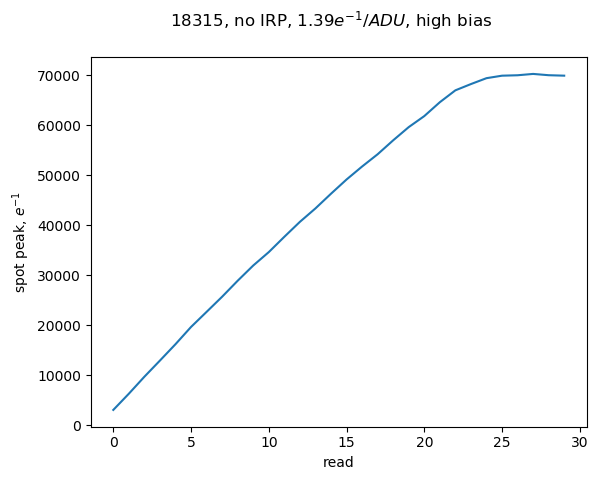

In [1108]:
#flux1 = DataFrameray(sr1)
flux1 = df[1]
flux2 = df2[1]
#flux2 = np.array([s1[0] for s1 in s])
f, p1 = plt.subplots()
x = 11.57 * np.arange(len(flux1))
#p1.plot(flux1[:20] * 1.39)
p1.plot(flux2[:30] * 1.39)
#p1.plot(flux2-flux1)
p1.set_xlabel('read')
p1.set_ylabel('spot peak, $e^{-1}$')
f.suptitle('18315, no IRP, $1.39 e^{-1}/ADU$, high bias')
f.savefig('18315_ok_linearity.pdf')
f

/software/conda/envs/anaconda_2019.07/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


FigureCanvasNbAgg()

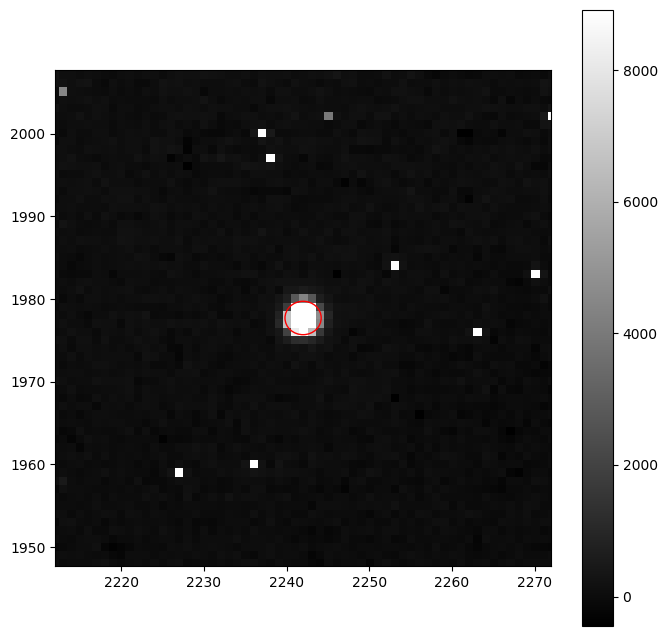

In [1022]:
f = showPeaks2(corrImg, bestSpot(spots, ctr), nsig=(0.5, 10.0), imrad=30,)
f

In [29]:
showPeaks(hx.rampCds(lastFname), None)

# plots of the day

In [893]:
hxdisp.imShow(hx.rampPath(-1, cam='n1'), d1)

# Focus

## quickSpotGrid

In [1164]:
def quickSpotGrid(visitFrame, disp, doIsr=True, rad=20, file=None):
    """ Show the main spot in the DataFrame for all the visit. """
    
    sortedFrame = visitFrame.sort_values(by=['wavelength', 'ypix'])
    nwave = len(sortedFrame.wavelength.unique())
    nrow = len(sortedFrame)//nwave
    disp.set('frame delete all')
    disp.set('lock scalelimits yes')
    disp.set('lock frame image')
    disp.set('scale asinh')
    disp.set('scale limits -100 10000')
    disp.set('zoom 8')
    disp.set(f'tile grid layout {nwave} {nrow}')

    ims = dict()
    for i_i, i in enumerate(sortedFrame.index):
        row = sortedFrame.loc[i]
        if doIsr:
            im = hxCalib.isr(row.visit)
        else:
            im = hx.rampCds([i])
            
        x, y = row.xpix, row.ypix
        x = int(round(x))
        y = int(round(y))
        frame_row = int(i_i % nrow)
        frame_col = i_i // nrow
        frame_idx = frame_row*nwave + frame_col
        print(i, row.wavelength,x,y, frame_idx, frame_row, frame_col)

        subim = im[y-rad:y+rad+1, x-rad:x+rad+1]
        if subim.shape[0] == 0 or subim.shape[1] == 0:
            print(f"{i} skipping image with shape={subim.shape}")
            subim = np.zeros(shape=(rad*2+1, rad*2+1))
        ims[frame_idx] = (subim, f'text 12 8 # text="{row.wavelength} ({row.xpix:0.1f},{row.ypix:0.1f})"')

        if file is not None:
            hdr=[dict(name='VISIT', value=row.visit)]
            hdr=[dict(name='WAVE', value=row.wavelength)]
            hdr=[dict(name='FOCUS', value=row.focus)]
            hdr=[dict(name='XPIX', value=row.xpix)]
            hdr=[dict(name='YPIX', value=row.ypix)]
            hdr=[dict(name='XSTEP', value=row.xstep)]
            hdr=[dict(name='YSTEP', value=row.ystep)]
            hdr=[dict(name='SIZE', value=row.size)]
            hdr=[dict(name='FLUX', value=row.flux)]
            hdr=[dict(name='PEAK', value=row.peak)]
            
            fitsio.write(file, subim, header=hdr)

    for imPos in sorted(ims.keys()):
        im, label = ims[imPos]
        disp.set('frame new')
        disp.set_np2arr(im)
        disp.set('regions', label)

In [144]:
d2.set('frame delete all')
d2.set('lock image')

for im in ims:
    d2.set('frame new')
    d2.set_np2arr(im)


In [1108]:
def focusPlot(sweep, p=None, title=None):
    if p is None:
        f,p1 = plt.subplots(num='focusPlot', clear=True)
    else:
        f = None
        p1 = p
    
    if title is None:
        title = f"{sweep['visit'].values[0]:0.0f} @ ({sweep['xpix'].values[0]:0.1f}, {sweep['ypix'].values[0]:0.1f})"
        
    sweep = sweep.sort_values(by=['focus'])

    minx, poly = nirander.getBestFocus(sweep)
    p1.plot(sweep.focus, sweep.x2, '+-', alpha=0.3, label='x')
    p1.plot(sweep.focus, sweep.y2, '+-', alpha=0.3, label='y')
    p1.plot(sweep.focus, sweep['size'], '+-', alpha=0.75, label='(x+y)/2')
    
    xx = np.linspace(sweep.focus.min(), sweep.focus.max()+1, 100)
    yy = poly(xx)
    # print(f'{title}: {minx:0.2f}, {poly(minx):0.2f}')
    p1.plot(xx, yy, label=f'best={minx:0.0f}')
    p1.plot([minx], [poly(minx)], 'kx', markersize=10)
    p1.legend(fontsize='small')
    p1.grid(alpha=0.2)
    p1.set_title(title)
        
    return f, minx, poly(minx)

def focusOffsetPlot(meade, focusResults, visit=None, recalcPix=False):
    f, pl = plt.subplots(num='focusOffsetGrid', clear=True)
    if recalcPix:
        pix = meade.stepsToPix(focusResults[['xstep','ystep']])
    else:
        pix = focusResults[['xpix', 'ypix']].values
    val = pl.scatter(pix[:,0], pix[:,1], c=focusResults['focus'].values, cmap=plt.cm.get_cmap('viridis'))
    f.colorbar(val)
    f.suptitle(f'best focus, from visit={visit}')
    return f

# Darks

In [34]:
def showDarkSet(visits, d, cam):
    darkRamps = {}
    darkCds = {}
    d.set('frame delete all')
    
    v0 = visits[0]
    for v_i, v in enumerate(visits):
        darkRamps[v] = hx.ramp(hx.rampPath(v, cam=cam))
        darkCds[v] = hx.rampCds(darkRamps[v])
    
        if v_i == 0:
            med0 = np.median(darkCds[v])
            d.set('frame new')
            d.set_np2arr(darkCds[v])
        else:
            dmed = np.median(darkCds[v]) - med0
            print(f"{v}: {dmed:0.3f}")
            d.set('frame new')
            d.set_np2arr(darkCds[v] - darkCds[v0] - dmed)
            
    return darkCds

def showDarkStack(stack):
    d.set('frame delete all')
    
    for r_i in range(len(stack)):    
        if r_i == 0:
            med0 = np.median(darkCds[v])
            d.set('frame new')
            d.set_np2arr(darkCds[v])
        else:
            dmed = np.median(darkCds[v]) - med0
            print(f"{v}: {dmed:0.3f}")
            d.set('frame new')
            d.set_np2arr(darkCds[v] - darkCds[v0] - dmed)
            
    return darkCds

# LED characterization

In [370]:
reload(nirander)
meade =  nirander.NirIlluminator(forceLedOff=False,logLevel=5)
meade.ledsOff()

2020-03-31 15:12:34.827Z butler           10 butler.py:69 loaded butler from {'pfi': {'template': 'pfi/PFI.yaml', 'loader': <bound method YAML.load of <ruamel_yaml.main.YAML object at 0x7fc262540150>>}, 'modulePath': {'template': 'pfi/cobras/{moduleName}'}, 'cobraGeometry': {'template': 'pfi/cobras/{moduleName}/{cobraInModule}/geometry.yaml', 'loaderModule': 'ics.cobraCharmer.cobra'}, 'moduleXml': {'template': 'pfi/modules/{moduleName}/{moduleName}{version}.xml', 'loaderModule': 'ics.cobraCharmer.pfiDesign'}, 'motorMap': {'template': 'pfi/cobras/{moduleName}/{cobraModuleId}/maps/{motor}_{direction}_{mapName}.yaml', 'loaderModule': 'ics.cobraCharmer.motormap'}, 'configRoot': {'template': '/data/pfsx/config'}}, for {'fpsRun': {'template': 'pfs/{pfsDay}/fps/{visit:06d}'}, 'spsFile': {'template': 'pfs/{pfsDay}/sps/PF{site}A{visit:06d}{spectrograph}{armNum}.fits'}, 'rampFile': {'template': 'pfs/{pfsDay}/sps/PF{site}B{visit:06d}{spectrograph}{armNum}.fits'}, 'mcsFile': {'template': 'pfs/{pfs

In [887]:
d1.set('frame delete all')
d1.set('zoom to fit')
d1.set('frame new')
d1.set_np2arr(hxCalib.badMask.astype('i2'))
d1.set('frame new')
d1.set_np2arr(hxCalib.darkStack[-1])

1

In [993]:
reload(nirander)
#import pfsutils

waves = meade.leds.wave
yy = np.array([88.0, 2040, 3995])

waves = [970]
yy = np.array([3200.0])
focusCall = functools.partial(focusAtXy, centerFocus=115, thresh=400, hxCalib=hxCalib)

focusList = []
for w_i, w in enumerate(waves):
    meade.led(w)
    led, dutyCycle, _ = meade.ledState()
    print(f"after  led setting: {meade}")
    ret = nirander.motorScan(meade, meade.leds.position[w], yy, call=focusCall)
    # ret = nirander.motorScan(meade, meade.leds.position[w], yy)
    for r in ret: 
        r['wavelength'] = w
        r['dutyCycle'] = meade.dutyCycle
        focusList.append(r)
meade.ledsOff()


2020-04-07 14:08:10.650Z butler           10 butler.py:69 loaded butler from {'pfi': {'template': 'pfi/PFI.yaml', 'loader': <bound method YAML.load of <ruamel_yaml.main.YAML object at 0x7fc25dfa03d0>>}, 'modulePath': {'template': 'pfi/cobras/{moduleName}'}, 'cobraGeometry': {'template': 'pfi/cobras/{moduleName}/{cobraInModule}/geometry.yaml', 'loaderModule': 'ics.cobraCharmer.cobra'}, 'moduleXml': {'template': 'pfi/modules/{moduleName}/{moduleName}{version}.xml', 'loaderModule': 'ics.cobraCharmer.pfiDesign'}, 'motorMap': {'template': 'pfi/cobras/{moduleName}/{cobraModuleId}/maps/{motor}_{direction}_{mapName}.yaml', 'loaderModule': 'ics.cobraCharmer.motormap'}, 'configRoot': {'template': '/data/pfsx/config'}}, for {'fpsRun': {'template': 'pfs/{pfsDay}/fps/{visit:06d}'}, 'spsFile': {'template': 'pfs/{pfsDay}/sps/PF{site}A{visit:06d}{spectrograph}{armNum}.fits'}, 'rampFile': {'template': 'pfs/{pfsDay}/sps/PF{site}B{visit:06d}{spectrograph}{armNum}.fits'}, 'mcsFile': {'template': 'pfs/{pfs

['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=110', 'abs', 'microns']


2020-04-07 14:08:13.572Z meade            30 nirander.py:122 send: led 1300 100
2020-04-07 14:08:13.574Z meade            30 nirander.py:130 rcvd: OK, reply: OK


after  led setting: Meade(led=1300@100, steps=(57351, 20449), pix=[  99.99078243 3200.08075744])


2020-04-07 14:08:14.200Z meade            30 nirander.py:122 send: move 2871 24718
2020-04-07 14:09:07.798Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-07 14:09:07.799Z meade            30 nirander.py:122 send: move 3071 24918
2020-04-07 14:09:08.507Z meade            30 nirander.py:130 rcvd: OK, reply: OK


[ 55  85 115 145 175]
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=45', 'abs', 'microns']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=55', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=85', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=115', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=145', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=175', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
best focus: 111.90153561778963
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=111.90153561778963', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=

2020-04-07 14:15:34.105Z meade            30 nirander.py:122 send: led 1300 0
2020-04-07 14:15:34.108Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-07 14:15:34.109Z meade            30 nirander.py:122 send: led 1200 33
2020-04-07 14:15:34.111Z meade            30 nirander.py:130 rcvd: OK, reply: OK


expected 1.12, got 1.06 
after  led setting: Meade(led=1200@33, steps=(3071, 24918), pix=[3983.96710942 3994.05591386])


2020-04-07 14:15:34.735Z meade            30 nirander.py:122 send: move 7362 24715
2020-04-07 14:15:39.375Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-07 14:15:39.377Z meade            30 nirander.py:122 send: move 7562 24915
2020-04-07 14:15:40.085Z meade            30 nirander.py:130 rcvd: OK, reply: OK


[ 55  85 115 145 175]
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=45', 'abs', 'microns']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=55', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=85', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=115', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=145', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=175', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
best focus: 124.15591629205406
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=124.15591629205406', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=

2020-04-07 14:21:32.717Z meade            30 nirander.py:122 send: led 1200 0
2020-04-07 14:21:32.719Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-07 14:21:32.721Z meade            30 nirander.py:122 send: led 1085 30
2020-04-07 14:21:32.723Z meade            30 nirander.py:130 rcvd: OK, reply: OK


expected 1.01, got 1.01 
after  led setting: Meade(led=1085@30, steps=(7562, 24915), pix=[3663.98380671 3994.02309099])


2020-04-07 14:21:33.340Z meade            30 nirander.py:122 send: move 20897 24706
2020-04-07 14:21:46.737Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-07 14:21:46.739Z meade            30 nirander.py:122 send: move 21097 24906
2020-04-07 14:21:47.446Z meade            30 nirander.py:130 rcvd: OK, reply: OK


[ 55  85 115 145 175]
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=45', 'abs', 'microns']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=55', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=85', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=115', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=145', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=175', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
best focus: 139.59348734957072
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=139.59348734957072', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=

2020-04-07 14:27:52.600Z meade            30 nirander.py:122 send: led 1085 0
2020-04-07 14:27:52.602Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-07 14:27:52.605Z meade            30 nirander.py:122 send: led 1070 33
2020-04-07 14:27:52.607Z meade            30 nirander.py:130 rcvd: OK, reply: OK


expected 0.85, got 0.86 
after  led setting: Meade(led=1070@33, steps=(21097, 24906), pix=[2699.99112817 3993.93155025])


2020-04-07 14:27:53.228Z meade            30 nirander.py:122 send: move 24310 24704
2020-04-07 14:27:56.653Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-07 14:27:56.655Z meade            30 nirander.py:122 send: move 24510 24904
2020-04-07 14:27:57.364Z meade            30 nirander.py:130 rcvd: OK, reply: OK


[ 55  85 115 145 175]
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=45', 'abs', 'microns']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=55', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=85', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=115', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=145', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=175', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
best focus: 137.52709610476276
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=137.52709610476276', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=

2020-04-07 14:34:12.343Z meade            30 nirander.py:122 send: led 1070 0
2020-04-07 14:34:12.345Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-07 14:34:12.347Z meade            30 nirander.py:122 send: led 1050 19
2020-04-07 14:34:12.349Z meade            30 nirander.py:130 rcvd: OK, reply: OK


expected 0.82, got 0.91 
after  led setting: Meade(led=1050@19, steps=(24510, 24904), pix=[2456.99830685 3993.95624222])


2020-04-07 14:34:12.973Z meade            30 nirander.py:122 send: move 26881 24703
2020-04-07 14:34:15.800Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-07 14:34:15.802Z meade            30 nirander.py:122 send: move 27081 24903
2020-04-07 14:34:16.511Z meade            30 nirander.py:130 rcvd: OK, reply: OK


[ 55  85 115 145 175]
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=45', 'abs', 'microns']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=55', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=85', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=115', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=145', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=175', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
best focus: 137.35307695356198
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=137.35307695356198', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=

2020-04-07 14:40:00.635Z meade            30 nirander.py:122 send: led 1050 0
2020-04-07 14:40:00.637Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-07 14:40:00.639Z meade            30 nirander.py:122 send: led 970 83
2020-04-07 14:40:00.641Z meade            30 nirander.py:130 rcvd: OK, reply: OK


expected 0.89, got 0.90 
after  led setting: Meade(led=970@83, steps=(27081, 24903), pix=[2273.97631623 3994.06464092])


2020-04-07 14:40:01.266Z meade            30 nirander.py:122 send: move 46950 24690
2020-04-07 14:40:21.023Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-07 14:40:21.025Z meade            30 nirander.py:122 send: move 47150 24890
2020-04-07 14:40:21.734Z meade            30 nirander.py:130 rcvd: OK, reply: OK


[ 55  85 115 145 175]
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=45', 'abs', 'microns']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=55', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=85', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=115', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=145', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=175', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
best focus: 122.50216796753305
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=122.50216796753305', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=

2020-04-07 14:46:31.215Z meade            30 nirander.py:122 send: led 970 0
2020-04-07 14:46:31.217Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-07 14:46:31.219Z meade            30 nirander.py:122 send: led 930 40
2020-04-07 14:46:31.221Z meade            30 nirander.py:130 rcvd: OK, reply: OK


expected 0.85, got 0.89 
after  led setting: Meade(led=930@40, steps=(47150, 24890), pix=[ 846.02596159 3993.99005049])


2020-04-07 14:46:31.841Z meade            30 nirander.py:122 send: move 57442 24683
2020-04-07 14:46:42.217Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-07 14:46:42.219Z meade            30 nirander.py:122 send: move 57642 24883
2020-04-07 14:46:42.927Z meade            30 nirander.py:130 rcvd: OK, reply: OK


[ 55  85 115 145 175]
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=45', 'abs', 'microns']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=55', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=85', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=115', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=145', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=175', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
best focus: 115.28956035386861
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=115.28956035386861', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=

In [16]:
from pfs.utils import butler
reload(butler)

import butlerMaps
reload(butlerMaps)

b = butler.Butler(configRoot='/data/pfsx/config')
b.addMaps(dataMapDict=butlerMaps.dataMap)
b.addKeys(butlerMaps.configKeys)
b.addKeys(dict(cam='n1', experimentName='n1_dither_full_2'))
b.addKeys(dict(reduxDir=b.get('reduxDir')))

2020-04-10 19:23:49.743Z butler           10 butler.py:69 loaded butler from {'pfi': {'template': 'pfi/PFI.yaml', 'loader': <bound method YAML.load of <ruamel_yaml.main.YAML object at 0x7fe509b69b90>>}, 'modulePath': {'template': 'pfi/cobras/{moduleName}'}, 'cobraGeometry': {'template': 'pfi/cobras/{moduleName}/{cobraInModule}/geometry.yaml', 'loaderModule': 'ics.cobraCharmer.cobra'}, 'moduleXml': {'template': 'pfi/modules/{moduleName}/{moduleName}{version}.xml', 'loaderModule': 'ics.cobraCharmer.pfiDesign'}, 'motorMap': {'template': 'pfi/cobras/{moduleName}/{cobraModuleId}/maps/{motor}_{direction}_{mapName}.yaml', 'loaderModule': 'ics.cobraCharmer.motormap'}, 'configRoot': {'template': '/data/pfsx/config'}}, for {'fpsRun': {'template': 'pfs/{pfsDay}/fps/{visit:06d}'}, 'spsFile': {'template': 'pfs/{pfsDay}/sps/PF{site}A{visit:06d}{spectrograph}{armNum}.fits'}, 'rampFile': {'template': 'pfs/{pfsDay}/sps/PF{site}B{visit:06d}{spectrograph}{armNum}.fits'}, 'mcsFile': {'template': 'pfs/{pfs

In [18]:
reload(nirander)
meade = nirander.NirIlluminator()
ditherTestSet = nirander.ditherSet(meade, waves=[970,930], butler=b, rows=[88.0,2040,3995], nramps=3, focus=[92,107,122,137,152])

2020-04-10 19:26:22.794Z butler           10 butler.py:69 loaded butler from {'pfi': {'template': 'pfi/PFI.yaml', 'loader': <bound method YAML.load of <ruamel_yaml.main.YAML object at 0x7fe509bd6bd0>>}, 'modulePath': {'template': 'pfi/cobras/{moduleName}'}, 'cobraGeometry': {'template': 'pfi/cobras/{moduleName}/{cobraInModule}/geometry.yaml', 'loaderModule': 'ics.cobraCharmer.cobra'}, 'moduleXml': {'template': 'pfi/modules/{moduleName}/{moduleName}{version}.xml', 'loaderModule': 'ics.cobraCharmer.pfiDesign'}, 'motorMap': {'template': 'pfi/cobras/{moduleName}/{cobraModuleId}/maps/{motor}_{direction}_{mapName}.yaml', 'loaderModule': 'ics.cobraCharmer.motormap'}, 'configRoot': {'template': '/data/pfsx/config'}}, for {'fpsRun': {'template': 'pfs/{pfsDay}/fps/{visit:06d}'}, 'spsFile': {'template': 'pfs/{pfsDay}/sps/PF{site}A{visit:06d}{spectrograph}{armNum}.fits'}, 'rampFile': {'template': 'pfs/{pfsDay}/sps/PF{site}B{visit:06d}{spectrograph}{armNum}.fits'}, 'mcsFile': {'template': 'pfs/{pfs

led 970 on row 88.0 with focus 92.0
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=92.0', 'abs', 'microns']


2020-04-10 19:26:26.664Z meade            30 nirander.py:122 send: led 970 83
2020-04-10 19:26:26.667Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 19:26:26.875Z meade            30 nirander.py:122 send: move 46091 3737
2020-04-10 19:26:27.583Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 19:26:27.585Z meade            30 nirander.py:122 send: move 46291 3937
2020-04-10 19:26:28.291Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 19:27:18.927Z meade            30 nirander.py:122 send: move 46291 3939
2020-04-10 19:27:19.334Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 19:28:13.692Z meade            30 nirander.py:122 send: move 46291 3941
2020-04-10 19:28:14.096Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 19:29:06.832Z meade            30 nirander.py:122 send: move 46096 3737
2020-04-10 19:29:07.539Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 19:29:07.541Z meade            30 nirander.py:122 send: move 46296 3937
2020-04-10 19:29:08.250Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 19:30:02.449Z meade            30 nirander.py:122 send: move 46296 3939
2020-04-10 19:30:02.856Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 19:30:56.591Z meade            30 nirander.py:122 send: move 46296 3941
2020-04-10 19:30:56.997Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 19:31:50.902Z meade            30 nirander.py:122 send: move 46101 3737
2020-04-10 19:31:51.607Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 19:31:51.609Z meade            30 nirander.py:122 send: move 46301 3937
2020-04-10 19:31:52.317Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 19:32:45.245Z meade            30 nirander.py:122 send: move 46301 3939
2020-04-10 19:32:45.651Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 19:33:38.476Z meade            30 nirander.py:122 send: move 46301 3941
2020-04-10 19:33:38.883Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 19:34:33.633Z meade            30 nirander.py:122 send: led 970 83
2020-04-10 19:34:33.635Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 19:34:33.844Z meade            30 nirander.py:122 send: move 46091 3737
2020-04-10 19:34:34.553Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 19:34:34.555Z meade            30 nirander.py:122 send: move 46291 3937
2020-04-10 19:34:35.264Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 19:35:26.669Z meade            30 nirander.py:122 send: move 46291 3939
2020-04-10 19:35:27.076Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 19:36:20.960Z meade            30 nirander.py:122 send: move 46291 3941
2020-04-10 19:36:21.365Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 19:37:15.805Z meade            30 nirander.py:122 send: move 46096 3737
2020-04-10 19:37:16.514Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 19:37:16.516Z meade            30 nirander.py:122 send: move 46296 3937
2020-04-10 19:37:17.225Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 19:38:10.344Z meade            30 nirander.py:122 send: move 46296 3939
2020-04-10 19:38:10.750Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 19:39:04.352Z meade            30 nirander.py:122 send: move 46296 3941
2020-04-10 19:39:04.757Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 19:39:58.328Z meade            30 nirander.py:122 send: move 46101 3737
2020-04-10 19:39:59.036Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 19:39:59.038Z meade            30 nirander.py:122 send: move 46301 3937
2020-04-10 19:39:59.747Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 19:40:51.994Z meade            30 nirander.py:122 send: move 46301 3939
2020-04-10 19:40:52.401Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 19:41:48.391Z meade            30 nirander.py:122 send: move 46301 3941
2020-04-10 19:41:48.798Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 19:42:41.073Z meade            30 nirander.py:122 send: led 970 83
2020-04-10 19:42:41.076Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 19:42:41.283Z meade            30 nirander.py:122 send: move 46091 3737
2020-04-10 19:42:41.989Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 19:42:41.991Z meade            30 nirander.py:122 send: move 46291 3937
2020-04-10 19:42:42.698Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 19:43:35.506Z meade            30 nirander.py:122 send: move 46291 3939
2020-04-10 19:43:35.910Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 19:44:29.932Z meade            30 nirander.py:122 send: move 46291 3941
2020-04-10 19:44:30.339Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 19:45:24.110Z meade            30 nirander.py:122 send: move 46096 3737
2020-04-10 19:45:24.819Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 19:45:24.821Z meade            30 nirander.py:122 send: move 46296 3937
2020-04-10 19:45:25.530Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 19:46:18.360Z meade            30 nirander.py:122 send: move 46296 3939
2020-04-10 19:46:18.767Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 19:47:12.912Z meade            30 nirander.py:122 send: move 46296 3941
2020-04-10 19:47:13.319Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 19:48:08.412Z meade            30 nirander.py:122 send: move 46101 3737
2020-04-10 19:48:09.121Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 19:48:09.123Z meade            30 nirander.py:122 send: move 46301 3937
2020-04-10 19:48:09.832Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 19:49:02.505Z meade            30 nirander.py:122 send: move 46301 3939
2020-04-10 19:49:02.911Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 19:49:57.134Z meade            30 nirander.py:122 send: move 46301 3941
2020-04-10 19:49:57.539Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
ditherList:  [    visit  xstep  ystep  focus  wavelength  dutyCycle
0   10401  46291   3937   92.0         970         83
1   10402  46291   3939   92.0         970         83
2   10403  46291   3941   92.0         970         83
3   10404  46296   3937   92.0         970         83
4   10405  46296   3939   92.0         970         83
5   10406  46296   3941   92.0         970         83
6   10407  46301   3937   92.0         970         83
7   10408  46301   3939   92.0         970         83
8   10409  46301   3941   92.0         970         83
9   10410  46291   3937   92.0         970         83
10  10411  46291   3939   92.0         970         83
11  10412  46291   3941   92.0         970         83
12  10413  46296   3937   92.0         970         83
13  10414  46296   3939   92.0         970         83
14  10415  46296   3941   92.0         970         83
15  10416  46301   3937   92.0         970         83
16  10417  46

2020-04-10 19:50:53.228Z meade            30 nirander.py:122 send: led 970 83
2020-04-10 19:50:53.230Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 19:50:53.439Z meade            30 nirander.py:122 send: move 46091 3737
2020-04-10 19:50:54.149Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 19:50:54.151Z meade            30 nirander.py:122 send: move 46291 3937
2020-04-10 19:50:54.861Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 19:51:56.605Z meade            30 nirander.py:122 send: move 46291 3939
2020-04-10 19:51:57.011Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 19:52:49.273Z meade            30 nirander.py:122 send: move 46291 3941
2020-04-10 19:52:49.678Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 19:53:43.698Z meade            30 nirander.py:122 send: move 46096 3737
2020-04-10 19:53:44.407Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 19:53:44.410Z meade            30 nirander.py:122 send: move 46296 3937
2020-04-10 19:53:45.119Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 19:54:38.306Z meade            30 nirander.py:122 send: move 46296 3939
2020-04-10 19:54:38.713Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 19:55:33.384Z meade            30 nirander.py:122 send: move 46296 3941
2020-04-10 19:55:33.791Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 19:56:26.743Z meade            30 nirander.py:122 send: move 46101 3737
2020-04-10 19:56:27.451Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 19:56:27.453Z meade            30 nirander.py:122 send: move 46301 3937
2020-04-10 19:56:28.160Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 19:57:22.153Z meade            30 nirander.py:122 send: move 46301 3939
2020-04-10 19:57:22.559Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 19:58:16.582Z meade            30 nirander.py:122 send: move 46301 3941
2020-04-10 19:58:16.988Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 19:59:09.448Z meade            30 nirander.py:122 send: led 970 83
2020-04-10 19:59:09.450Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 19:59:09.659Z meade            30 nirander.py:122 send: move 46091 3737
2020-04-10 19:59:10.368Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 19:59:10.370Z meade            30 nirander.py:122 send: move 46291 3937
2020-04-10 19:59:11.079Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:00:05.098Z meade            30 nirander.py:122 send: move 46291 3939
2020-04-10 20:00:05.504Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:00:58.391Z meade            30 nirander.py:122 send: move 46291 3941
2020-04-10 20:00:58.796Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:01:52.341Z meade            30 nirander.py:122 send: move 46096 3737
2020-04-10 20:01:53.050Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 20:01:53.052Z meade            30 nirander.py:122 send: move 46296 3937
2020-04-10 20:01:53.761Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:02:46.694Z meade            30 nirander.py:122 send: move 46296 3939
2020-04-10 20:02:47.101Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:03:41.118Z meade            30 nirander.py:122 send: move 46296 3941
2020-04-10 20:03:41.525Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:04:36.579Z meade            30 nirander.py:122 send: move 46101 3737
2020-04-10 20:04:37.285Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 20:04:37.287Z meade            30 nirander.py:122 send: move 46301 3937
2020-04-10 20:04:37.994Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:05:31.117Z meade            30 nirander.py:122 send: move 46301 3939
2020-04-10 20:05:31.522Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:06:24.957Z meade            30 nirander.py:122 send: move 46301 3941
2020-04-10 20:06:25.363Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:07:18.040Z meade            30 nirander.py:122 send: led 970 83
2020-04-10 20:07:18.043Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 20:07:18.251Z meade            30 nirander.py:122 send: move 46091 3737
2020-04-10 20:07:18.960Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 20:07:18.962Z meade            30 nirander.py:122 send: move 46291 3937
2020-04-10 20:07:19.669Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:08:12.808Z meade            30 nirander.py:122 send: move 46291 3939
2020-04-10 20:08:13.213Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:09:07.570Z meade            30 nirander.py:122 send: move 46291 3941
2020-04-10 20:09:07.977Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:10:01.333Z meade            30 nirander.py:122 send: move 46096 3737
2020-04-10 20:10:02.042Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 20:10:02.044Z meade            30 nirander.py:122 send: move 46296 3937
2020-04-10 20:10:02.753Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:10:57.003Z meade            30 nirander.py:122 send: move 46296 3939
2020-04-10 20:10:57.408Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:11:50.939Z meade            30 nirander.py:122 send: move 46296 3941
2020-04-10 20:11:51.346Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:12:44.504Z meade            30 nirander.py:122 send: move 46101 3737
2020-04-10 20:12:45.212Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 20:12:45.215Z meade            30 nirander.py:122 send: move 46301 3937
2020-04-10 20:12:45.923Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:13:38.371Z meade            30 nirander.py:122 send: move 46301 3939
2020-04-10 20:13:38.778Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:14:34.135Z meade            30 nirander.py:122 send: move 46301 3941
2020-04-10 20:14:34.542Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
ditherList:  [    visit  xstep  ystep  focus  wavelength  dutyCycle
0   10401  46291   3937   92.0         970         83
1   10402  46291   3939   92.0         970         83
2   10403  46291   3941   92.0         970         83
3   10404  46296   3937   92.0         970         83
4   10405  46296   3939   92.0         970         83
5   10406  46296   3941   92.0         970         83
6   10407  46301   3937   92.0         970         83
7   10408  46301   3939   92.0         970         83
8   10409  46301   3941   92.0         970         83
9   10410  46291   3937   92.0         970         83
10  10411  46291   3939   92.0         970         83
11  10412  46291   3941   92.0         970         83
12  10413  46296   3937   92.0         970         83
13  10414  46296   3939   92.0         970         83
14  10415  46296   3941   92.0         970         83
15  10416  46301   3937   92.0         970         83
16  10417  46

2020-04-10 20:15:30.138Z meade            30 nirander.py:122 send: led 970 83
2020-04-10 20:15:30.141Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 20:15:30.350Z meade            30 nirander.py:122 send: move 46091 3737
2020-04-10 20:15:31.058Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 20:15:31.060Z meade            30 nirander.py:122 send: move 46291 3937
2020-04-10 20:15:31.769Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:16:32.827Z meade            30 nirander.py:122 send: move 46291 3939
2020-04-10 20:16:33.235Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:17:28.056Z meade            30 nirander.py:122 send: move 46291 3941
2020-04-10 20:17:28.461Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:18:20.809Z meade            30 nirander.py:122 send: move 46096 3737
2020-04-10 20:18:21.516Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 20:18:21.518Z meade            30 nirander.py:122 send: move 46296 3937
2020-04-10 20:18:22.225Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:19:15.137Z meade            30 nirander.py:122 send: move 46296 3939
2020-04-10 20:19:15.544Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:20:09.355Z meade            30 nirander.py:122 send: move 46296 3941
2020-04-10 20:20:09.762Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:21:05.032Z meade            30 nirander.py:122 send: move 46101 3737
2020-04-10 20:21:05.739Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 20:21:05.741Z meade            30 nirander.py:122 send: move 46301 3937
2020-04-10 20:21:06.447Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:21:59.603Z meade            30 nirander.py:122 send: move 46301 3939
2020-04-10 20:22:00.010Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:22:53.390Z meade            30 nirander.py:122 send: move 46301 3941
2020-04-10 20:22:53.797Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:23:46.271Z meade            30 nirander.py:122 send: led 970 83
2020-04-10 20:23:46.272Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 20:23:46.481Z meade            30 nirander.py:122 send: move 46091 3737
2020-04-10 20:23:47.189Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 20:23:47.190Z meade            30 nirander.py:122 send: move 46291 3937
2020-04-10 20:23:47.898Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:24:40.719Z meade            30 nirander.py:122 send: move 46291 3939
2020-04-10 20:24:41.126Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:25:35.170Z meade            30 nirander.py:122 send: move 46291 3941
2020-04-10 20:25:35.577Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:26:30.141Z meade            30 nirander.py:122 send: move 46096 3737
2020-04-10 20:26:30.851Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 20:26:30.853Z meade            30 nirander.py:122 send: move 46296 3937
2020-04-10 20:26:31.562Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:27:23.761Z meade            30 nirander.py:122 send: move 46296 3939
2020-04-10 20:27:24.168Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:28:18.154Z meade            30 nirander.py:122 send: move 46296 3941
2020-04-10 20:28:18.560Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:29:12.812Z meade            30 nirander.py:122 send: move 46101 3737
2020-04-10 20:29:13.521Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 20:29:13.523Z meade            30 nirander.py:122 send: move 46301 3937
2020-04-10 20:29:14.231Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:30:07.024Z meade            30 nirander.py:122 send: move 46301 3939
2020-04-10 20:30:07.430Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:31:02.157Z meade            30 nirander.py:122 send: move 46301 3941
2020-04-10 20:31:02.564Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:31:54.679Z meade            30 nirander.py:122 send: led 970 83
2020-04-10 20:31:54.681Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 20:31:54.890Z meade            30 nirander.py:122 send: move 46091 3737
2020-04-10 20:31:55.598Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 20:31:55.601Z meade            30 nirander.py:122 send: move 46291 3937
2020-04-10 20:31:56.309Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:32:49.310Z meade            30 nirander.py:122 send: move 46291 3939
2020-04-10 20:32:49.716Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:33:43.825Z meade            30 nirander.py:122 send: move 46291 3941
2020-04-10 20:33:44.232Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:34:38.556Z meade            30 nirander.py:122 send: move 46096 3737
2020-04-10 20:34:39.266Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 20:34:39.268Z meade            30 nirander.py:122 send: move 46296 3937
2020-04-10 20:34:39.978Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:35:32.266Z meade            30 nirander.py:122 send: move 46296 3939
2020-04-10 20:35:32.672Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:36:26.860Z meade            30 nirander.py:122 send: move 46296 3941
2020-04-10 20:36:27.267Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:37:22.367Z meade            30 nirander.py:122 send: move 46101 3737
2020-04-10 20:37:23.076Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 20:37:23.079Z meade            30 nirander.py:122 send: move 46301 3937
2020-04-10 20:37:23.787Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:38:15.784Z meade            30 nirander.py:122 send: move 46301 3939
2020-04-10 20:38:16.191Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:39:09.709Z meade            30 nirander.py:122 send: move 46301 3941
2020-04-10 20:39:10.116Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
ditherList:  [    visit  xstep  ystep  focus  wavelength  dutyCycle
0   10401  46291   3937   92.0         970         83
1   10402  46291   3939   92.0         970         83
2   10403  46291   3941   92.0         970         83
3   10404  46296   3937   92.0         970         83
4   10405  46296   3939   92.0         970         83
5   10406  46296   3941   92.0         970         83
6   10407  46301   3937   92.0         970         83
7   10408  46301   3939   92.0         970         83
8   10409  46301   3941   92.0         970         83
9   10410  46291   3937   92.0         970         83
10  10411  46291   3939   92.0         970         83
11  10412  46291   3941   92.0         970         83
12  10413  46296   3937   92.0         970         83
13  10414  46296   3939   92.0         970         83
14  10415  46296   3941   92.0         970         83
15  10416  46301   3937   92.0         970         83
16  10417  46

2020-04-10 20:40:06.896Z meade            30 nirander.py:122 send: led 970 83
2020-04-10 20:40:06.898Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 20:40:07.107Z meade            30 nirander.py:122 send: move 46091 3737
2020-04-10 20:40:07.816Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 20:40:07.818Z meade            30 nirander.py:122 send: move 46291 3937
2020-04-10 20:40:08.527Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:40:58.465Z meade            30 nirander.py:122 send: move 46291 3939
2020-04-10 20:40:58.872Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:41:52.591Z meade            30 nirander.py:122 send: move 46291 3941
2020-04-10 20:41:52.998Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:42:46.930Z meade            30 nirander.py:122 send: move 46096 3737
2020-04-10 20:42:47.639Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 20:42:47.641Z meade            30 nirander.py:122 send: move 46296 3937
2020-04-10 20:42:48.349Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:43:41.765Z meade            30 nirander.py:122 send: move 46296 3939
2020-04-10 20:43:42.170Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:44:35.619Z meade            30 nirander.py:122 send: move 46296 3941
2020-04-10 20:44:36.024Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:45:30.098Z meade            30 nirander.py:122 send: move 46101 3737
2020-04-10 20:45:30.807Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 20:45:30.809Z meade            30 nirander.py:122 send: move 46301 3937
2020-04-10 20:45:31.518Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:46:24.144Z meade            30 nirander.py:122 send: move 46301 3939
2020-04-10 20:46:24.551Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:47:19.640Z meade            30 nirander.py:122 send: move 46301 3941
2020-04-10 20:47:20.047Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:48:12.373Z meade            30 nirander.py:122 send: led 970 83
2020-04-10 20:48:12.375Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 20:48:12.582Z meade            30 nirander.py:122 send: move 46091 3737
2020-04-10 20:48:13.289Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 20:48:13.292Z meade            30 nirander.py:122 send: move 46291 3937
2020-04-10 20:48:13.998Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:49:06.928Z meade            30 nirander.py:122 send: move 46291 3939
2020-04-10 20:49:07.334Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:50:02.589Z meade            30 nirander.py:122 send: move 46291 3941
2020-04-10 20:50:02.996Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:50:55.651Z meade            30 nirander.py:122 send: move 46096 3737
2020-04-10 20:50:56.360Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 20:50:56.362Z meade            30 nirander.py:122 send: move 46296 3937
2020-04-10 20:50:57.069Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:51:49.885Z meade            30 nirander.py:122 send: move 46296 3939
2020-04-10 20:51:50.291Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:52:45.546Z meade            30 nirander.py:122 send: move 46296 3941
2020-04-10 20:52:45.952Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:53:38.160Z meade            30 nirander.py:122 send: move 46101 3737
2020-04-10 20:53:38.870Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 20:53:38.871Z meade            30 nirander.py:122 send: move 46301 3937
2020-04-10 20:53:39.580Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:54:32.584Z meade            30 nirander.py:122 send: move 46301 3939
2020-04-10 20:54:32.991Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:55:27.002Z meade            30 nirander.py:122 send: move 46301 3941
2020-04-10 20:55:27.409Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:56:21.753Z meade            30 nirander.py:122 send: led 970 83
2020-04-10 20:56:21.756Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 20:56:21.965Z meade            30 nirander.py:122 send: move 46091 3737
2020-04-10 20:56:22.674Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 20:56:22.676Z meade            30 nirander.py:122 send: move 46291 3937
2020-04-10 20:56:23.385Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:57:16.446Z meade            30 nirander.py:122 send: move 46291 3939
2020-04-10 20:57:16.852Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:58:10.211Z meade            30 nirander.py:122 send: move 46291 3941
2020-04-10 20:58:10.618Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:59:05.726Z meade            30 nirander.py:122 send: move 46096 3737
2020-04-10 20:59:06.432Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 20:59:06.433Z meade            30 nirander.py:122 send: move 46296 3937
2020-04-10 20:59:07.142Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 20:59:59.882Z meade            30 nirander.py:122 send: move 46296 3939
2020-04-10 21:00:00.289Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:00:53.383Z meade            30 nirander.py:122 send: move 46296 3941
2020-04-10 21:00:53.789Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:01:47.271Z meade            30 nirander.py:122 send: move 46101 3737
2020-04-10 21:01:47.980Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 21:01:47.982Z meade            30 nirander.py:122 send: move 46301 3937
2020-04-10 21:01:48.691Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:02:41.603Z meade            30 nirander.py:122 send: move 46301 3939
2020-04-10 21:02:42.010Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:03:37.076Z meade            30 nirander.py:122 send: move 46301 3941
2020-04-10 21:03:37.483Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
ditherList:  [    visit  xstep  ystep  focus  wavelength  dutyCycle
0   10401  46291   3937   92.0         970         83
1   10402  46291   3939   92.0         970         83
2   10403  46291   3941   92.0         970         83
3   10404  46296   3937   92.0         970         83
4   10405  46296   3939   92.0         970         83
5   10406  46296   3941   92.0         970         83
6   10407  46301   3937   92.0         970         83
7   10408  46301   3939   92.0         970         83
8   10409  46301   3941   92.0         970         83
9   10410  46291   3937   92.0         970         83
10  10411  46291   3939   92.0         970         83
11  10412  46291   3941   92.0         970         83
12  10413  46296   3937   92.0         970         83
13  10414  46296   3939   92.0         970         83
14  10415  46296   3941   92.0         970         83
15  10416  46301   3937   92.0         970         83
16  10417  46

2020-04-10 21:04:33.156Z meade            30 nirander.py:122 send: led 970 83
2020-04-10 21:04:33.158Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 21:04:33.367Z meade            30 nirander.py:122 send: move 46091 3737
2020-04-10 21:04:34.075Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 21:04:34.077Z meade            30 nirander.py:122 send: move 46291 3937
2020-04-10 21:04:34.785Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:05:24.966Z meade            30 nirander.py:122 send: move 46291 3939
2020-04-10 21:05:25.373Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:06:19.032Z meade            30 nirander.py:122 send: move 46291 3941
2020-04-10 21:06:19.439Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:07:13.538Z meade            30 nirander.py:122 send: move 46096 3737
2020-04-10 21:07:14.244Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 21:07:14.246Z meade            30 nirander.py:122 send: move 46296 3937
2020-04-10 21:07:14.954Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:08:07.585Z meade            30 nirander.py:122 send: move 46296 3939
2020-04-10 21:08:07.992Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:09:01.527Z meade            30 nirander.py:122 send: move 46296 3941
2020-04-10 21:09:01.934Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:09:55.798Z meade            30 nirander.py:122 send: move 46101 3737
2020-04-10 21:09:56.507Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 21:09:56.509Z meade            30 nirander.py:122 send: move 46301 3937
2020-04-10 21:09:57.216Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:10:50.067Z meade            30 nirander.py:122 send: move 46301 3939
2020-04-10 21:10:50.472Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:11:44.814Z meade            30 nirander.py:122 send: move 46301 3941
2020-04-10 21:11:45.221Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:12:38.647Z meade            30 nirander.py:122 send: led 970 83
2020-04-10 21:12:38.649Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 21:12:38.858Z meade            30 nirander.py:122 send: move 46091 3737
2020-04-10 21:12:39.568Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 21:12:39.570Z meade            30 nirander.py:122 send: move 46291 3937
2020-04-10 21:12:40.278Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:13:33.141Z meade            30 nirander.py:122 send: move 46291 3939
2020-04-10 21:13:33.548Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:14:27.465Z meade            30 nirander.py:122 send: move 46291 3941
2020-04-10 21:14:27.872Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:15:22.282Z meade            30 nirander.py:122 send: move 46096 3737
2020-04-10 21:15:22.991Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 21:15:22.993Z meade            30 nirander.py:122 send: move 46296 3937
2020-04-10 21:15:23.701Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:16:16.191Z meade            30 nirander.py:122 send: move 46296 3939
2020-04-10 21:16:16.598Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:17:10.806Z meade            30 nirander.py:122 send: move 46296 3941
2020-04-10 21:17:11.212Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:18:04.363Z meade            30 nirander.py:122 send: move 46101 3737
2020-04-10 21:18:05.070Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 21:18:05.072Z meade            30 nirander.py:122 send: move 46301 3937
2020-04-10 21:18:05.779Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:18:59.823Z meade            30 nirander.py:122 send: move 46301 3939
2020-04-10 21:19:00.230Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:19:54.950Z meade            30 nirander.py:122 send: move 46301 3941
2020-04-10 21:19:55.357Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:20:47.399Z meade            30 nirander.py:122 send: led 970 83
2020-04-10 21:20:47.401Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 21:20:47.609Z meade            30 nirander.py:122 send: move 46091 3737
2020-04-10 21:20:48.317Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 21:20:48.319Z meade            30 nirander.py:122 send: move 46291 3937
2020-04-10 21:20:49.027Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:21:41.958Z meade            30 nirander.py:122 send: move 46291 3939
2020-04-10 21:21:42.364Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:22:36.181Z meade            30 nirander.py:122 send: move 46291 3941
2020-04-10 21:22:36.588Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:23:30.708Z meade            30 nirander.py:122 send: move 46096 3737
2020-04-10 21:23:31.416Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 21:23:31.418Z meade            30 nirander.py:122 send: move 46296 3937
2020-04-10 21:23:32.127Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:24:25.176Z meade            30 nirander.py:122 send: move 46296 3939
2020-04-10 21:24:25.582Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:25:18.919Z meade            30 nirander.py:122 send: move 46296 3941
2020-04-10 21:25:19.326Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:26:13.715Z meade            30 nirander.py:122 send: move 46101 3737
2020-04-10 21:26:14.420Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 21:26:14.422Z meade            30 nirander.py:122 send: move 46301 3937
2020-04-10 21:26:15.129Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:27:07.568Z meade            30 nirander.py:122 send: move 46301 3939
2020-04-10 21:27:07.975Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:28:01.859Z meade            30 nirander.py:122 send: move 46301 3941
2020-04-10 21:28:02.265Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
ditherList:  [    visit  xstep  ystep  focus  wavelength  dutyCycle
0   10401  46291   3937   92.0         970         83
1   10402  46291   3939   92.0         970         83
2   10403  46291   3941   92.0         970         83
3   10404  46296   3937   92.0         970         83
4   10405  46296   3939   92.0         970         83
5   10406  46296   3941   92.0         970         83
6   10407  46301   3937   92.0         970         83
7   10408  46301   3939   92.0         970         83
8   10409  46301   3941   92.0         970         83
9   10410  46291   3937   92.0         970         83
10  10411  46291   3939   92.0         970         83
11  10412  46291   3941   92.0         970         83
12  10413  46296   3937   92.0         970         83
13  10414  46296   3939   92.0         970         83
14  10415  46296   3941   92.0         970         83
15  10416  46301   3937   92.0         970         83
16  10417  46

2020-04-10 21:29:02.236Z meade            30 nirander.py:122 send: led 970 83
2020-04-10 21:29:02.238Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 21:29:02.447Z meade            30 nirander.py:122 send: move 46507 13941
2020-04-10 21:29:12.519Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 21:29:12.521Z meade            30 nirander.py:122 send: move 46707 14141
2020-04-10 21:29:13.228Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:30:12.699Z meade            30 nirander.py:122 send: move 46707 14143
2020-04-10 21:30:13.105Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:31:06.606Z meade            30 nirander.py:122 send: move 46707 14145
2020-04-10 21:31:07.012Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:32:00.988Z meade            30 nirander.py:122 send: move 46512 13941
2020-04-10 21:32:01.698Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 21:32:01.699Z meade            30 nirander.py:122 send: move 46712 14141
2020-04-10 21:32:02.409Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:32:55.651Z meade            30 nirander.py:122 send: move 46712 14143
2020-04-10 21:32:56.059Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:33:49.734Z meade            30 nirander.py:122 send: move 46712 14145
2020-04-10 21:33:50.139Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:34:44.189Z meade            30 nirander.py:122 send: move 46517 13941
2020-04-10 21:34:44.898Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 21:34:44.900Z meade            30 nirander.py:122 send: move 46717 14141
2020-04-10 21:34:45.609Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:35:37.877Z meade            30 nirander.py:122 send: move 46717 14143
2020-04-10 21:35:38.284Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:36:33.631Z meade            30 nirander.py:122 send: move 46717 14145
2020-04-10 21:36:34.037Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:37:26.114Z meade            30 nirander.py:122 send: led 970 83
2020-04-10 21:37:26.116Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 21:37:26.325Z meade            30 nirander.py:122 send: move 46507 13941
2020-04-10 21:37:27.034Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 21:37:27.035Z meade            30 nirander.py:122 send: move 46707 14141
2020-04-10 21:37:27.744Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:38:20.714Z meade            30 nirander.py:122 send: move 46707 14143
2020-04-10 21:38:21.119Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:39:16.512Z meade            30 nirander.py:122 send: move 46707 14145
2020-04-10 21:39:16.919Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:40:09.678Z meade            30 nirander.py:122 send: move 46512 13941
2020-04-10 21:40:10.388Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 21:40:10.390Z meade            30 nirander.py:122 send: move 46712 14141
2020-04-10 21:40:11.099Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:41:03.973Z meade            30 nirander.py:122 send: move 46712 14143
2020-04-10 21:41:04.380Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:41:59.791Z meade            30 nirander.py:122 send: move 46712 14145
2020-04-10 21:42:00.197Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:42:52.104Z meade            30 nirander.py:122 send: move 46517 13941
2020-04-10 21:42:52.813Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 21:42:52.815Z meade            30 nirander.py:122 send: move 46717 14141
2020-04-10 21:42:53.523Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:43:46.666Z meade            30 nirander.py:122 send: move 46717 14143
2020-04-10 21:43:47.073Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:44:41.126Z meade            30 nirander.py:122 send: move 46717 14145
2020-04-10 21:44:41.532Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:45:35.309Z meade            30 nirander.py:122 send: led 970 83
2020-04-10 21:45:35.312Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 21:45:35.518Z meade            30 nirander.py:122 send: move 46507 13941
2020-04-10 21:45:36.226Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 21:45:36.227Z meade            30 nirander.py:122 send: move 46707 14141
2020-04-10 21:45:36.934Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:46:29.597Z meade            30 nirander.py:122 send: move 46707 14143
2020-04-10 21:46:30.004Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:47:23.739Z meade            30 nirander.py:122 send: move 46707 14145
2020-04-10 21:47:24.146Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:48:18.578Z meade            30 nirander.py:122 send: move 46512 13941
2020-04-10 21:48:19.287Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 21:48:19.288Z meade            30 nirander.py:122 send: move 46712 14141
2020-04-10 21:48:19.998Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:49:13.134Z meade            30 nirander.py:122 send: move 46712 14143
2020-04-10 21:49:13.539Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:50:06.939Z meade            30 nirander.py:122 send: move 46712 14145
2020-04-10 21:50:07.346Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:51:02.510Z meade            30 nirander.py:122 send: move 46517 13941
2020-04-10 21:51:03.219Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 21:51:03.221Z meade            30 nirander.py:122 send: move 46717 14141
2020-04-10 21:51:03.929Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:51:55.314Z meade            30 nirander.py:122 send: move 46717 14143
2020-04-10 21:51:55.721Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:52:50.085Z meade            30 nirander.py:122 send: move 46717 14145
2020-04-10 21:52:50.490Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
ditherList:  [    visit  xstep  ystep  focus  wavelength  dutyCycle
0   10401  46291   3937   92.0         970         83
1   10402  46291   3939   92.0         970         83
2   10403  46291   3941   92.0         970         83
3   10404  46296   3937   92.0         970         83
4   10405  46296   3939   92.0         970         83
5   10406  46296   3941   92.0         970         83
6   10407  46301   3937   92.0         970         83
7   10408  46301   3939   92.0         970         83
8   10409  46301   3941   92.0         970         83
9   10410  46291   3937   92.0         970         83
10  10411  46291   3939   92.0         970         83
11  10412  46291   3941   92.0         970         83
12  10413  46296   3937   92.0         970         83
13  10414  46296   3939   92.0         970         83
14  10415  46296   3941   92.0         970         83
15  10416  46301   3937   92.0         970         83
16  10417  46

2020-04-10 21:53:47.204Z meade            30 nirander.py:122 send: led 970 83
2020-04-10 21:53:47.206Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 21:53:47.415Z meade            30 nirander.py:122 send: move 46507 13941
2020-04-10 21:53:48.124Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 21:53:48.125Z meade            30 nirander.py:122 send: move 46707 14141
2020-04-10 21:53:48.833Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:54:50.501Z meade            30 nirander.py:122 send: move 46707 14143
2020-04-10 21:54:50.906Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:55:43.294Z meade            30 nirander.py:122 send: move 46707 14145
2020-04-10 21:55:43.700Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:56:37.672Z meade            30 nirander.py:122 send: move 46512 13941
2020-04-10 21:56:38.381Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 21:56:38.383Z meade            30 nirander.py:122 send: move 46712 14141
2020-04-10 21:56:39.092Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:57:32.816Z meade            30 nirander.py:122 send: move 46712 14143
2020-04-10 21:57:33.223Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:58:26.863Z meade            30 nirander.py:122 send: move 46712 14145
2020-04-10 21:58:27.270Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 21:59:20.815Z meade            30 nirander.py:122 send: move 46517 13941
2020-04-10 21:59:21.523Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 21:59:21.524Z meade            30 nirander.py:122 send: move 46717 14141
2020-04-10 21:59:22.230Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:00:15.046Z meade            30 nirander.py:122 send: move 46717 14143
2020-04-10 22:00:15.453Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:01:09.127Z meade            30 nirander.py:122 send: move 46717 14145
2020-04-10 22:01:09.534Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:02:03.830Z meade            30 nirander.py:122 send: led 970 83
2020-04-10 22:02:03.832Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 22:02:04.041Z meade            30 nirander.py:122 send: move 46507 13941
2020-04-10 22:02:04.749Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 22:02:04.750Z meade            30 nirander.py:122 send: move 46707 14141
2020-04-10 22:02:05.458Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:02:59.324Z meade            30 nirander.py:122 send: move 46707 14143
2020-04-10 22:02:59.731Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:03:51.880Z meade            30 nirander.py:122 send: move 46707 14145
2020-04-10 22:03:52.286Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:04:46.470Z meade            30 nirander.py:122 send: move 46512 13941
2020-04-10 22:04:47.179Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 22:04:47.181Z meade            30 nirander.py:122 send: move 46712 14141
2020-04-10 22:04:47.891Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:05:42.271Z meade            30 nirander.py:122 send: move 46712 14143
2020-04-10 22:05:42.677Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:06:35.084Z meade            30 nirander.py:122 send: move 46712 14145
2020-04-10 22:06:35.491Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:07:29.749Z meade            30 nirander.py:122 send: move 46517 13941
2020-04-10 22:07:30.458Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 22:07:30.460Z meade            30 nirander.py:122 send: move 46717 14141
2020-04-10 22:07:31.169Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:08:25.090Z meade            30 nirander.py:122 send: move 46717 14143
2020-04-10 22:08:25.497Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:09:18.229Z meade            30 nirander.py:122 send: move 46717 14145
2020-04-10 22:09:18.635Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:10:12.116Z meade            30 nirander.py:122 send: led 970 83
2020-04-10 22:10:12.118Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 22:10:12.326Z meade            30 nirander.py:122 send: move 46507 13941
2020-04-10 22:10:13.034Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 22:10:13.035Z meade            30 nirander.py:122 send: move 46707 14141
2020-04-10 22:10:13.742Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:11:07.809Z meade            30 nirander.py:122 send: move 46707 14143
2020-04-10 22:11:08.216Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:12:01.246Z meade            30 nirander.py:122 send: move 46707 14145
2020-04-10 22:12:01.653Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:12:55.683Z meade            30 nirander.py:122 send: move 46512 13941
2020-04-10 22:12:56.393Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 22:12:56.395Z meade            30 nirander.py:122 send: move 46712 14141
2020-04-10 22:12:57.103Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:13:49.663Z meade            30 nirander.py:122 send: move 46712 14143
2020-04-10 22:13:50.069Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:14:44.337Z meade            30 nirander.py:122 send: move 46712 14145
2020-04-10 22:14:44.744Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:15:38.200Z meade            30 nirander.py:122 send: move 46517 13941
2020-04-10 22:15:38.909Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 22:15:38.911Z meade            30 nirander.py:122 send: move 46717 14141
2020-04-10 22:15:39.620Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:16:32.644Z meade            30 nirander.py:122 send: move 46717 14143
2020-04-10 22:16:33.050Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:17:26.918Z meade            30 nirander.py:122 send: move 46717 14145
2020-04-10 22:17:27.325Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
ditherList:  [    visit  xstep  ystep  focus  wavelength  dutyCycle
0   10401  46291   3937   92.0         970         83
1   10402  46291   3939   92.0         970         83
2   10403  46291   3941   92.0         970         83
3   10404  46296   3937   92.0         970         83
4   10405  46296   3939   92.0         970         83
5   10406  46296   3941   92.0         970         83
6   10407  46301   3937   92.0         970         83
7   10408  46301   3939   92.0         970         83
8   10409  46301   3941   92.0         970         83
9   10410  46291   3937   92.0         970         83
10  10411  46291   3939   92.0         970         83
11  10412  46291   3941   92.0         970         83
12  10413  46296   3937   92.0         970         83
13  10414  46296   3939   92.0         970         83
14  10415  46296   3941   92.0         970         83
15  10416  46301   3937   92.0         970         83
16  10417  46

2020-04-10 22:18:25.197Z meade            30 nirander.py:122 send: led 970 83
2020-04-10 22:18:25.200Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 22:18:25.409Z meade            30 nirander.py:122 send: move 46507 13941
2020-04-10 22:18:26.118Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 22:18:26.119Z meade            30 nirander.py:122 send: move 46707 14141
2020-04-10 22:18:26.828Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:19:27.769Z meade            30 nirander.py:122 send: move 46707 14143
2020-04-10 22:19:28.174Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:20:20.398Z meade            30 nirander.py:122 send: move 46707 14145
2020-04-10 22:20:20.804Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:21:14.812Z meade            30 nirander.py:122 send: move 46512 13941
2020-04-10 22:21:15.521Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 22:21:15.523Z meade            30 nirander.py:122 send: move 46712 14141
2020-04-10 22:21:16.231Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:22:09.046Z meade            30 nirander.py:122 send: move 46712 14143
2020-04-10 22:22:09.453Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:23:04.009Z meade            30 nirander.py:122 send: move 46712 14145
2020-04-10 22:23:04.415Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:23:59.070Z meade            30 nirander.py:122 send: move 46517 13941
2020-04-10 22:23:59.780Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 22:23:59.781Z meade            30 nirander.py:122 send: move 46717 14141
2020-04-10 22:24:00.490Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:24:52.117Z meade            30 nirander.py:122 send: move 46717 14143
2020-04-10 22:24:52.524Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:25:47.482Z meade            30 nirander.py:122 send: move 46717 14145
2020-04-10 22:25:47.889Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:26:40.775Z meade            30 nirander.py:122 send: led 970 83
2020-04-10 22:26:40.778Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 22:26:40.987Z meade            30 nirander.py:122 send: move 46507 13941
2020-04-10 22:26:41.694Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 22:26:41.696Z meade            30 nirander.py:122 send: move 46707 14141
2020-04-10 22:26:42.402Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:27:36.214Z meade            30 nirander.py:122 send: move 46707 14143
2020-04-10 22:27:36.620Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:28:30.691Z meade            30 nirander.py:122 send: move 46707 14145
2020-04-10 22:28:31.097Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:29:23.783Z meade            30 nirander.py:122 send: move 46512 13941
2020-04-10 22:29:24.492Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 22:29:24.493Z meade            30 nirander.py:122 send: move 46712 14141
2020-04-10 22:29:25.202Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:30:17.653Z meade            30 nirander.py:122 send: move 46712 14143
2020-04-10 22:30:18.060Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:31:11.967Z meade            30 nirander.py:122 send: move 46712 14145
2020-04-10 22:31:12.374Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:32:06.065Z meade            30 nirander.py:122 send: move 46517 13941
2020-04-10 22:32:06.772Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 22:32:06.773Z meade            30 nirander.py:122 send: move 46717 14141
2020-04-10 22:32:07.482Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:33:01.107Z meade            30 nirander.py:122 send: move 46717 14143
2020-04-10 22:33:01.513Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:33:56.436Z meade            30 nirander.py:122 send: move 46717 14145
2020-04-10 22:33:56.844Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:34:49.499Z meade            30 nirander.py:122 send: led 970 83
2020-04-10 22:34:49.501Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 22:34:49.708Z meade            30 nirander.py:122 send: move 46507 13941
2020-04-10 22:34:50.414Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 22:34:50.416Z meade            30 nirander.py:122 send: move 46707 14141
2020-04-10 22:34:51.122Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:35:43.669Z meade            30 nirander.py:122 send: move 46707 14143
2020-04-10 22:35:44.075Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:36:38.472Z meade            30 nirander.py:122 send: move 46707 14145
2020-04-10 22:36:38.880Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:37:32.740Z meade            30 nirander.py:122 send: move 46512 13941
2020-04-10 22:37:33.449Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 22:37:33.451Z meade            30 nirander.py:122 send: move 46712 14141
2020-04-10 22:37:34.159Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:38:26.969Z meade            30 nirander.py:122 send: move 46712 14143
2020-04-10 22:38:27.375Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:39:20.504Z meade            30 nirander.py:122 send: move 46712 14145
2020-04-10 22:39:20.910Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:40:15.235Z meade            30 nirander.py:122 send: move 46517 13941
2020-04-10 22:40:15.944Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 22:40:15.945Z meade            30 nirander.py:122 send: move 46717 14141
2020-04-10 22:40:16.654Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:41:09.346Z meade            30 nirander.py:122 send: move 46717 14143
2020-04-10 22:41:09.753Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:42:04.087Z meade            30 nirander.py:122 send: move 46717 14145
2020-04-10 22:42:04.494Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
ditherList:  [    visit  xstep  ystep  focus  wavelength  dutyCycle
0   10401  46291   3937   92.0         970         83
1   10402  46291   3939   92.0         970         83
2   10403  46291   3941   92.0         970         83
3   10404  46296   3937   92.0         970         83
4   10405  46296   3939   92.0         970         83
5   10406  46296   3941   92.0         970         83
6   10407  46301   3937   92.0         970         83
7   10408  46301   3939   92.0         970         83
8   10409  46301   3941   92.0         970         83
9   10410  46291   3937   92.0         970         83
10  10411  46291   3939   92.0         970         83
11  10412  46291   3941   92.0         970         83
12  10413  46296   3937   92.0         970         83
13  10414  46296   3939   92.0         970         83
14  10415  46296   3941   92.0         970         83
15  10416  46301   3937   92.0         970         83
16  10417  46

2020-04-10 22:43:02.428Z meade            30 nirander.py:122 send: led 970 83
2020-04-10 22:43:02.430Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 22:43:02.639Z meade            30 nirander.py:122 send: move 46507 13941
2020-04-10 22:43:03.348Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 22:43:03.350Z meade            30 nirander.py:122 send: move 46707 14141
2020-04-10 22:43:04.058Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:44:03.390Z meade            30 nirander.py:122 send: move 46707 14143
2020-04-10 22:44:03.798Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:44:58.922Z meade            30 nirander.py:122 send: move 46707 14145
2020-04-10 22:44:59.329Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:45:51.929Z meade            30 nirander.py:122 send: move 46512 13941
2020-04-10 22:45:52.638Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 22:45:52.640Z meade            30 nirander.py:122 send: move 46712 14141
2020-04-10 22:45:53.349Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:46:46.310Z meade            30 nirander.py:122 send: move 46712 14143
2020-04-10 22:46:46.718Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:47:40.551Z meade            30 nirander.py:122 send: move 46712 14145
2020-04-10 22:47:40.957Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:48:34.751Z meade            30 nirander.py:122 send: move 46517 13941
2020-04-10 22:48:35.460Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 22:48:35.461Z meade            30 nirander.py:122 send: move 46717 14141
2020-04-10 22:48:36.167Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:49:29.791Z meade            30 nirander.py:122 send: move 46717 14143
2020-04-10 22:49:30.195Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:50:22.972Z meade            30 nirander.py:122 send: move 46717 14145
2020-04-10 22:50:23.378Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:51:17.444Z meade            30 nirander.py:122 send: led 970 83
2020-04-10 22:51:17.447Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 22:51:17.656Z meade            30 nirander.py:122 send: move 46507 13941
2020-04-10 22:51:18.365Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 22:51:18.367Z meade            30 nirander.py:122 send: move 46707 14141
2020-04-10 22:51:19.076Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:52:12.345Z meade            30 nirander.py:122 send: move 46707 14143
2020-04-10 22:52:12.750Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:53:07.564Z meade            30 nirander.py:122 send: move 46707 14145
2020-04-10 22:53:07.970Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:54:00.609Z meade            30 nirander.py:122 send: move 46512 13941
2020-04-10 22:54:01.318Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 22:54:01.320Z meade            30 nirander.py:122 send: move 46712 14141
2020-04-10 22:54:02.028Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:54:54.615Z meade            30 nirander.py:122 send: move 46712 14143
2020-04-10 22:54:55.021Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:55:49.861Z meade            30 nirander.py:122 send: move 46712 14145
2020-04-10 22:55:50.267Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:56:44.031Z meade            30 nirander.py:122 send: move 46517 13941
2020-04-10 22:56:44.741Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 22:56:44.742Z meade            30 nirander.py:122 send: move 46717 14141
2020-04-10 22:56:45.451Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:57:37.662Z meade            30 nirander.py:122 send: move 46717 14143
2020-04-10 22:57:38.066Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:58:32.484Z meade            30 nirander.py:122 send: move 46717 14145
2020-04-10 22:58:32.891Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 22:59:27.712Z meade            30 nirander.py:122 send: led 970 83
2020-04-10 22:59:27.714Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 22:59:27.921Z meade            30 nirander.py:122 send: move 46507 13941
2020-04-10 22:59:28.627Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 22:59:28.629Z meade            30 nirander.py:122 send: move 46707 14141
2020-04-10 22:59:29.335Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:00:22.012Z meade            30 nirander.py:122 send: move 46707 14143
2020-04-10 23:00:22.418Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:01:16.291Z meade            30 nirander.py:122 send: move 46707 14145
2020-04-10 23:01:16.698Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:02:10.571Z meade            30 nirander.py:122 send: move 46512 13941
2020-04-10 23:02:11.279Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 23:02:11.281Z meade            30 nirander.py:122 send: move 46712 14141
2020-04-10 23:02:11.989Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:03:03.604Z meade            30 nirander.py:122 send: move 46712 14143
2020-04-10 23:03:04.011Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:03:57.639Z meade            30 nirander.py:122 send: move 46712 14145
2020-04-10 23:03:58.044Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:04:51.981Z meade            30 nirander.py:122 send: move 46517 13941
2020-04-10 23:04:52.690Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 23:04:52.692Z meade            30 nirander.py:122 send: move 46717 14141
2020-04-10 23:04:53.401Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:05:47.226Z meade            30 nirander.py:122 send: move 46717 14143
2020-04-10 23:05:47.632Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:06:40.697Z meade            30 nirander.py:122 send: move 46717 14145
2020-04-10 23:06:41.103Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
ditherList:  [    visit  xstep  ystep  focus  wavelength  dutyCycle
0   10401  46291   3937   92.0         970         83
1   10402  46291   3939   92.0         970         83
2   10403  46291   3941   92.0         970         83
3   10404  46296   3937   92.0         970         83
4   10405  46296   3939   92.0         970         83
5   10406  46296   3941   92.0         970         83
6   10407  46301   3937   92.0         970         83
7   10408  46301   3939   92.0         970         83
8   10409  46301   3941   92.0         970         83
9   10410  46291   3937   92.0         970         83
10  10411  46291   3939   92.0         970         83
11  10412  46291   3941   92.0         970         83
12  10413  46296   3937   92.0         970         83
13  10414  46296   3939   92.0         970         83
14  10415  46296   3941   92.0         970         83
15  10416  46301   3937   92.0         970         83
16  10417  46

2020-04-10 23:07:38.103Z meade            30 nirander.py:122 send: led 970 83
2020-04-10 23:07:38.105Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 23:07:38.313Z meade            30 nirander.py:122 send: move 46507 13941
2020-04-10 23:07:39.022Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 23:07:39.024Z meade            30 nirander.py:122 send: move 46707 14141
2020-04-10 23:07:39.732Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:08:30.052Z meade            30 nirander.py:122 send: move 46707 14143
2020-04-10 23:08:30.459Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:09:24.126Z meade            30 nirander.py:122 send: move 46707 14145
2020-04-10 23:09:24.532Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:10:19.419Z meade            30 nirander.py:122 send: move 46512 13941
2020-04-10 23:10:20.128Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 23:10:20.129Z meade            30 nirander.py:122 send: move 46712 14141
2020-04-10 23:10:20.835Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:11:12.010Z meade            30 nirander.py:122 send: move 46712 14143
2020-04-10 23:11:12.418Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:12:06.651Z meade            30 nirander.py:122 send: move 46712 14145
2020-04-10 23:12:07.057Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:13:01.154Z meade            30 nirander.py:122 send: move 46517 13941
2020-04-10 23:13:01.865Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 23:13:01.867Z meade            30 nirander.py:122 send: move 46717 14141
2020-04-10 23:13:02.575Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:13:55.299Z meade            30 nirander.py:122 send: move 46717 14143
2020-04-10 23:13:55.705Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:14:49.470Z meade            30 nirander.py:122 send: move 46717 14145
2020-04-10 23:14:49.875Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:15:43.832Z meade            30 nirander.py:122 send: led 970 83
2020-04-10 23:15:43.835Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 23:15:44.044Z meade            30 nirander.py:122 send: move 46507 13941
2020-04-10 23:15:44.752Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 23:15:44.753Z meade            30 nirander.py:122 send: move 46707 14141
2020-04-10 23:15:45.461Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:16:39.484Z meade            30 nirander.py:122 send: move 46707 14143
2020-04-10 23:16:39.891Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:17:33.809Z meade            30 nirander.py:122 send: move 46707 14145
2020-04-10 23:17:34.216Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:18:27.195Z meade            30 nirander.py:122 send: move 46512 13941
2020-04-10 23:18:27.904Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 23:18:27.906Z meade            30 nirander.py:122 send: move 46712 14141
2020-04-10 23:18:28.613Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:19:22.506Z meade            30 nirander.py:122 send: move 46712 14143
2020-04-10 23:19:22.913Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:20:16.740Z meade            30 nirander.py:122 send: move 46712 14145
2020-04-10 23:20:17.146Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:21:09.310Z meade            30 nirander.py:122 send: move 46517 13941
2020-04-10 23:21:10.020Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 23:21:10.022Z meade            30 nirander.py:122 send: move 46717 14141
2020-04-10 23:21:10.731Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:22:04.067Z meade            30 nirander.py:122 send: move 46717 14143
2020-04-10 23:22:04.475Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:22:58.054Z meade            30 nirander.py:122 send: move 46717 14145
2020-04-10 23:22:58.460Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:23:53.685Z meade            30 nirander.py:122 send: led 970 83
2020-04-10 23:23:53.687Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 23:23:53.897Z meade            30 nirander.py:122 send: move 46507 13941
2020-04-10 23:23:54.606Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 23:23:54.608Z meade            30 nirander.py:122 send: move 46707 14141
2020-04-10 23:23:55.318Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:24:48.244Z meade            30 nirander.py:122 send: move 46707 14143
2020-04-10 23:24:48.651Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:25:41.242Z meade            30 nirander.py:122 send: move 46707 14145
2020-04-10 23:25:41.648Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:26:36.918Z meade            30 nirander.py:122 send: move 46512 13941
2020-04-10 23:26:37.624Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 23:26:37.626Z meade            30 nirander.py:122 send: move 46712 14141
2020-04-10 23:26:38.334Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:27:30.201Z meade            30 nirander.py:122 send: move 46712 14143
2020-04-10 23:27:30.608Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:28:24.127Z meade            30 nirander.py:122 send: move 46712 14145
2020-04-10 23:28:24.534Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:29:19.848Z meade            30 nirander.py:122 send: move 46517 13941
2020-04-10 23:29:20.556Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 23:29:20.558Z meade            30 nirander.py:122 send: move 46717 14141
2020-04-10 23:29:21.265Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:30:12.677Z meade            30 nirander.py:122 send: move 46717 14143
2020-04-10 23:30:13.082Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:31:08.371Z meade            30 nirander.py:122 send: move 46717 14145
2020-04-10 23:31:08.778Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
ditherList:  [    visit  xstep  ystep  focus  wavelength  dutyCycle
0   10401  46291   3937   92.0         970         83
1   10402  46291   3939   92.0         970         83
2   10403  46291   3941   92.0         970         83
3   10404  46296   3937   92.0         970         83
4   10405  46296   3939   92.0         970         83
5   10406  46296   3941   92.0         970         83
6   10407  46301   3937   92.0         970         83
7   10408  46301   3939   92.0         970         83
8   10409  46301   3941   92.0         970         83
9   10410  46291   3937   92.0         970         83
10  10411  46291   3939   92.0         970         83
11  10412  46291   3941   92.0         970         83
12  10413  46296   3937   92.0         970         83
13  10414  46296   3939   92.0         970         83
14  10415  46296   3941   92.0         970         83
15  10416  46301   3937   92.0         970         83
16  10417  46

2020-04-10 23:32:05.308Z meade            30 nirander.py:122 send: led 970 83
2020-04-10 23:32:05.311Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 23:32:05.517Z meade            30 nirander.py:122 send: move 46946 24694
2020-04-10 23:32:16.188Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 23:32:16.189Z meade            30 nirander.py:122 send: move 47146 24894
2020-04-10 23:32:16.897Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:33:17.258Z meade            30 nirander.py:122 send: move 47146 24896
2020-04-10 23:33:17.667Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:34:11.300Z meade            30 nirander.py:122 send: move 47146 24898
2020-04-10 23:34:11.706Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:35:06.779Z meade            30 nirander.py:122 send: move 46951 24694
2020-04-10 23:35:07.488Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 23:35:07.490Z meade            30 nirander.py:122 send: move 47151 24894
2020-04-10 23:35:08.199Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:36:00.200Z meade            30 nirander.py:122 send: move 47151 24896
2020-04-10 23:36:00.607Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:36:54.841Z meade            30 nirander.py:122 send: move 47151 24898
2020-04-10 23:36:55.248Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:37:50.167Z meade            30 nirander.py:122 send: move 46956 24694
2020-04-10 23:37:50.874Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 23:37:50.876Z meade            30 nirander.py:122 send: move 47156 24894
2020-04-10 23:37:51.583Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:38:43.663Z meade            30 nirander.py:122 send: move 47156 24896
2020-04-10 23:38:44.070Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:39:38.523Z meade            30 nirander.py:122 send: move 47156 24898
2020-04-10 23:39:38.930Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:40:31.464Z meade            30 nirander.py:122 send: led 970 83
2020-04-10 23:40:31.467Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 23:40:31.677Z meade            30 nirander.py:122 send: move 46946 24694
2020-04-10 23:40:32.385Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 23:40:32.387Z meade            30 nirander.py:122 send: move 47146 24894
2020-04-10 23:40:33.097Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:41:25.858Z meade            30 nirander.py:122 send: move 47146 24896
2020-04-10 23:41:26.265Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:42:21.481Z meade            30 nirander.py:122 send: move 47146 24898
2020-04-10 23:42:21.886Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:43:14.827Z meade            30 nirander.py:122 send: move 46951 24694
2020-04-10 23:43:15.537Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 23:43:15.538Z meade            30 nirander.py:122 send: move 47151 24894
2020-04-10 23:43:16.247Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:44:09.047Z meade            30 nirander.py:122 send: move 47151 24896
2020-04-10 23:44:09.454Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:45:05.059Z meade            30 nirander.py:122 send: move 47151 24898
2020-04-10 23:45:05.464Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:45:58.902Z meade            30 nirander.py:122 send: move 46956 24694
2020-04-10 23:45:59.611Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 23:45:59.613Z meade            30 nirander.py:122 send: move 47156 24894
2020-04-10 23:46:00.322Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:46:51.456Z meade            30 nirander.py:122 send: move 47156 24896
2020-04-10 23:46:51.863Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:47:46.012Z meade            30 nirander.py:122 send: move 47156 24898
2020-04-10 23:47:46.419Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:48:41.462Z meade            30 nirander.py:122 send: led 970 83
2020-04-10 23:48:41.464Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 23:48:41.671Z meade            30 nirander.py:122 send: move 46946 24694
2020-04-10 23:48:42.378Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 23:48:42.380Z meade            30 nirander.py:122 send: move 47146 24894
2020-04-10 23:48:43.086Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:49:34.907Z meade            30 nirander.py:122 send: move 47146 24896
2020-04-10 23:49:35.314Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:50:29.719Z meade            30 nirander.py:122 send: move 47146 24898
2020-04-10 23:50:30.124Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:51:23.382Z meade            30 nirander.py:122 send: move 46951 24694
2020-04-10 23:51:24.090Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 23:51:24.093Z meade            30 nirander.py:122 send: move 47151 24894
2020-04-10 23:51:24.801Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:52:18.017Z meade            30 nirander.py:122 send: move 47151 24896
2020-04-10 23:52:18.424Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:53:13.147Z meade            30 nirander.py:122 send: move 47151 24898
2020-04-10 23:53:13.552Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:54:06.464Z meade            30 nirander.py:122 send: move 46956 24694
2020-04-10 23:54:07.172Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 23:54:07.174Z meade            30 nirander.py:122 send: move 47156 24894
2020-04-10 23:54:07.883Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:55:00.780Z meade            30 nirander.py:122 send: move 47156 24896
2020-04-10 23:55:01.187Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:55:54.928Z meade            30 nirander.py:122 send: move 47156 24898
2020-04-10 23:55:55.335Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
ditherList:  [    visit  xstep  ystep  focus  wavelength  dutyCycle
0   10401  46291   3937   92.0         970         83
1   10402  46291   3939   92.0         970         83
2   10403  46291   3941   92.0         970         83
3   10404  46296   3937   92.0         970         83
4   10405  46296   3939   92.0         970         83
5   10406  46296   3941   92.0         970         83
6   10407  46301   3937   92.0         970         83
7   10408  46301   3939   92.0         970         83
8   10409  46301   3941   92.0         970         83
9   10410  46291   3937   92.0         970         83
10  10411  46291   3939   92.0         970         83
11  10412  46291   3941   92.0         970         83
12  10413  46296   3937   92.0         970         83
13  10414  46296   3939   92.0         970         83
14  10415  46296   3941   92.0         970         83
15  10416  46301   3937   92.0         970         83
16  10417  46

2020-04-10 23:56:52.172Z meade            30 nirander.py:122 send: led 970 83
2020-04-10 23:56:52.175Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 23:56:52.384Z meade            30 nirander.py:122 send: move 46946 24694
2020-04-10 23:56:53.093Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 23:56:53.095Z meade            30 nirander.py:122 send: move 47146 24894
2020-04-10 23:56:53.803Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:57:43.392Z meade            30 nirander.py:122 send: move 47146 24896
2020-04-10 23:57:43.798Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:58:37.828Z meade            30 nirander.py:122 send: move 47146 24898
2020-04-10 23:58:38.234Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-10 23:59:32.461Z meade            30 nirander.py:122 send: move 46951 24694
2020-04-10 23:59:33.172Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-10 23:59:33.174Z meade            30 nirander.py:122 send: move 47151 24894
2020-04-10 23:59:33.883Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:00:26.215Z meade            30 nirander.py:122 send: move 47151 24896
2020-04-11 00:00:26.622Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:01:20.854Z meade            30 nirander.py:122 send: move 47151 24898
2020-04-11 00:01:21.259Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:02:15.650Z meade            30 nirander.py:122 send: move 46956 24694
2020-04-11 00:02:16.360Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 00:02:16.361Z meade            30 nirander.py:122 send: move 47156 24894
2020-04-11 00:02:17.071Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:03:09.342Z meade            30 nirander.py:122 send: move 47156 24896
2020-04-11 00:03:09.749Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:04:03.745Z meade            30 nirander.py:122 send: move 47156 24898
2020-04-11 00:04:04.151Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:04:57.749Z meade            30 nirander.py:122 send: led 970 83
2020-04-11 00:04:57.751Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 00:04:57.957Z meade            30 nirander.py:122 send: move 46946 24694
2020-04-11 00:04:58.664Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 00:04:58.665Z meade            30 nirander.py:122 send: move 47146 24894
2020-04-11 00:04:59.372Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:05:52.085Z meade            30 nirander.py:122 send: move 47146 24896
2020-04-11 00:05:52.492Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:06:46.723Z meade            30 nirander.py:122 send: move 47146 24898
2020-04-11 00:06:47.131Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:07:41.905Z meade            30 nirander.py:122 send: move 46951 24694
2020-04-11 00:07:42.612Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 00:07:42.614Z meade            30 nirander.py:122 send: move 47151 24894
2020-04-11 00:07:43.320Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:08:35.694Z meade            30 nirander.py:122 send: move 47151 24896
2020-04-11 00:08:36.099Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:09:29.912Z meade            30 nirander.py:122 send: move 47151 24898
2020-04-11 00:09:30.316Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:10:23.809Z meade            30 nirander.py:122 send: move 46956 24694
2020-04-11 00:10:24.519Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 00:10:24.521Z meade            30 nirander.py:122 send: move 47156 24894
2020-04-11 00:10:25.229Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:11:18.625Z meade            30 nirander.py:122 send: move 47156 24896
2020-04-11 00:11:19.031Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:12:12.070Z meade            30 nirander.py:122 send: move 47156 24898
2020-04-11 00:12:12.477Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:13:07.683Z meade            30 nirander.py:122 send: led 970 83
2020-04-11 00:13:07.686Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 00:13:07.894Z meade            30 nirander.py:122 send: move 46946 24694
2020-04-11 00:13:08.603Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 00:13:08.605Z meade            30 nirander.py:122 send: move 47146 24894
2020-04-11 00:13:09.314Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:14:00.643Z meade            30 nirander.py:122 send: move 47146 24896
2020-04-11 00:14:01.049Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:14:54.947Z meade            30 nirander.py:122 send: move 47146 24898
2020-04-11 00:14:55.354Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:15:49.703Z meade            30 nirander.py:122 send: move 46951 24694
2020-04-11 00:15:50.410Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 00:15:50.412Z meade            30 nirander.py:122 send: move 47151 24894
2020-04-11 00:15:51.117Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:16:43.799Z meade            30 nirander.py:122 send: move 47151 24896
2020-04-11 00:16:44.206Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:17:38.727Z meade            30 nirander.py:122 send: move 47151 24898
2020-04-11 00:17:39.134Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:18:32.636Z meade            30 nirander.py:122 send: move 46956 24694
2020-04-11 00:18:33.346Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 00:18:33.348Z meade            30 nirander.py:122 send: move 47156 24894
2020-04-11 00:18:34.057Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:19:27.218Z meade            30 nirander.py:122 send: move 47156 24896
2020-04-11 00:19:27.625Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:20:22.242Z meade            30 nirander.py:122 send: move 47156 24898
2020-04-11 00:20:22.646Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
ditherList:  [    visit  xstep  ystep  focus  wavelength  dutyCycle
0   10401  46291   3937   92.0         970         83
1   10402  46291   3939   92.0         970         83
2   10403  46291   3941   92.0         970         83
3   10404  46296   3937   92.0         970         83
4   10405  46296   3939   92.0         970         83
5   10406  46296   3941   92.0         970         83
6   10407  46301   3937   92.0         970         83
7   10408  46301   3939   92.0         970         83
8   10409  46301   3941   92.0         970         83
9   10410  46291   3937   92.0         970         83
10  10411  46291   3939   92.0         970         83
11  10412  46291   3941   92.0         970         83
12  10413  46296   3937   92.0         970         83
13  10414  46296   3939   92.0         970         83
14  10415  46296   3941   92.0         970         83
15  10416  46301   3937   92.0         970         83
16  10417  46

2020-04-11 00:21:19.731Z meade            30 nirander.py:122 send: led 970 83
2020-04-11 00:21:19.734Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 00:21:19.942Z meade            30 nirander.py:122 send: move 46946 24694
2020-04-11 00:21:20.649Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 00:21:20.651Z meade            30 nirander.py:122 send: move 47146 24894
2020-04-11 00:21:21.358Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:22:21.175Z meade            30 nirander.py:122 send: move 47146 24896
2020-04-11 00:22:21.580Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:23:14.927Z meade            30 nirander.py:122 send: move 47146 24898
2020-04-11 00:23:15.333Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:24:09.491Z meade            30 nirander.py:122 send: move 46951 24694
2020-04-11 00:24:10.200Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 00:24:10.202Z meade            30 nirander.py:122 send: move 47151 24894
2020-04-11 00:24:10.911Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:25:03.719Z meade            30 nirander.py:122 send: move 47151 24896
2020-04-11 00:25:04.126Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:25:57.110Z meade            30 nirander.py:122 send: move 47151 24898
2020-04-11 00:25:57.516Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:26:51.822Z meade            30 nirander.py:122 send: move 46956 24694
2020-04-11 00:26:52.530Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 00:26:52.531Z meade            30 nirander.py:122 send: move 47156 24894
2020-04-11 00:26:53.239Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:27:46.670Z meade            30 nirander.py:122 send: move 47156 24896
2020-04-11 00:27:47.077Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:28:40.389Z meade            30 nirander.py:122 send: move 47156 24898
2020-04-11 00:28:40.795Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:29:34.901Z meade            30 nirander.py:122 send: led 970 83
2020-04-11 00:29:34.903Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 00:29:35.111Z meade            30 nirander.py:122 send: move 46946 24694
2020-04-11 00:29:35.818Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 00:29:35.820Z meade            30 nirander.py:122 send: move 47146 24894
2020-04-11 00:29:36.526Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:30:29.246Z meade            30 nirander.py:122 send: move 47146 24896
2020-04-11 00:30:29.651Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:31:23.929Z meade            30 nirander.py:122 send: move 47146 24898
2020-04-11 00:31:24.335Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:32:17.880Z meade            30 nirander.py:122 send: move 46951 24694
2020-04-11 00:32:18.589Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 00:32:18.590Z meade            30 nirander.py:122 send: move 47151 24894
2020-04-11 00:32:19.299Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:33:12.275Z meade            30 nirander.py:122 send: move 47151 24896
2020-04-11 00:33:12.681Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:34:06.465Z meade            30 nirander.py:122 send: move 47151 24898
2020-04-11 00:34:06.870Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:35:01.356Z meade            30 nirander.py:122 send: move 46956 24694
2020-04-11 00:35:02.065Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 00:35:02.067Z meade            30 nirander.py:122 send: move 47156 24894
2020-04-11 00:35:02.776Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:35:55.077Z meade            30 nirander.py:122 send: move 47156 24896
2020-04-11 00:35:55.484Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:36:50.761Z meade            30 nirander.py:122 send: move 47156 24898
2020-04-11 00:36:51.165Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:37:42.833Z meade            30 nirander.py:122 send: led 970 83
2020-04-11 00:37:42.835Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 00:37:43.042Z meade            30 nirander.py:122 send: move 46946 24694
2020-04-11 00:37:43.748Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 00:37:43.750Z meade            30 nirander.py:122 send: move 47146 24894
2020-04-11 00:37:44.459Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:38:37.609Z meade            30 nirander.py:122 send: move 47146 24896
2020-04-11 00:38:38.015Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:39:32.122Z meade            30 nirander.py:122 send: move 47146 24898
2020-04-11 00:39:32.529Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:40:26.248Z meade            30 nirander.py:122 send: move 46951 24694
2020-04-11 00:40:26.958Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 00:40:26.960Z meade            30 nirander.py:122 send: move 47151 24894
2020-04-11 00:40:27.669Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:41:21.748Z meade            30 nirander.py:122 send: move 47151 24896
2020-04-11 00:41:22.153Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:42:15.304Z meade            30 nirander.py:122 send: move 47151 24898
2020-04-11 00:42:15.711Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:43:10.088Z meade            30 nirander.py:122 send: move 46956 24694
2020-04-11 00:43:10.797Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 00:43:10.799Z meade            30 nirander.py:122 send: move 47156 24894
2020-04-11 00:43:11.508Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:44:03.612Z meade            30 nirander.py:122 send: move 47156 24896
2020-04-11 00:44:04.019Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:44:58.739Z meade            30 nirander.py:122 send: move 47156 24898
2020-04-11 00:44:59.145Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
ditherList:  [    visit  xstep  ystep  focus  wavelength  dutyCycle
0   10401  46291   3937   92.0         970         83
1   10402  46291   3939   92.0         970         83
2   10403  46291   3941   92.0         970         83
3   10404  46296   3937   92.0         970         83
4   10405  46296   3939   92.0         970         83
5   10406  46296   3941   92.0         970         83
6   10407  46301   3937   92.0         970         83
7   10408  46301   3939   92.0         970         83
8   10409  46301   3941   92.0         970         83
9   10410  46291   3937   92.0         970         83
10  10411  46291   3939   92.0         970         83
11  10412  46291   3941   92.0         970         83
12  10413  46296   3937   92.0         970         83
13  10414  46296   3939   92.0         970         83
14  10415  46296   3941   92.0         970         83
15  10416  46301   3937   92.0         970         83
16  10417  46

2020-04-11 00:45:56.427Z meade            30 nirander.py:122 send: led 970 83
2020-04-11 00:45:56.430Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 00:45:56.638Z meade            30 nirander.py:122 send: move 46946 24694
2020-04-11 00:45:57.347Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 00:45:57.348Z meade            30 nirander.py:122 send: move 47146 24894
2020-04-11 00:45:58.055Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:46:57.102Z meade            30 nirander.py:122 send: move 47146 24896
2020-04-11 00:46:57.508Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:47:53.105Z meade            30 nirander.py:122 send: move 47146 24898
2020-04-11 00:47:53.512Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:48:46.431Z meade            30 nirander.py:122 send: move 46951 24694
2020-04-11 00:48:47.141Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 00:48:47.142Z meade            30 nirander.py:122 send: move 47151 24894
2020-04-11 00:48:47.851Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:49:41.509Z meade            30 nirander.py:122 send: move 47151 24896
2020-04-11 00:49:41.914Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:50:34.573Z meade            30 nirander.py:122 send: move 47151 24898
2020-04-11 00:50:34.981Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:51:28.699Z meade            30 nirander.py:122 send: move 46956 24694
2020-04-11 00:51:29.407Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 00:51:29.409Z meade            30 nirander.py:122 send: move 47156 24894
2020-04-11 00:51:30.115Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:52:23.048Z meade            30 nirander.py:122 send: move 47156 24896
2020-04-11 00:52:23.455Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:53:18.145Z meade            30 nirander.py:122 send: move 47156 24898
2020-04-11 00:53:18.552Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:54:11.402Z meade            30 nirander.py:122 send: led 970 83
2020-04-11 00:54:11.405Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 00:54:11.615Z meade            30 nirander.py:122 send: move 46946 24694
2020-04-11 00:54:12.324Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 00:54:12.326Z meade            30 nirander.py:122 send: move 47146 24894
2020-04-11 00:54:13.033Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:55:06.261Z meade            30 nirander.py:122 send: move 47146 24896
2020-04-11 00:55:06.665Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:56:00.885Z meade            30 nirander.py:122 send: move 47146 24898
2020-04-11 00:56:01.292Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:56:54.494Z meade            30 nirander.py:122 send: move 46951 24694
2020-04-11 00:56:55.203Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 00:56:55.205Z meade            30 nirander.py:122 send: move 47151 24894
2020-04-11 00:56:55.914Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:57:50.473Z meade            30 nirander.py:122 send: move 47151 24896
2020-04-11 00:57:50.878Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:58:43.200Z meade            30 nirander.py:122 send: move 47151 24898
2020-04-11 00:58:43.605Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 00:59:37.858Z meade            30 nirander.py:122 send: move 46956 24694
2020-04-11 00:59:38.567Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 00:59:38.569Z meade            30 nirander.py:122 send: move 47156 24894
2020-04-11 00:59:39.278Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:00:32.165Z meade            30 nirander.py:122 send: move 47156 24896
2020-04-11 01:00:32.572Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:01:26.395Z meade            30 nirander.py:122 send: move 47156 24898
2020-04-11 01:01:26.802Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:02:21.704Z meade            30 nirander.py:122 send: led 970 83
2020-04-11 01:02:21.706Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 01:02:21.912Z meade            30 nirander.py:122 send: move 46946 24694
2020-04-11 01:02:22.619Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 01:02:22.621Z meade            30 nirander.py:122 send: move 47146 24894
2020-04-11 01:02:23.330Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:03:14.988Z meade            30 nirander.py:122 send: move 47146 24896
2020-04-11 01:03:15.394Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:04:10.054Z meade            30 nirander.py:122 send: move 47146 24898
2020-04-11 01:04:10.460Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:05:05.065Z meade            30 nirander.py:122 send: move 46951 24694
2020-04-11 01:05:05.773Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 01:05:05.775Z meade            30 nirander.py:122 send: move 47151 24894
2020-04-11 01:05:06.481Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:05:58.702Z meade            30 nirander.py:122 send: move 47151 24896
2020-04-11 01:05:59.106Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:06:53.529Z meade            30 nirander.py:122 send: move 47151 24898
2020-04-11 01:06:53.936Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:07:46.215Z meade            30 nirander.py:122 send: move 46956 24694
2020-04-11 01:07:46.925Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 01:07:46.927Z meade            30 nirander.py:122 send: move 47156 24894
2020-04-11 01:07:47.636Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:08:40.438Z meade            30 nirander.py:122 send: move 47156 24896
2020-04-11 01:08:40.845Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:09:35.308Z meade            30 nirander.py:122 send: move 47156 24898
2020-04-11 01:09:35.713Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
ditherList:  [    visit  xstep  ystep  focus  wavelength  dutyCycle
0   10401  46291   3937   92.0         970         83
1   10402  46291   3939   92.0         970         83
2   10403  46291   3941   92.0         970         83
3   10404  46296   3937   92.0         970         83
4   10405  46296   3939   92.0         970         83
5   10406  46296   3941   92.0         970         83
6   10407  46301   3937   92.0         970         83
7   10408  46301   3939   92.0         970         83
8   10409  46301   3941   92.0         970         83
9   10410  46291   3937   92.0         970         83
10  10411  46291   3939   92.0         970         83
11  10412  46291   3941   92.0         970         83
12  10413  46296   3937   92.0         970         83
13  10414  46296   3939   92.0         970         83
14  10415  46296   3941   92.0         970         83
15  10416  46301   3937   92.0         970         83
16  10417  46

2020-04-11 01:10:34.168Z meade            30 nirander.py:122 send: led 970 83
2020-04-11 01:10:34.171Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 01:10:34.380Z meade            30 nirander.py:122 send: move 46946 24694
2020-04-11 01:10:35.088Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 01:10:35.090Z meade            30 nirander.py:122 send: move 47146 24894
2020-04-11 01:10:35.798Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:11:35.894Z meade            30 nirander.py:122 send: move 47146 24896
2020-04-11 01:11:36.299Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:12:28.403Z meade            30 nirander.py:122 send: move 47146 24898
2020-04-11 01:12:28.809Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:13:23.048Z meade            30 nirander.py:122 send: move 46951 24694
2020-04-11 01:13:23.757Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 01:13:23.759Z meade            30 nirander.py:122 send: move 47151 24894
2020-04-11 01:13:24.468Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:14:17.338Z meade            30 nirander.py:122 send: move 47151 24896
2020-04-11 01:14:17.745Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:15:12.624Z meade            30 nirander.py:122 send: move 47151 24898
2020-04-11 01:15:13.029Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:16:06.371Z meade            30 nirander.py:122 send: move 46956 24694
2020-04-11 01:16:07.078Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 01:16:07.080Z meade            30 nirander.py:122 send: move 47156 24894
2020-04-11 01:16:07.789Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:17:00.865Z meade            30 nirander.py:122 send: move 47156 24896
2020-04-11 01:17:01.272Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:17:54.850Z meade            30 nirander.py:122 send: move 47156 24898
2020-04-11 01:17:55.258Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:18:49.281Z meade            30 nirander.py:122 send: led 970 83
2020-04-11 01:18:49.283Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 01:18:49.489Z meade            30 nirander.py:122 send: move 46946 24694
2020-04-11 01:18:50.196Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 01:18:50.198Z meade            30 nirander.py:122 send: move 47146 24894
2020-04-11 01:18:50.905Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:19:43.606Z meade            30 nirander.py:122 send: move 47146 24896
2020-04-11 01:19:44.013Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:20:38.792Z meade            30 nirander.py:122 send: move 47146 24898
2020-04-11 01:20:39.199Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:21:31.509Z meade            30 nirander.py:122 send: move 46951 24694
2020-04-11 01:21:32.218Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 01:21:32.220Z meade            30 nirander.py:122 send: move 47151 24894
2020-04-11 01:21:32.928Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:22:25.930Z meade            30 nirander.py:122 send: move 47151 24896
2020-04-11 01:22:26.337Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:23:20.849Z meade            30 nirander.py:122 send: move 47151 24898
2020-04-11 01:23:21.255Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:24:14.727Z meade            30 nirander.py:122 send: move 46956 24694
2020-04-11 01:24:15.436Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 01:24:15.438Z meade            30 nirander.py:122 send: move 47156 24894
2020-04-11 01:24:16.147Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:25:09.546Z meade            30 nirander.py:122 send: move 47156 24896
2020-04-11 01:25:09.953Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:26:03.878Z meade            30 nirander.py:122 send: move 47156 24898
2020-04-11 01:26:04.285Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:26:58.498Z meade            30 nirander.py:122 send: led 970 83
2020-04-11 01:26:58.500Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 01:26:58.706Z meade            30 nirander.py:122 send: move 46946 24694
2020-04-11 01:26:59.413Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 01:26:59.415Z meade            30 nirander.py:122 send: move 47146 24894
2020-04-11 01:27:00.124Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:27:53.211Z meade            30 nirander.py:122 send: move 47146 24896
2020-04-11 01:27:53.618Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:28:46.704Z meade            30 nirander.py:122 send: move 47146 24898
2020-04-11 01:28:47.111Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:29:40.600Z meade            30 nirander.py:122 send: move 46951 24694
2020-04-11 01:29:41.309Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 01:29:41.311Z meade            30 nirander.py:122 send: move 47151 24894
2020-04-11 01:29:42.019Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:30:36.414Z meade            30 nirander.py:122 send: move 47151 24896
2020-04-11 01:30:36.819Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:31:29.098Z meade            30 nirander.py:122 send: move 47151 24898
2020-04-11 01:31:29.503Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:32:23.472Z meade            30 nirander.py:122 send: move 46956 24694
2020-04-11 01:32:24.180Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 01:32:24.182Z meade            30 nirander.py:122 send: move 47156 24894
2020-04-11 01:32:24.890Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:33:17.841Z meade            30 nirander.py:122 send: move 47156 24896
2020-04-11 01:33:18.248Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:34:12.448Z meade            30 nirander.py:122 send: move 47156 24898
2020-04-11 01:34:12.853Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:35:06.397Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 01:35:06.399Z meade            30 nirander.py:130 rcvd: OK, reply: OK


ditherList:  [    visit  xstep  ystep  focus  wavelength  dutyCycle
0   10401  46291   3937   92.0         970         83
1   10402  46291   3939   92.0         970         83
2   10403  46291   3941   92.0         970         83
3   10404  46296   3937   92.0         970         83
4   10405  46296   3939   92.0         970         83
5   10406  46296   3941   92.0         970         83
6   10407  46301   3937   92.0         970         83
7   10408  46301   3939   92.0         970         83
8   10409  46301   3941   92.0         970         83
9   10410  46291   3937   92.0         970         83
10  10411  46291   3939   92.0         970         83
11  10412  46291   3941   92.0         970         83
12  10413  46296   3937   92.0         970         83
13  10414  46296   3939   92.0         970         83
14  10415  46296   3941   92.0         970         83
15  10416  46301   3937   92.0         970         83
16  10417  46301   3939   92.0         970         83
17  10418  463

2020-04-11 01:35:10.652Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 01:35:10.655Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 01:35:10.864Z meade            30 nirander.py:122 send: move 56062 3726
2020-04-11 01:35:31.806Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 01:35:31.808Z meade            30 nirander.py:122 send: move 56262 3926
2020-04-11 01:35:32.516Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:36:23.541Z meade            30 nirander.py:122 send: move 56262 3928
2020-04-11 01:36:23.947Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:37:16.350Z meade            30 nirander.py:122 send: move 56262 3930
2020-04-11 01:37:16.757Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:38:10.742Z meade            30 nirander.py:122 send: move 56067 3726
2020-04-11 01:38:11.452Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 01:38:11.453Z meade            30 nirander.py:122 send: move 56267 3926
2020-04-11 01:38:12.161Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:39:05.489Z meade            30 nirander.py:122 send: move 56267 3928
2020-04-11 01:39:05.894Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:39:59.562Z meade            30 nirander.py:122 send: move 56267 3930
2020-04-11 01:39:59.969Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:40:53.950Z meade            30 nirander.py:122 send: move 56072 3726
2020-04-11 01:40:54.661Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 01:40:54.663Z meade            30 nirander.py:122 send: move 56272 3926
2020-04-11 01:40:55.372Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:41:49.625Z meade            30 nirander.py:122 send: move 56272 3928
2020-04-11 01:41:50.030Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:42:43.544Z meade            30 nirander.py:122 send: move 56272 3930
2020-04-11 01:42:43.950Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:43:37.959Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 01:43:37.961Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 01:43:38.170Z meade            30 nirander.py:122 send: move 56062 3726
2020-04-11 01:43:38.879Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 01:43:38.880Z meade            30 nirander.py:122 send: move 56262 3926
2020-04-11 01:43:39.589Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:44:30.717Z meade            30 nirander.py:122 send: move 56262 3928
2020-04-11 01:44:31.124Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:45:25.185Z meade            30 nirander.py:122 send: move 56262 3930
2020-04-11 01:45:25.592Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:46:19.396Z meade            30 nirander.py:122 send: move 56067 3726
2020-04-11 01:46:20.105Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 01:46:20.107Z meade            30 nirander.py:122 send: move 56267 3926
2020-04-11 01:46:20.813Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:47:13.935Z meade            30 nirander.py:122 send: move 56267 3928
2020-04-11 01:47:14.340Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:48:08.248Z meade            30 nirander.py:122 send: move 56267 3930
2020-04-11 01:48:08.655Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:49:02.569Z meade            30 nirander.py:122 send: move 56072 3726
2020-04-11 01:49:03.278Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 01:49:03.280Z meade            30 nirander.py:122 send: move 56272 3926
2020-04-11 01:49:03.988Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:49:56.905Z meade            30 nirander.py:122 send: move 56272 3928
2020-04-11 01:49:57.311Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:50:51.679Z meade            30 nirander.py:122 send: move 56272 3930
2020-04-11 01:50:52.086Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:51:45.150Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 01:51:45.152Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 01:51:45.361Z meade            30 nirander.py:122 send: move 56062 3726
2020-04-11 01:51:46.069Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 01:51:46.071Z meade            30 nirander.py:122 send: move 56262 3926
2020-04-11 01:51:46.780Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:52:40.221Z meade            30 nirander.py:122 send: move 56262 3928
2020-04-11 01:52:40.628Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:53:34.251Z meade            30 nirander.py:122 send: move 56262 3930
2020-04-11 01:53:34.658Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:54:29.569Z meade            30 nirander.py:122 send: move 56067 3726
2020-04-11 01:54:30.275Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 01:54:30.277Z meade            30 nirander.py:122 send: move 56267 3926
2020-04-11 01:54:30.985Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:55:22.402Z meade            30 nirander.py:122 send: move 56267 3928
2020-04-11 01:55:22.806Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:56:16.762Z meade            30 nirander.py:122 send: move 56267 3930
2020-04-11 01:56:17.169Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:57:11.255Z meade            30 nirander.py:122 send: move 56072 3726
2020-04-11 01:57:11.964Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 01:57:11.966Z meade            30 nirander.py:122 send: move 56272 3926
2020-04-11 01:57:12.674Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:58:05.627Z meade            30 nirander.py:122 send: move 56272 3928
2020-04-11 01:58:06.032Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 01:59:00.317Z meade            30 nirander.py:122 send: move 56272 3930
2020-04-11 01:59:00.724Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
ditherList:  [    visit  xstep  ystep  focus  wavelength  dutyCycle
0   10401  46291   3937   92.0         970         83
1   10402  46291   3939   92.0         970         83
2   10403  46291   3941   92.0         970         83
3   10404  46296   3937   92.0         970         83
4   10405  46296   3939   92.0         970         83
5   10406  46296   3941   92.0         970         83
6   10407  46301   3937   92.0         970         83
7   10408  46301   3939   92.0         970         83
8   10409  46301   3941   92.0         970         83
9   10410  46291   3937   92.0         970         83
10  10411  46291   3939   92.0         970         83
11  10412  46291   3941   92.0         970         83
12  10413  46296   3937   92.0         970         83
13  10414  46296   3939   92.0         970         83
14  10415  46296   3941   92.0         970         83
15  10416  46301   3937   92.0         970         83
16  10417  46

2020-04-11 01:59:57.465Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 01:59:57.467Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 01:59:57.674Z meade            30 nirander.py:122 send: move 56062 3726
2020-04-11 01:59:58.381Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 01:59:58.383Z meade            30 nirander.py:122 send: move 56262 3926
2020-04-11 01:59:59.089Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:01:00.563Z meade            30 nirander.py:122 send: move 56262 3928
2020-04-11 02:01:00.970Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:01:53.785Z meade            30 nirander.py:122 send: move 56262 3930
2020-04-11 02:01:54.193Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:02:48.169Z meade            30 nirander.py:122 send: move 56067 3726
2020-04-11 02:02:48.878Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 02:02:48.880Z meade            30 nirander.py:122 send: move 56267 3926
2020-04-11 02:02:49.589Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:03:42.227Z meade            30 nirander.py:122 send: move 56267 3928
2020-04-11 02:03:42.633Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:04:37.881Z meade            30 nirander.py:122 send: move 56267 3930
2020-04-11 02:04:38.288Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:05:30.894Z meade            30 nirander.py:122 send: move 56072 3726
2020-04-11 02:05:31.603Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 02:05:31.605Z meade            30 nirander.py:122 send: move 56272 3926
2020-04-11 02:05:32.314Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:06:26.545Z meade            30 nirander.py:122 send: move 56272 3928
2020-04-11 02:06:26.952Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:07:20.865Z meade            30 nirander.py:122 send: move 56272 3930
2020-04-11 02:07:21.272Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:08:13.877Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 02:08:13.879Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 02:08:14.085Z meade            30 nirander.py:122 send: move 56062 3726
2020-04-11 02:08:14.792Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 02:08:14.794Z meade            30 nirander.py:122 send: move 56262 3926
2020-04-11 02:08:15.503Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:09:09.389Z meade            30 nirander.py:122 send: move 56262 3928
2020-04-11 02:09:09.796Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:10:02.133Z meade            30 nirander.py:122 send: move 56262 3930
2020-04-11 02:10:02.540Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:10:56.426Z meade            30 nirander.py:122 send: move 56067 3726
2020-04-11 02:10:57.134Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 02:10:57.136Z meade            30 nirander.py:122 send: move 56267 3926
2020-04-11 02:10:57.842Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:11:50.995Z meade            30 nirander.py:122 send: move 56267 3928
2020-04-11 02:11:51.399Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:12:45.351Z meade            30 nirander.py:122 send: move 56267 3930
2020-04-11 02:12:45.757Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:13:39.940Z meade            30 nirander.py:122 send: move 56072 3726
2020-04-11 02:13:40.649Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 02:13:40.650Z meade            30 nirander.py:122 send: move 56272 3926
2020-04-11 02:13:41.359Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:14:34.131Z meade            30 nirander.py:122 send: move 56272 3928
2020-04-11 02:14:34.538Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:15:28.522Z meade            30 nirander.py:122 send: move 56272 3930
2020-04-11 02:15:28.927Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:16:22.451Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 02:16:22.453Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 02:16:22.661Z meade            30 nirander.py:122 send: move 56062 3726
2020-04-11 02:16:23.371Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 02:16:23.372Z meade            30 nirander.py:122 send: move 56262 3926
2020-04-11 02:16:24.080Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:17:18.496Z meade            30 nirander.py:122 send: move 56262 3928
2020-04-11 02:17:18.903Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:18:11.930Z meade            30 nirander.py:122 send: move 56262 3930
2020-04-11 02:18:12.337Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:19:05.680Z meade            30 nirander.py:122 send: move 56067 3726
2020-04-11 02:19:06.387Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 02:19:06.389Z meade            30 nirander.py:122 send: move 56267 3926
2020-04-11 02:19:07.095Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:19:59.723Z meade            30 nirander.py:122 send: move 56267 3928
2020-04-11 02:20:00.130Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:20:54.088Z meade            30 nirander.py:122 send: move 56267 3930
2020-04-11 02:20:54.495Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:21:48.453Z meade            30 nirander.py:122 send: move 56072 3726
2020-04-11 02:21:49.162Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 02:21:49.164Z meade            30 nirander.py:122 send: move 56272 3926
2020-04-11 02:21:49.871Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:22:42.950Z meade            30 nirander.py:122 send: move 56272 3928
2020-04-11 02:22:43.357Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:23:36.939Z meade            30 nirander.py:122 send: move 56272 3930
2020-04-11 02:23:37.343Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
ditherList:  [    visit  xstep  ystep  focus  wavelength  dutyCycle
0   10401  46291   3937   92.0         970         83
1   10402  46291   3939   92.0         970         83
2   10403  46291   3941   92.0         970         83
3   10404  46296   3937   92.0         970         83
4   10405  46296   3939   92.0         970         83
5   10406  46296   3941   92.0         970         83
6   10407  46301   3937   92.0         970         83
7   10408  46301   3939   92.0         970         83
8   10409  46301   3941   92.0         970         83
9   10410  46291   3937   92.0         970         83
10  10411  46291   3939   92.0         970         83
11  10412  46291   3941   92.0         970         83
12  10413  46296   3937   92.0         970         83
13  10414  46296   3939   92.0         970         83
14  10415  46296   3941   92.0         970         83
15  10416  46301   3937   92.0         970         83
16  10417  46

2020-04-11 02:24:35.354Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 02:24:35.357Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 02:24:35.566Z meade            30 nirander.py:122 send: move 56062 3726
2020-04-11 02:24:36.273Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 02:24:36.274Z meade            30 nirander.py:122 send: move 56262 3926
2020-04-11 02:24:36.980Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:25:37.231Z meade            30 nirander.py:122 send: move 56262 3928
2020-04-11 02:25:37.635Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:26:31.414Z meade            30 nirander.py:122 send: move 56262 3930
2020-04-11 02:26:31.821Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:27:26.604Z meade            30 nirander.py:122 send: move 56067 3726
2020-04-11 02:27:27.313Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 02:27:27.315Z meade            30 nirander.py:122 send: move 56267 3926
2020-04-11 02:27:28.024Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:28:20.809Z meade            30 nirander.py:122 send: move 56267 3928
2020-04-11 02:28:21.214Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:29:14.936Z meade            30 nirander.py:122 send: move 56267 3930
2020-04-11 02:29:15.342Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:30:09.180Z meade            30 nirander.py:122 send: move 56072 3726
2020-04-11 02:30:09.890Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 02:30:09.892Z meade            30 nirander.py:122 send: move 56272 3926
2020-04-11 02:30:10.601Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:31:02.250Z meade            30 nirander.py:122 send: move 56272 3928
2020-04-11 02:31:02.657Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:31:57.747Z meade            30 nirander.py:122 send: move 56272 3930
2020-04-11 02:31:58.152Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:32:50.330Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 02:32:50.332Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 02:32:50.538Z meade            30 nirander.py:122 send: move 56062 3726
2020-04-11 02:32:51.245Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 02:32:51.246Z meade            30 nirander.py:122 send: move 56262 3926
2020-04-11 02:32:51.953Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:33:44.869Z meade            30 nirander.py:122 send: move 56262 3928
2020-04-11 02:33:45.276Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:34:39.719Z meade            30 nirander.py:122 send: move 56262 3930
2020-04-11 02:34:40.125Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:35:34.391Z meade            30 nirander.py:122 send: move 56067 3726
2020-04-11 02:35:35.100Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 02:35:35.102Z meade            30 nirander.py:122 send: move 56267 3926
2020-04-11 02:35:35.809Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:36:28.232Z meade            30 nirander.py:122 send: move 56267 3928
2020-04-11 02:36:28.639Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:37:23.872Z meade            30 nirander.py:122 send: move 56267 3930
2020-04-11 02:37:24.278Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:38:17.976Z meade            30 nirander.py:122 send: move 56072 3726
2020-04-11 02:38:18.687Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 02:38:18.689Z meade            30 nirander.py:122 send: move 56272 3926
2020-04-11 02:38:19.397Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:39:12.394Z meade            30 nirander.py:122 send: move 56272 3928
2020-04-11 02:39:12.799Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:40:06.513Z meade            30 nirander.py:122 send: move 56272 3930
2020-04-11 02:40:06.918Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:41:00.528Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 02:41:00.531Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 02:41:00.739Z meade            30 nirander.py:122 send: move 56062 3726
2020-04-11 02:41:01.448Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 02:41:01.450Z meade            30 nirander.py:122 send: move 56262 3926
2020-04-11 02:41:02.159Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:41:54.172Z meade            30 nirander.py:122 send: move 56262 3928
2020-04-11 02:41:54.579Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:42:48.184Z meade            30 nirander.py:122 send: move 56262 3930
2020-04-11 02:42:48.591Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:43:42.748Z meade            30 nirander.py:122 send: move 56067 3726
2020-04-11 02:43:43.455Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 02:43:43.457Z meade            30 nirander.py:122 send: move 56267 3926
2020-04-11 02:43:44.162Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:44:36.741Z meade            30 nirander.py:122 send: move 56267 3928
2020-04-11 02:44:37.146Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:45:30.937Z meade            30 nirander.py:122 send: move 56267 3930
2020-04-11 02:45:31.344Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:46:25.330Z meade            30 nirander.py:122 send: move 56072 3726
2020-04-11 02:46:26.040Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 02:46:26.042Z meade            30 nirander.py:122 send: move 56272 3926
2020-04-11 02:46:26.750Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:47:19.752Z meade            30 nirander.py:122 send: move 56272 3928
2020-04-11 02:47:20.159Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:48:14.387Z meade            30 nirander.py:122 send: move 56272 3930
2020-04-11 02:48:14.792Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
ditherList:  [    visit  xstep  ystep  focus  wavelength  dutyCycle
0   10401  46291   3937   92.0         970         83
1   10402  46291   3939   92.0         970         83
2   10403  46291   3941   92.0         970         83
3   10404  46296   3937   92.0         970         83
4   10405  46296   3939   92.0         970         83
5   10406  46296   3941   92.0         970         83
6   10407  46301   3937   92.0         970         83
7   10408  46301   3939   92.0         970         83
8   10409  46301   3941   92.0         970         83
9   10410  46291   3937   92.0         970         83
10  10411  46291   3939   92.0         970         83
11  10412  46291   3941   92.0         970         83
12  10413  46296   3937   92.0         970         83
13  10414  46296   3939   92.0         970         83
14  10415  46296   3941   92.0         970         83
15  10416  46301   3937   92.0         970         83
16  10417  46

2020-04-11 02:49:11.492Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 02:49:11.495Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 02:49:11.703Z meade            30 nirander.py:122 send: move 56062 3726
2020-04-11 02:49:12.419Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 02:49:12.421Z meade            30 nirander.py:122 send: move 56262 3926
2020-04-11 02:49:13.127Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:50:13.993Z meade            30 nirander.py:122 send: move 56262 3928
2020-04-11 02:50:14.398Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:51:09.016Z meade            30 nirander.py:122 send: move 56262 3930
2020-04-11 02:51:09.423Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:52:01.986Z meade            30 nirander.py:122 send: move 56067 3726
2020-04-11 02:52:02.695Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 02:52:02.697Z meade            30 nirander.py:122 send: move 56267 3926
2020-04-11 02:52:03.406Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:52:56.768Z meade            30 nirander.py:122 send: move 56267 3928
2020-04-11 02:52:57.174Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:53:50.959Z meade            30 nirander.py:122 send: move 56267 3930
2020-04-11 02:53:51.364Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:54:46.118Z meade            30 nirander.py:122 send: move 56072 3726
2020-04-11 02:54:46.828Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 02:54:46.829Z meade            30 nirander.py:122 send: move 56272 3926
2020-04-11 02:54:47.538Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:55:39.353Z meade            30 nirander.py:122 send: move 56272 3928
2020-04-11 02:55:39.759Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:56:34.872Z meade            30 nirander.py:122 send: move 56272 3930
2020-04-11 02:56:35.279Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:57:27.432Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 02:57:27.435Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 02:57:27.643Z meade            30 nirander.py:122 send: move 56062 3726
2020-04-11 02:57:28.352Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 02:57:28.354Z meade            30 nirander.py:122 send: move 56262 3926
2020-04-11 02:57:29.063Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:58:21.985Z meade            30 nirander.py:122 send: move 56262 3928
2020-04-11 02:58:22.390Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 02:59:17.102Z meade            30 nirander.py:122 send: move 56262 3930
2020-04-11 02:59:17.509Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:00:10.449Z meade            30 nirander.py:122 send: move 56067 3726
2020-04-11 03:00:11.158Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 03:00:11.160Z meade            30 nirander.py:122 send: move 56267 3926
2020-04-11 03:00:11.869Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:01:05.159Z meade            30 nirander.py:122 send: move 56267 3928
2020-04-11 03:01:05.564Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:01:59.832Z meade            30 nirander.py:122 send: move 56267 3930
2020-04-11 03:02:00.238Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:02:53.661Z meade            30 nirander.py:122 send: move 56072 3726
2020-04-11 03:02:54.371Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 03:02:54.372Z meade            30 nirander.py:122 send: move 56272 3926
2020-04-11 03:02:55.082Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:03:49.502Z meade            30 nirander.py:122 send: move 56272 3928
2020-04-11 03:03:49.907Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:04:42.564Z meade            30 nirander.py:122 send: move 56272 3930
2020-04-11 03:04:42.970Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:05:36.478Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 03:05:36.481Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 03:05:36.689Z meade            30 nirander.py:122 send: move 56062 3726
2020-04-11 03:05:37.397Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 03:05:37.399Z meade            30 nirander.py:122 send: move 56262 3926
2020-04-11 03:05:38.107Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:06:30.816Z meade            30 nirander.py:122 send: move 56262 3928
2020-04-11 03:06:31.222Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:07:24.929Z meade            30 nirander.py:122 send: move 56262 3930
2020-04-11 03:07:25.336Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:08:19.758Z meade            30 nirander.py:122 send: move 56067 3726
2020-04-11 03:08:20.467Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 03:08:20.469Z meade            30 nirander.py:122 send: move 56267 3926
2020-04-11 03:08:21.176Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:09:13.542Z meade            30 nirander.py:122 send: move 56267 3928
2020-04-11 03:09:13.948Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:10:08.437Z meade            30 nirander.py:122 send: move 56267 3930
2020-04-11 03:10:08.844Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:11:03.703Z meade            30 nirander.py:122 send: move 56072 3726
2020-04-11 03:11:04.412Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 03:11:04.414Z meade            30 nirander.py:122 send: move 56272 3926
2020-04-11 03:11:05.123Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:11:57.962Z meade            30 nirander.py:122 send: move 56272 3928
2020-04-11 03:11:58.369Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:12:51.464Z meade            30 nirander.py:122 send: move 56272 3930
2020-04-11 03:12:51.871Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
ditherList:  [    visit  xstep  ystep  focus  wavelength  dutyCycle
0   10401  46291   3937   92.0         970         83
1   10402  46291   3939   92.0         970         83
2   10403  46291   3941   92.0         970         83
3   10404  46296   3937   92.0         970         83
4   10405  46296   3939   92.0         970         83
5   10406  46296   3941   92.0         970         83
6   10407  46301   3937   92.0         970         83
7   10408  46301   3939   92.0         970         83
8   10409  46301   3941   92.0         970         83
9   10410  46291   3937   92.0         970         83
10  10411  46291   3939   92.0         970         83
11  10412  46291   3941   92.0         970         83
12  10413  46296   3937   92.0         970         83
13  10414  46296   3939   92.0         970         83
14  10415  46296   3941   92.0         970         83
15  10416  46301   3937   92.0         970         83
16  10417  46

2020-04-11 03:13:50.871Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 03:13:50.873Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 03:13:51.079Z meade            30 nirander.py:122 send: move 56062 3726
2020-04-11 03:13:51.787Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 03:13:51.789Z meade            30 nirander.py:122 send: move 56262 3926
2020-04-11 03:13:52.497Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:14:51.678Z meade            30 nirander.py:122 send: move 56262 3928
2020-04-11 03:14:52.082Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:15:46.040Z meade            30 nirander.py:122 send: move 56262 3930
2020-04-11 03:15:46.447Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:16:39.347Z meade            30 nirander.py:122 send: move 56067 3726
2020-04-11 03:16:40.056Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 03:16:40.058Z meade            30 nirander.py:122 send: move 56267 3926
2020-04-11 03:16:40.767Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:17:34.766Z meade            30 nirander.py:122 send: move 56267 3928
2020-04-11 03:17:35.172Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:18:29.009Z meade            30 nirander.py:122 send: move 56267 3930
2020-04-11 03:18:29.414Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:19:23.642Z meade            30 nirander.py:122 send: move 56072 3726
2020-04-11 03:19:24.350Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 03:19:24.352Z meade            30 nirander.py:122 send: move 56272 3926
2020-04-11 03:19:25.060Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:20:16.833Z meade            30 nirander.py:122 send: move 56272 3928
2020-04-11 03:20:17.239Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:21:10.579Z meade            30 nirander.py:122 send: move 56272 3930
2020-04-11 03:21:10.986Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:22:05.009Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 03:22:05.011Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 03:22:05.218Z meade            30 nirander.py:122 send: move 56062 3726
2020-04-11 03:22:05.925Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 03:22:05.927Z meade            30 nirander.py:122 send: move 56262 3926
2020-04-11 03:22:06.632Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:22:59.018Z meade            30 nirander.py:122 send: move 56262 3928
2020-04-11 03:22:59.425Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:23:53.454Z meade            30 nirander.py:122 send: move 56262 3930
2020-04-11 03:23:53.860Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:24:47.877Z meade            30 nirander.py:122 send: move 56067 3726
2020-04-11 03:24:48.585Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 03:24:48.587Z meade            30 nirander.py:122 send: move 56267 3926
2020-04-11 03:24:49.295Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:25:42.082Z meade            30 nirander.py:122 send: move 56267 3928
2020-04-11 03:25:42.489Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:26:37.800Z meade            30 nirander.py:122 send: move 56267 3930
2020-04-11 03:26:38.207Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:27:32.035Z meade            30 nirander.py:122 send: move 56072 3726
2020-04-11 03:27:32.743Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 03:27:32.745Z meade            30 nirander.py:122 send: move 56272 3926
2020-04-11 03:27:33.454Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:28:25.980Z meade            30 nirander.py:122 send: move 56272 3928
2020-04-11 03:28:26.388Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:29:20.454Z meade            30 nirander.py:122 send: move 56272 3930
2020-04-11 03:29:20.859Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:30:13.584Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 03:30:13.586Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 03:30:13.792Z meade            30 nirander.py:122 send: move 56062 3726
2020-04-11 03:30:14.499Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 03:30:14.500Z meade            30 nirander.py:122 send: move 56262 3926
2020-04-11 03:30:15.208Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:31:09.388Z meade            30 nirander.py:122 send: move 56262 3928
2020-04-11 03:31:09.795Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:32:02.135Z meade            30 nirander.py:122 send: move 56262 3930
2020-04-11 03:32:02.542Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:32:56.532Z meade            30 nirander.py:122 send: move 56067 3726
2020-04-11 03:32:57.241Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 03:32:57.243Z meade            30 nirander.py:122 send: move 56267 3926
2020-04-11 03:32:57.949Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:33:50.796Z meade            30 nirander.py:122 send: move 56267 3928
2020-04-11 03:33:51.201Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:34:44.994Z meade            30 nirander.py:122 send: move 56267 3930
2020-04-11 03:34:45.402Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:35:40.602Z meade            30 nirander.py:122 send: move 56072 3726
2020-04-11 03:35:41.311Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 03:35:41.312Z meade            30 nirander.py:122 send: move 56272 3926
2020-04-11 03:35:42.021Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:36:35.087Z meade            30 nirander.py:122 send: move 56272 3928
2020-04-11 03:36:35.494Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:37:29.227Z meade            30 nirander.py:122 send: move 56272 3930
2020-04-11 03:37:29.632Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
ditherList:  [    visit  xstep  ystep  focus  wavelength  dutyCycle
0   10401  46291   3937   92.0         970         83
1   10402  46291   3939   92.0         970         83
2   10403  46291   3941   92.0         970         83
3   10404  46296   3937   92.0         970         83
4   10405  46296   3939   92.0         970         83
5   10406  46296   3941   92.0         970         83
6   10407  46301   3937   92.0         970         83
7   10408  46301   3939   92.0         970         83
8   10409  46301   3941   92.0         970         83
9   10410  46291   3937   92.0         970         83
10  10411  46291   3939   92.0         970         83
11  10412  46291   3941   92.0         970         83
12  10413  46296   3937   92.0         970         83
13  10414  46296   3939   92.0         970         83
14  10415  46296   3941   92.0         970         83
15  10416  46301   3937   92.0         970         83
16  10417  46

2020-04-11 03:38:27.813Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 03:38:27.816Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 03:38:28.023Z meade            30 nirander.py:122 send: move 56731 13932
2020-04-11 03:38:38.096Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 03:38:38.098Z meade            30 nirander.py:122 send: move 56931 14132
2020-04-11 03:38:38.807Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:39:38.959Z meade            30 nirander.py:122 send: move 56931 14134
2020-04-11 03:39:39.366Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:40:32.606Z meade            30 nirander.py:122 send: move 56931 14136
2020-04-11 03:40:33.013Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:41:26.850Z meade            30 nirander.py:122 send: move 56736 13932
2020-04-11 03:41:27.559Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 03:41:27.560Z meade            30 nirander.py:122 send: move 56936 14132
2020-04-11 03:41:28.269Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:42:21.307Z meade            30 nirander.py:122 send: move 56936 14134
2020-04-11 03:42:21.712Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:43:15.902Z meade            30 nirander.py:122 send: move 56936 14136
2020-04-11 03:43:16.309Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:44:09.732Z meade            30 nirander.py:122 send: move 56741 13932
2020-04-11 03:44:10.441Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 03:44:10.443Z meade            30 nirander.py:122 send: move 56941 14132
2020-04-11 03:44:11.151Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:45:04.532Z meade            30 nirander.py:122 send: move 56941 14134
2020-04-11 03:45:04.939Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:45:58.657Z meade            30 nirander.py:122 send: move 56941 14136
2020-04-11 03:45:59.062Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:46:52.325Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 03:46:52.327Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 03:46:52.536Z meade            30 nirander.py:122 send: move 56731 13932
2020-04-11 03:46:53.244Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 03:46:53.246Z meade            30 nirander.py:122 send: move 56931 14132
2020-04-11 03:46:53.954Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:47:48.177Z meade            30 nirander.py:122 send: move 56931 14134
2020-04-11 03:47:48.583Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:48:41.059Z meade            30 nirander.py:122 send: move 56931 14136
2020-04-11 03:48:41.466Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:49:35.542Z meade            30 nirander.py:122 send: move 56736 13932
2020-04-11 03:49:36.250Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 03:49:36.252Z meade            30 nirander.py:122 send: move 56936 14132
2020-04-11 03:49:36.959Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:50:29.828Z meade            30 nirander.py:122 send: move 56936 14134
2020-04-11 03:50:30.232Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:51:24.180Z meade            30 nirander.py:122 send: move 56936 14136
2020-04-11 03:51:24.587Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:52:18.978Z meade            30 nirander.py:122 send: move 56741 13932
2020-04-11 03:52:19.687Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 03:52:19.689Z meade            30 nirander.py:122 send: move 56941 14132
2020-04-11 03:52:20.397Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:53:12.695Z meade            30 nirander.py:122 send: move 56941 14134
2020-04-11 03:53:13.100Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:54:07.248Z meade            30 nirander.py:122 send: move 56941 14136
2020-04-11 03:54:07.655Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:55:01.683Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 03:55:01.685Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 03:55:01.894Z meade            30 nirander.py:122 send: move 56731 13932
2020-04-11 03:55:02.603Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 03:55:02.605Z meade            30 nirander.py:122 send: move 56931 14132
2020-04-11 03:55:03.313Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:55:55.727Z meade            30 nirander.py:122 send: move 56931 14134
2020-04-11 03:55:56.134Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:56:50.628Z meade            30 nirander.py:122 send: move 56931 14136
2020-04-11 03:56:51.033Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:57:43.943Z meade            30 nirander.py:122 send: move 56736 13932
2020-04-11 03:57:44.651Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 03:57:44.653Z meade            30 nirander.py:122 send: move 56936 14132
2020-04-11 03:57:45.361Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:58:38.634Z meade            30 nirander.py:122 send: move 56936 14134
2020-04-11 03:58:39.041Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 03:59:32.981Z meade            30 nirander.py:122 send: move 56936 14136
2020-04-11 03:59:33.389Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:00:28.256Z meade            30 nirander.py:122 send: move 56741 13932
2020-04-11 04:00:28.963Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 04:00:28.965Z meade            30 nirander.py:122 send: move 56941 14132
2020-04-11 04:00:29.672Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:01:21.661Z meade            30 nirander.py:122 send: move 56941 14134
2020-04-11 04:01:22.066Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:02:17.153Z meade            30 nirander.py:122 send: move 56941 14136
2020-04-11 04:02:17.560Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
ditherList:  [    visit  xstep  ystep  focus  wavelength  dutyCycle
0   10401  46291   3937   92.0         970         83
1   10402  46291   3939   92.0         970         83
2   10403  46291   3941   92.0         970         83
3   10404  46296   3937   92.0         970         83
4   10405  46296   3939   92.0         970         83
5   10406  46296   3941   92.0         970         83
6   10407  46301   3937   92.0         970         83
7   10408  46301   3939   92.0         970         83
8   10409  46301   3941   92.0         970         83
9   10410  46291   3937   92.0         970         83
10  10411  46291   3939   92.0         970         83
11  10412  46291   3941   92.0         970         83
12  10413  46296   3937   92.0         970         83
13  10414  46296   3939   92.0         970         83
14  10415  46296   3941   92.0         970         83
15  10416  46301   3937   92.0         970         83
16  10417  46

2020-04-11 04:03:14.479Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 04:03:14.482Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 04:03:14.690Z meade            30 nirander.py:122 send: move 56731 13932
2020-04-11 04:03:15.399Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 04:03:15.401Z meade            30 nirander.py:122 send: move 56931 14132
2020-04-11 04:03:16.110Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:04:15.826Z meade            30 nirander.py:122 send: move 56931 14134
2020-04-11 04:04:16.233Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:05:10.482Z meade            30 nirander.py:122 send: move 56931 14136
2020-04-11 04:05:10.889Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:06:03.628Z meade            30 nirander.py:122 send: move 56736 13932
2020-04-11 04:06:04.337Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 04:06:04.340Z meade            30 nirander.py:122 send: move 56936 14132
2020-04-11 04:06:05.048Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:06:58.373Z meade            30 nirander.py:122 send: move 56936 14134
2020-04-11 04:06:58.779Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:07:53.800Z meade            30 nirander.py:122 send: move 56936 14136
2020-04-11 04:07:54.206Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:08:47.489Z meade            30 nirander.py:122 send: move 56741 13932
2020-04-11 04:08:48.198Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 04:08:48.200Z meade            30 nirander.py:122 send: move 56941 14132
2020-04-11 04:08:48.908Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:09:42.235Z meade            30 nirander.py:122 send: move 56941 14134
2020-04-11 04:09:42.640Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:10:35.090Z meade            30 nirander.py:122 send: move 56941 14136
2020-04-11 04:10:35.497Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:11:29.325Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 04:11:29.327Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 04:11:29.535Z meade            30 nirander.py:122 send: move 56731 13932
2020-04-11 04:11:30.241Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 04:11:30.242Z meade            30 nirander.py:122 send: move 56931 14132
2020-04-11 04:11:30.951Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:12:24.027Z meade            30 nirander.py:122 send: move 56931 14134
2020-04-11 04:12:24.433Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:13:19.307Z meade            30 nirander.py:122 send: move 56931 14136
2020-04-11 04:13:19.713Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:14:12.839Z meade            30 nirander.py:122 send: move 56736 13932
2020-04-11 04:14:13.546Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 04:14:13.548Z meade            30 nirander.py:122 send: move 56936 14132
2020-04-11 04:14:14.255Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:15:07.087Z meade            30 nirander.py:122 send: move 56936 14134
2020-04-11 04:15:07.493Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:16:01.783Z meade            30 nirander.py:122 send: move 56936 14136
2020-04-11 04:16:02.189Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:16:55.612Z meade            30 nirander.py:122 send: move 56741 13932
2020-04-11 04:16:56.321Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 04:16:56.323Z meade            30 nirander.py:122 send: move 56941 14132
2020-04-11 04:16:57.032Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:17:50.323Z meade            30 nirander.py:122 send: move 56941 14134
2020-04-11 04:17:50.729Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:18:44.133Z meade            30 nirander.py:122 send: move 56941 14136
2020-04-11 04:18:44.540Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:19:39.620Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 04:19:39.622Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 04:19:39.832Z meade            30 nirander.py:122 send: move 56731 13932
2020-04-11 04:19:40.540Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 04:19:40.542Z meade            30 nirander.py:122 send: move 56931 14132
2020-04-11 04:19:41.250Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:20:32.098Z meade            30 nirander.py:122 send: move 56931 14134
2020-04-11 04:20:32.505Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:21:26.844Z meade            30 nirander.py:122 send: move 56931 14136
2020-04-11 04:21:27.250Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:22:21.128Z meade            30 nirander.py:122 send: move 56736 13932
2020-04-11 04:22:21.836Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 04:22:21.839Z meade            30 nirander.py:122 send: move 56936 14132
2020-04-11 04:22:22.545Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:23:16.330Z meade            30 nirander.py:122 send: move 56936 14134
2020-04-11 04:23:16.737Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:24:11.102Z meade            30 nirander.py:122 send: move 56936 14136
2020-04-11 04:24:11.509Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:25:05.644Z meade            30 nirander.py:122 send: move 56741 13932
2020-04-11 04:25:06.351Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 04:25:06.353Z meade            30 nirander.py:122 send: move 56941 14132
2020-04-11 04:25:07.059Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:25:58.910Z meade            30 nirander.py:122 send: move 56941 14134
2020-04-11 04:25:59.315Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:26:54.381Z meade            30 nirander.py:122 send: move 56941 14136
2020-04-11 04:26:54.788Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
ditherList:  [    visit  xstep  ystep  focus  wavelength  dutyCycle
0   10401  46291   3937   92.0         970         83
1   10402  46291   3939   92.0         970         83
2   10403  46291   3941   92.0         970         83
3   10404  46296   3937   92.0         970         83
4   10405  46296   3939   92.0         970         83
5   10406  46296   3941   92.0         970         83
6   10407  46301   3937   92.0         970         83
7   10408  46301   3939   92.0         970         83
8   10409  46301   3941   92.0         970         83
9   10410  46291   3937   92.0         970         83
10  10411  46291   3939   92.0         970         83
11  10412  46291   3941   92.0         970         83
12  10413  46296   3937   92.0         970         83
13  10414  46296   3939   92.0         970         83
14  10415  46296   3941   92.0         970         83
15  10416  46301   3937   92.0         970         83
16  10417  46

2020-04-11 04:27:52.085Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 04:27:52.088Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 04:27:52.297Z meade            30 nirander.py:122 send: move 56731 13932
2020-04-11 04:27:53.006Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 04:27:53.008Z meade            30 nirander.py:122 send: move 56931 14132
2020-04-11 04:27:53.717Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:28:52.691Z meade            30 nirander.py:122 send: move 56931 14134
2020-04-11 04:28:53.098Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:29:46.647Z meade            30 nirander.py:122 send: move 56931 14136
2020-04-11 04:29:47.054Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:30:42.039Z meade            30 nirander.py:122 send: move 56736 13932
2020-04-11 04:30:42.746Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 04:30:42.748Z meade            30 nirander.py:122 send: move 56936 14132
2020-04-11 04:30:43.455Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:31:36.467Z meade            30 nirander.py:122 send: move 56936 14134
2020-04-11 04:31:36.873Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:32:29.106Z meade            30 nirander.py:122 send: move 56936 14136
2020-04-11 04:32:29.511Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:33:23.545Z meade            30 nirander.py:122 send: move 56741 13932
2020-04-11 04:33:24.254Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 04:33:24.256Z meade            30 nirander.py:122 send: move 56941 14132
2020-04-11 04:33:24.964Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:34:17.853Z meade            30 nirander.py:122 send: move 56941 14134
2020-04-11 04:34:18.260Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:35:13.171Z meade            30 nirander.py:122 send: move 56941 14136
2020-04-11 04:35:13.577Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:36:07.680Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 04:36:07.683Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 04:36:07.891Z meade            30 nirander.py:122 send: move 56731 13932
2020-04-11 04:36:08.600Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 04:36:08.602Z meade            30 nirander.py:122 send: move 56931 14132
2020-04-11 04:36:09.311Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:37:02.244Z meade            30 nirander.py:122 send: move 56931 14134
2020-04-11 04:37:02.651Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:37:56.614Z meade            30 nirander.py:122 send: move 56931 14136
2020-04-11 04:37:57.021Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:38:51.022Z meade            30 nirander.py:122 send: move 56736 13932
2020-04-11 04:38:51.729Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 04:38:51.730Z meade            30 nirander.py:122 send: move 56936 14132
2020-04-11 04:38:52.439Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:39:43.712Z meade            30 nirander.py:122 send: move 56936 14134
2020-04-11 04:39:44.119Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:40:39.422Z meade            30 nirander.py:122 send: move 56936 14136
2020-04-11 04:40:39.829Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:41:32.240Z meade            30 nirander.py:122 send: move 56741 13932
2020-04-11 04:41:32.949Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 04:41:32.951Z meade            30 nirander.py:122 send: move 56941 14132
2020-04-11 04:41:33.660Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:42:26.521Z meade            30 nirander.py:122 send: move 56941 14134
2020-04-11 04:42:26.927Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:43:20.965Z meade            30 nirander.py:122 send: move 56941 14136
2020-04-11 04:43:21.370Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:44:15.806Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 04:44:15.809Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 04:44:16.017Z meade            30 nirander.py:122 send: move 56731 13932
2020-04-11 04:44:16.725Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 04:44:16.727Z meade            30 nirander.py:122 send: move 56931 14132
2020-04-11 04:44:17.435Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:45:11.040Z meade            30 nirander.py:122 send: move 56931 14134
2020-04-11 04:45:11.448Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:46:05.181Z meade            30 nirander.py:122 send: move 56931 14136
2020-04-11 04:46:05.587Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:46:59.603Z meade            30 nirander.py:122 send: move 56736 13932
2020-04-11 04:47:00.312Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 04:47:00.314Z meade            30 nirander.py:122 send: move 56936 14132
2020-04-11 04:47:01.023Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:47:53.062Z meade            30 nirander.py:122 send: move 56936 14134
2020-04-11 04:47:53.469Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:48:48.069Z meade            30 nirander.py:122 send: move 56936 14136
2020-04-11 04:48:48.476Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:49:40.797Z meade            30 nirander.py:122 send: move 56741 13932
2020-04-11 04:49:41.506Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 04:49:41.508Z meade            30 nirander.py:122 send: move 56941 14132
2020-04-11 04:49:42.216Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:50:35.778Z meade            30 nirander.py:122 send: move 56941 14134
2020-04-11 04:50:36.184Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:51:29.846Z meade            30 nirander.py:122 send: move 56941 14136
2020-04-11 04:51:30.251Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
ditherList:  [    visit  xstep  ystep  focus  wavelength  dutyCycle
0   10401  46291   3937   92.0         970         83
1   10402  46291   3939   92.0         970         83
2   10403  46291   3941   92.0         970         83
3   10404  46296   3937   92.0         970         83
4   10405  46296   3939   92.0         970         83
5   10406  46296   3941   92.0         970         83
6   10407  46301   3937   92.0         970         83
7   10408  46301   3939   92.0         970         83
8   10409  46301   3941   92.0         970         83
9   10410  46291   3937   92.0         970         83
10  10411  46291   3939   92.0         970         83
11  10412  46291   3941   92.0         970         83
12  10413  46296   3937   92.0         970         83
13  10414  46296   3939   92.0         970         83
14  10415  46296   3941   92.0         970         83
15  10416  46301   3937   92.0         970         83
16  10417  46

2020-04-11 04:52:27.080Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 04:52:27.082Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 04:52:27.291Z meade            30 nirander.py:122 send: move 56731 13932
2020-04-11 04:52:27.998Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 04:52:28.000Z meade            30 nirander.py:122 send: move 56931 14132
2020-04-11 04:52:28.706Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:53:19.025Z meade            30 nirander.py:122 send: move 56931 14134
2020-04-11 04:53:19.432Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:54:12.647Z meade            30 nirander.py:122 send: move 56931 14136
2020-04-11 04:54:13.052Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:55:07.706Z meade            30 nirander.py:122 send: move 56736 13932
2020-04-11 04:55:08.415Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 04:55:08.417Z meade            30 nirander.py:122 send: move 56936 14132
2020-04-11 04:55:09.125Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:56:02.595Z meade            30 nirander.py:122 send: move 56936 14134
2020-04-11 04:56:03.002Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:56:57.041Z meade            30 nirander.py:122 send: move 56936 14136
2020-04-11 04:56:57.446Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:57:51.089Z meade            30 nirander.py:122 send: move 56741 13932
2020-04-11 04:57:51.795Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 04:57:51.797Z meade            30 nirander.py:122 send: move 56941 14132
2020-04-11 04:57:52.506Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:58:45.323Z meade            30 nirander.py:122 send: move 56941 14134
2020-04-11 04:58:45.730Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 04:59:39.951Z meade            30 nirander.py:122 send: move 56941 14136
2020-04-11 04:59:40.357Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:00:34.035Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 05:00:34.037Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 05:00:34.246Z meade            30 nirander.py:122 send: move 56731 13932
2020-04-11 05:00:34.955Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 05:00:34.957Z meade            30 nirander.py:122 send: move 56931 14132
2020-04-11 05:00:35.665Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:01:27.223Z meade            30 nirander.py:122 send: move 56931 14134
2020-04-11 05:01:27.629Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:02:22.965Z meade            30 nirander.py:122 send: move 56931 14136
2020-04-11 05:02:23.372Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:03:15.591Z meade            30 nirander.py:122 send: move 56736 13932
2020-04-11 05:03:16.299Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 05:03:16.301Z meade            30 nirander.py:122 send: move 56936 14132
2020-04-11 05:03:17.008Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:04:10.032Z meade            30 nirander.py:122 send: move 56936 14134
2020-04-11 05:04:10.438Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:05:04.408Z meade            30 nirander.py:122 send: move 56936 14136
2020-04-11 05:05:04.815Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:05:58.659Z meade            30 nirander.py:122 send: move 56741 13932
2020-04-11 05:05:59.366Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 05:05:59.368Z meade            30 nirander.py:122 send: move 56941 14132
2020-04-11 05:06:00.077Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:06:53.029Z meade            30 nirander.py:122 send: move 56941 14134
2020-04-11 05:06:53.436Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:07:47.889Z meade            30 nirander.py:122 send: move 56941 14136
2020-04-11 05:07:48.296Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:08:41.470Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 05:08:41.472Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 05:08:41.681Z meade            30 nirander.py:122 send: move 56731 13932
2020-04-11 05:08:42.389Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 05:08:42.392Z meade            30 nirander.py:122 send: move 56931 14132
2020-04-11 05:08:43.100Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:09:36.510Z meade            30 nirander.py:122 send: move 56931 14134
2020-04-11 05:09:36.915Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:10:30.341Z meade            30 nirander.py:122 send: move 56931 14136
2020-04-11 05:10:30.747Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:11:24.526Z meade            30 nirander.py:122 send: move 56736 13932
2020-04-11 05:11:25.235Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 05:11:25.236Z meade            30 nirander.py:122 send: move 56936 14132
2020-04-11 05:11:25.945Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:12:18.897Z meade            30 nirander.py:122 send: move 56936 14134
2020-04-11 05:12:19.304Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:13:12.961Z meade            30 nirander.py:122 send: move 56936 14136
2020-04-11 05:13:13.366Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:14:07.597Z meade            30 nirander.py:122 send: move 56741 13932
2020-04-11 05:14:08.306Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 05:14:08.309Z meade            30 nirander.py:122 send: move 56941 14132
2020-04-11 05:14:09.017Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:15:02.114Z meade            30 nirander.py:122 send: move 56941 14134
2020-04-11 05:15:02.521Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:15:56.317Z meade            30 nirander.py:122 send: move 56941 14136
2020-04-11 05:15:56.724Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
ditherList:  [    visit  xstep  ystep  focus  wavelength  dutyCycle
0   10401  46291   3937   92.0         970         83
1   10402  46291   3939   92.0         970         83
2   10403  46291   3941   92.0         970         83
3   10404  46296   3937   92.0         970         83
4   10405  46296   3939   92.0         970         83
5   10406  46296   3941   92.0         970         83
6   10407  46301   3937   92.0         970         83
7   10408  46301   3939   92.0         970         83
8   10409  46301   3941   92.0         970         83
9   10410  46291   3937   92.0         970         83
10  10411  46291   3939   92.0         970         83
11  10412  46291   3941   92.0         970         83
12  10413  46296   3937   92.0         970         83
13  10414  46296   3939   92.0         970         83
14  10415  46296   3941   92.0         970         83
15  10416  46301   3937   92.0         970         83
16  10417  46

2020-04-11 05:16:54.862Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 05:16:54.865Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 05:16:55.073Z meade            30 nirander.py:122 send: move 56731 13932
2020-04-11 05:16:55.782Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 05:16:55.784Z meade            30 nirander.py:122 send: move 56931 14132
2020-04-11 05:16:56.493Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:17:56.428Z meade            30 nirander.py:122 send: move 56931 14134
2020-04-11 05:17:56.835Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:18:49.760Z meade            30 nirander.py:122 send: move 56931 14136
2020-04-11 05:18:50.165Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:19:45.354Z meade            30 nirander.py:122 send: move 56736 13932
2020-04-11 05:19:46.063Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 05:19:46.065Z meade            30 nirander.py:122 send: move 56936 14132
2020-04-11 05:19:46.774Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:20:39.914Z meade            30 nirander.py:122 send: move 56936 14134
2020-04-11 05:20:40.320Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:21:33.921Z meade            30 nirander.py:122 send: move 56936 14136
2020-04-11 05:21:34.329Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:22:28.118Z meade            30 nirander.py:122 send: move 56741 13932
2020-04-11 05:22:28.826Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 05:22:28.827Z meade            30 nirander.py:122 send: move 56941 14132
2020-04-11 05:22:29.534Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:23:21.592Z meade            30 nirander.py:122 send: move 56941 14134
2020-04-11 05:23:21.998Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:24:15.498Z meade            30 nirander.py:122 send: move 56941 14136
2020-04-11 05:24:15.904Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:25:09.762Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 05:25:09.764Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 05:25:09.973Z meade            30 nirander.py:122 send: move 56731 13932
2020-04-11 05:25:10.682Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 05:25:10.683Z meade            30 nirander.py:122 send: move 56931 14132
2020-04-11 05:25:11.393Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:26:04.106Z meade            30 nirander.py:122 send: move 56931 14134
2020-04-11 05:26:04.513Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:26:58.541Z meade            30 nirander.py:122 send: move 56931 14136
2020-04-11 05:26:58.945Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:27:52.580Z meade            30 nirander.py:122 send: move 56736 13932
2020-04-11 05:27:53.289Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 05:27:53.290Z meade            30 nirander.py:122 send: move 56936 14132
2020-04-11 05:27:53.999Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:28:47.468Z meade            30 nirander.py:122 send: move 56936 14134
2020-04-11 05:28:47.875Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:29:41.882Z meade            30 nirander.py:122 send: move 56936 14136
2020-04-11 05:29:42.287Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:30:35.611Z meade            30 nirander.py:122 send: move 56741 13932
2020-04-11 05:30:36.319Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 05:30:36.321Z meade            30 nirander.py:122 send: move 56941 14132
2020-04-11 05:30:37.028Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:31:30.206Z meade            30 nirander.py:122 send: move 56941 14134
2020-04-11 05:31:30.610Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:32:25.360Z meade            30 nirander.py:122 send: move 56941 14136
2020-04-11 05:32:25.767Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:33:18.123Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 05:33:18.126Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 05:33:18.335Z meade            30 nirander.py:122 send: move 56731 13932
2020-04-11 05:33:19.044Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 05:33:19.046Z meade            30 nirander.py:122 send: move 56931 14132
2020-04-11 05:33:19.755Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:34:12.481Z meade            30 nirander.py:122 send: move 56931 14134
2020-04-11 05:34:12.887Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:35:07.746Z meade            30 nirander.py:122 send: move 56931 14136
2020-04-11 05:35:08.153Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:36:01.540Z meade            30 nirander.py:122 send: move 56736 13932
2020-04-11 05:36:02.250Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 05:36:02.252Z meade            30 nirander.py:122 send: move 56936 14132
2020-04-11 05:36:02.960Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:36:55.710Z meade            30 nirander.py:122 send: move 56936 14134
2020-04-11 05:36:56.116Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:37:51.651Z meade            30 nirander.py:122 send: move 56936 14136
2020-04-11 05:37:52.059Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:38:44.479Z meade            30 nirander.py:122 send: move 56741 13932
2020-04-11 05:38:45.188Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 05:38:45.190Z meade            30 nirander.py:122 send: move 56941 14132
2020-04-11 05:38:45.898Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:39:38.657Z meade            30 nirander.py:122 send: move 56941 14134
2020-04-11 05:39:39.064Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:40:32.989Z meade            30 nirander.py:122 send: move 56941 14136
2020-04-11 05:40:33.397Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
ditherList:  [    visit  xstep  ystep  focus  wavelength  dutyCycle
0   10401  46291   3937   92.0         970         83
1   10402  46291   3939   92.0         970         83
2   10403  46291   3941   92.0         970         83
3   10404  46296   3937   92.0         970         83
4   10405  46296   3939   92.0         970         83
5   10406  46296   3941   92.0         970         83
6   10407  46301   3937   92.0         970         83
7   10408  46301   3939   92.0         970         83
8   10409  46301   3941   92.0         970         83
9   10410  46291   3937   92.0         970         83
10  10411  46291   3939   92.0         970         83
11  10412  46291   3941   92.0         970         83
12  10413  46296   3937   92.0         970         83
13  10414  46296   3939   92.0         970         83
14  10415  46296   3941   92.0         970         83
15  10416  46301   3937   92.0         970         83
16  10417  46

2020-04-11 05:41:32.791Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 05:41:32.794Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 05:41:33.003Z meade            30 nirander.py:122 send: move 57437 24687
2020-04-11 05:41:43.683Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 05:41:43.684Z meade            30 nirander.py:122 send: move 57637 24887
2020-04-11 05:41:44.392Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:42:44.395Z meade            30 nirander.py:122 send: move 57637 24889
2020-04-11 05:42:44.802Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:43:37.765Z meade            30 nirander.py:122 send: move 57637 24891
2020-04-11 05:43:38.171Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:44:31.890Z meade            30 nirander.py:122 send: move 57442 24687
2020-04-11 05:44:32.599Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 05:44:32.601Z meade            30 nirander.py:122 send: move 57642 24887
2020-04-11 05:44:33.309Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:45:26.405Z meade            30 nirander.py:122 send: move 57642 24889
2020-04-11 05:45:26.811Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:46:21.010Z meade            30 nirander.py:122 send: move 57642 24891
2020-04-11 05:46:21.415Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:47:14.825Z meade            30 nirander.py:122 send: move 57447 24687
2020-04-11 05:47:15.532Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 05:47:15.534Z meade            30 nirander.py:122 send: move 57647 24887
2020-04-11 05:47:16.243Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:48:10.455Z meade            30 nirander.py:122 send: move 57647 24889
2020-04-11 05:48:10.861Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:49:03.458Z meade            30 nirander.py:122 send: move 57647 24891
2020-04-11 05:49:03.865Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:49:57.576Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 05:49:57.578Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 05:49:57.785Z meade            30 nirander.py:122 send: move 57437 24687
2020-04-11 05:49:58.491Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 05:49:58.493Z meade            30 nirander.py:122 send: move 57637 24887
2020-04-11 05:49:59.198Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:50:52.133Z meade            30 nirander.py:122 send: move 57637 24889
2020-04-11 05:50:52.541Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:51:46.654Z meade            30 nirander.py:122 send: move 57637 24891
2020-04-11 05:51:47.061Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:52:40.918Z meade            30 nirander.py:122 send: move 57442 24687
2020-04-11 05:52:41.627Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 05:52:41.629Z meade            30 nirander.py:122 send: move 57642 24887
2020-04-11 05:52:42.337Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:53:36.624Z meade            30 nirander.py:122 send: move 57642 24889
2020-04-11 05:53:37.030Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:54:30.461Z meade            30 nirander.py:122 send: move 57642 24891
2020-04-11 05:54:30.867Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:55:23.663Z meade            30 nirander.py:122 send: move 57447 24687
2020-04-11 05:55:24.372Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 05:55:24.373Z meade            30 nirander.py:122 send: move 57647 24887
2020-04-11 05:55:25.081Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:56:17.512Z meade            30 nirander.py:122 send: move 57647 24889
2020-04-11 05:56:17.919Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:57:13.236Z meade            30 nirander.py:122 send: move 57647 24891
2020-04-11 05:57:13.642Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:58:05.859Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 05:58:05.861Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 05:58:06.068Z meade            30 nirander.py:122 send: move 57437 24687
2020-04-11 05:58:06.774Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 05:58:06.776Z meade            30 nirander.py:122 send: move 57637 24887
2020-04-11 05:58:07.484Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:59:00.414Z meade            30 nirander.py:122 send: move 57637 24889
2020-04-11 05:59:00.820Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 05:59:55.636Z meade            30 nirander.py:122 send: move 57637 24891
2020-04-11 05:59:56.042Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:00:50.572Z meade            30 nirander.py:122 send: move 57442 24687
2020-04-11 06:00:51.279Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 06:00:51.281Z meade            30 nirander.py:122 send: move 57642 24887
2020-04-11 06:00:51.989Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:01:43.260Z meade            30 nirander.py:122 send: move 57642 24889
2020-04-11 06:01:43.665Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:02:38.369Z meade            30 nirander.py:122 send: move 57642 24891
2020-04-11 06:02:38.776Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:03:32.289Z meade            30 nirander.py:122 send: move 57447 24687
2020-04-11 06:03:32.998Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 06:03:32.999Z meade            30 nirander.py:122 send: move 57647 24887
2020-04-11 06:03:33.708Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:04:26.380Z meade            30 nirander.py:122 send: move 57647 24889
2020-04-11 06:04:26.787Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:05:21.089Z meade            30 nirander.py:122 send: move 57647 24891
2020-04-11 06:05:21.495Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
ditherList:  [    visit  xstep  ystep  focus  wavelength  dutyCycle
0   10401  46291   3937   92.0         970         83
1   10402  46291   3939   92.0         970         83
2   10403  46291   3941   92.0         970         83
3   10404  46296   3937   92.0         970         83
4   10405  46296   3939   92.0         970         83
5   10406  46296   3941   92.0         970         83
6   10407  46301   3937   92.0         970         83
7   10408  46301   3939   92.0         970         83
8   10409  46301   3941   92.0         970         83
9   10410  46291   3937   92.0         970         83
10  10411  46291   3939   92.0         970         83
11  10412  46291   3941   92.0         970         83
12  10413  46296   3937   92.0         970         83
13  10414  46296   3939   92.0         970         83
14  10415  46296   3941   92.0         970         83
15  10416  46301   3937   92.0         970         83
16  10417  46

2020-04-11 06:06:18.199Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 06:06:18.202Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 06:06:18.411Z meade            30 nirander.py:122 send: move 57437 24687
2020-04-11 06:06:19.120Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 06:06:19.122Z meade            30 nirander.py:122 send: move 57637 24887
2020-04-11 06:06:19.830Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:07:21.264Z meade            30 nirander.py:122 send: move 57637 24889
2020-04-11 06:07:21.670Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:08:14.911Z meade            30 nirander.py:122 send: move 57637 24891
2020-04-11 06:08:15.318Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:09:08.826Z meade            30 nirander.py:122 send: move 57442 24687
2020-04-11 06:09:09.536Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 06:09:09.538Z meade            30 nirander.py:122 send: move 57642 24887
2020-04-11 06:09:10.247Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:10:03.768Z meade            30 nirander.py:122 send: move 57642 24889
2020-04-11 06:10:04.174Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:10:58.789Z meade            30 nirander.py:122 send: move 57642 24891
2020-04-11 06:10:59.193Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:11:52.130Z meade            30 nirander.py:122 send: move 57447 24687
2020-04-11 06:11:52.839Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 06:11:52.841Z meade            30 nirander.py:122 send: move 57647 24887
2020-04-11 06:11:53.550Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:12:46.056Z meade            30 nirander.py:122 send: move 57647 24889
2020-04-11 06:12:46.463Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:13:41.652Z meade            30 nirander.py:122 send: move 57647 24891
2020-04-11 06:13:42.058Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:14:34.325Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 06:14:34.327Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 06:14:34.536Z meade            30 nirander.py:122 send: move 57437 24687
2020-04-11 06:14:35.245Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 06:14:35.247Z meade            30 nirander.py:122 send: move 57637 24887
2020-04-11 06:14:35.955Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:15:28.839Z meade            30 nirander.py:122 send: move 57637 24889
2020-04-11 06:15:29.244Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:16:23.687Z meade            30 nirander.py:122 send: move 57637 24891
2020-04-11 06:16:24.094Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:17:18.151Z meade            30 nirander.py:122 send: move 57442 24687
2020-04-11 06:17:18.860Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 06:17:18.862Z meade            30 nirander.py:122 send: move 57642 24887
2020-04-11 06:17:19.571Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:18:12.105Z meade            30 nirander.py:122 send: move 57642 24889
2020-04-11 06:18:12.511Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:19:06.531Z meade            30 nirander.py:122 send: move 57642 24891
2020-04-11 06:19:06.935Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:20:00.810Z meade            30 nirander.py:122 send: move 57447 24687
2020-04-11 06:20:01.520Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 06:20:01.521Z meade            30 nirander.py:122 send: move 57647 24887
2020-04-11 06:20:02.230Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:20:54.861Z meade            30 nirander.py:122 send: move 57647 24889
2020-04-11 06:20:55.268Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:21:49.809Z meade            30 nirander.py:122 send: move 57647 24891
2020-04-11 06:21:50.214Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:22:43.687Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 06:22:43.689Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 06:22:43.895Z meade            30 nirander.py:122 send: move 57437 24687
2020-04-11 06:22:44.604Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 06:22:44.606Z meade            30 nirander.py:122 send: move 57637 24887
2020-04-11 06:22:45.314Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:23:37.471Z meade            30 nirander.py:122 send: move 57637 24889
2020-04-11 06:23:37.876Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:24:31.739Z meade            30 nirander.py:122 send: move 57637 24891
2020-04-11 06:24:32.146Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:25:26.379Z meade            30 nirander.py:122 send: move 57442 24687
2020-04-11 06:25:27.089Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 06:25:27.090Z meade            30 nirander.py:122 send: move 57642 24887
2020-04-11 06:25:27.799Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:26:21.056Z meade            30 nirander.py:122 send: move 57642 24889
2020-04-11 06:26:21.461Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:27:15.340Z meade            30 nirander.py:122 send: move 57642 24891
2020-04-11 06:27:15.748Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:28:09.109Z meade            30 nirander.py:122 send: move 57447 24687
2020-04-11 06:28:09.818Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 06:28:09.820Z meade            30 nirander.py:122 send: move 57647 24887
2020-04-11 06:28:10.529Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:29:03.810Z meade            30 nirander.py:122 send: move 57647 24889
2020-04-11 06:29:04.216Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:29:59.079Z meade            30 nirander.py:122 send: move 57647 24891
2020-04-11 06:29:59.484Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
ditherList:  [    visit  xstep  ystep  focus  wavelength  dutyCycle
0   10401  46291   3937   92.0         970         83
1   10402  46291   3939   92.0         970         83
2   10403  46291   3941   92.0         970         83
3   10404  46296   3937   92.0         970         83
4   10405  46296   3939   92.0         970         83
5   10406  46296   3941   92.0         970         83
6   10407  46301   3937   92.0         970         83
7   10408  46301   3939   92.0         970         83
8   10409  46301   3941   92.0         970         83
9   10410  46291   3937   92.0         970         83
10  10411  46291   3939   92.0         970         83
11  10412  46291   3941   92.0         970         83
12  10413  46296   3937   92.0         970         83
13  10414  46296   3939   92.0         970         83
14  10415  46296   3941   92.0         970         83
15  10416  46301   3937   92.0         970         83
16  10417  46

2020-04-11 06:30:56.443Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 06:30:56.445Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 06:30:56.653Z meade            30 nirander.py:122 send: move 57437 24687
2020-04-11 06:30:57.361Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 06:30:57.363Z meade            30 nirander.py:122 send: move 57637 24887
2020-04-11 06:30:58.070Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:31:57.247Z meade            30 nirander.py:122 send: move 57637 24889
2020-04-11 06:31:57.652Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:32:51.692Z meade            30 nirander.py:122 send: move 57637 24891
2020-04-11 06:32:52.098Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:33:46.445Z meade            30 nirander.py:122 send: move 57442 24687
2020-04-11 06:33:47.154Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 06:33:47.155Z meade            30 nirander.py:122 send: move 57642 24887
2020-04-11 06:33:47.864Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:34:40.201Z meade            30 nirander.py:122 send: move 57642 24889
2020-04-11 06:34:40.608Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:35:34.649Z meade            30 nirander.py:122 send: move 57642 24891
2020-04-11 06:35:35.055Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:36:28.776Z meade            30 nirander.py:122 send: move 57447 24687
2020-04-11 06:36:29.483Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 06:36:29.485Z meade            30 nirander.py:122 send: move 57647 24887
2020-04-11 06:36:30.191Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:37:23.301Z meade            30 nirander.py:122 send: move 57647 24889
2020-04-11 06:37:23.707Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:38:17.836Z meade            30 nirander.py:122 send: move 57647 24891
2020-04-11 06:38:18.243Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:39:11.517Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 06:39:11.519Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 06:39:11.727Z meade            30 nirander.py:122 send: move 57437 24687
2020-04-11 06:39:12.436Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 06:39:12.437Z meade            30 nirander.py:122 send: move 57637 24887
2020-04-11 06:39:13.145Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:40:06.620Z meade            30 nirander.py:122 send: move 57637 24889
2020-04-11 06:40:07.025Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:41:00.438Z meade            30 nirander.py:122 send: move 57637 24891
2020-04-11 06:41:00.845Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:41:55.934Z meade            30 nirander.py:122 send: move 57442 24687
2020-04-11 06:41:56.643Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 06:41:56.645Z meade            30 nirander.py:122 send: move 57642 24887
2020-04-11 06:41:57.353Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:42:50.215Z meade            30 nirander.py:122 send: move 57642 24889
2020-04-11 06:42:50.621Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:43:44.391Z meade            30 nirander.py:122 send: move 57642 24891
2020-04-11 06:43:44.797Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:44:38.843Z meade            30 nirander.py:122 send: move 57447 24687
2020-04-11 06:44:39.552Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 06:44:39.554Z meade            30 nirander.py:122 send: move 57647 24887
2020-04-11 06:44:40.263Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:45:33.141Z meade            30 nirander.py:122 send: move 57647 24889
2020-04-11 06:45:33.549Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:46:27.303Z meade            30 nirander.py:122 send: move 57647 24891
2020-04-11 06:46:27.710Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:47:20.505Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 06:47:20.507Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 06:47:20.714Z meade            30 nirander.py:122 send: move 57437 24687
2020-04-11 06:47:21.420Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 06:47:21.422Z meade            30 nirander.py:122 send: move 57637 24887
2020-04-11 06:47:22.128Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:48:14.740Z meade            30 nirander.py:122 send: move 57637 24889
2020-04-11 06:48:15.145Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:49:09.224Z meade            30 nirander.py:122 send: move 57637 24891
2020-04-11 06:49:09.631Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:50:03.375Z meade            30 nirander.py:122 send: move 57442 24687
2020-04-11 06:50:04.084Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 06:50:04.086Z meade            30 nirander.py:122 send: move 57642 24887
2020-04-11 06:50:04.795Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:50:57.432Z meade            30 nirander.py:122 send: move 57642 24889
2020-04-11 06:50:57.837Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:51:51.703Z meade            30 nirander.py:122 send: move 57642 24891
2020-04-11 06:51:52.110Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:52:45.979Z meade            30 nirander.py:122 send: move 57447 24687
2020-04-11 06:52:46.688Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 06:52:46.690Z meade            30 nirander.py:122 send: move 57647 24887
2020-04-11 06:52:47.399Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:53:41.363Z meade            30 nirander.py:122 send: move 57647 24889
2020-04-11 06:53:41.771Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:54:34.729Z meade            30 nirander.py:122 send: move 57647 24891
2020-04-11 06:54:35.135Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
ditherList:  [    visit  xstep  ystep  focus  wavelength  dutyCycle
0   10401  46291   3937   92.0         970         83
1   10402  46291   3939   92.0         970         83
2   10403  46291   3941   92.0         970         83
3   10404  46296   3937   92.0         970         83
4   10405  46296   3939   92.0         970         83
5   10406  46296   3941   92.0         970         83
6   10407  46301   3937   92.0         970         83
7   10408  46301   3939   92.0         970         83
8   10409  46301   3941   92.0         970         83
9   10410  46291   3937   92.0         970         83
10  10411  46291   3939   92.0         970         83
11  10412  46291   3941   92.0         970         83
12  10413  46296   3937   92.0         970         83
13  10414  46296   3939   92.0         970         83
14  10415  46296   3941   92.0         970         83
15  10416  46301   3937   92.0         970         83
16  10417  46

2020-04-11 06:55:32.562Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 06:55:32.565Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 06:55:32.773Z meade            30 nirander.py:122 send: move 57437 24687
2020-04-11 06:55:33.482Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 06:55:33.484Z meade            30 nirander.py:122 send: move 57637 24887
2020-04-11 06:55:34.193Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:56:35.573Z meade            30 nirander.py:122 send: move 57637 24889
2020-04-11 06:56:35.980Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:57:28.420Z meade            30 nirander.py:122 send: move 57637 24891
2020-04-11 06:57:28.825Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:58:22.763Z meade            30 nirander.py:122 send: move 57442 24687
2020-04-11 06:58:23.473Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 06:58:23.474Z meade            30 nirander.py:122 send: move 57642 24887
2020-04-11 06:58:24.182Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 06:59:16.922Z meade            30 nirander.py:122 send: move 57642 24889
2020-04-11 06:59:17.329Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:00:12.434Z meade            30 nirander.py:122 send: move 57642 24891
2020-04-11 07:00:12.840Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:01:06.131Z meade            30 nirander.py:122 send: move 57447 24687
2020-04-11 07:01:06.838Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 07:01:06.840Z meade            30 nirander.py:122 send: move 57647 24887
2020-04-11 07:01:07.547Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:02:00.359Z meade            30 nirander.py:122 send: move 57647 24889
2020-04-11 07:02:00.766Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:02:54.681Z meade            30 nirander.py:122 send: move 57647 24891
2020-04-11 07:02:55.087Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:03:48.984Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 07:03:48.986Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 07:03:49.195Z meade            30 nirander.py:122 send: move 57437 24687
2020-04-11 07:03:49.903Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 07:03:49.905Z meade            30 nirander.py:122 send: move 57637 24887
2020-04-11 07:03:50.611Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:04:43.056Z meade            30 nirander.py:122 send: move 57637 24889
2020-04-11 07:04:43.462Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:05:38.918Z meade            30 nirander.py:122 send: move 57637 24891
2020-04-11 07:05:39.325Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:06:31.326Z meade            30 nirander.py:122 send: move 57442 24687
2020-04-11 07:06:32.035Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 07:06:32.037Z meade            30 nirander.py:122 send: move 57642 24887
2020-04-11 07:06:32.746Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:07:26.222Z meade            30 nirander.py:122 send: move 57642 24889
2020-04-11 07:07:26.629Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:08:20.336Z meade            30 nirander.py:122 send: move 57642 24891
2020-04-11 07:08:20.741Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:09:14.961Z meade            30 nirander.py:122 send: move 57447 24687
2020-04-11 07:09:15.669Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 07:09:15.671Z meade            30 nirander.py:122 send: move 57647 24887
2020-04-11 07:09:16.380Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:10:08.792Z meade            30 nirander.py:122 send: move 57647 24889
2020-04-11 07:10:09.199Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:11:03.683Z meade            30 nirander.py:122 send: move 57647 24891
2020-04-11 07:11:04.090Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:11:58.621Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 07:11:58.623Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 07:11:58.830Z meade            30 nirander.py:122 send: move 57437 24687
2020-04-11 07:11:59.536Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 07:11:59.538Z meade            30 nirander.py:122 send: move 57637 24887
2020-04-11 07:12:00.247Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:12:52.201Z meade            30 nirander.py:122 send: move 57637 24889
2020-04-11 07:12:52.608Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:13:46.048Z meade            30 nirander.py:122 send: move 57637 24891
2020-04-11 07:13:46.455Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:14:41.707Z meade            30 nirander.py:122 send: move 57442 24687
2020-04-11 07:14:42.414Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 07:14:42.416Z meade            30 nirander.py:122 send: move 57642 24887
2020-04-11 07:14:43.122Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:15:34.217Z meade            30 nirander.py:122 send: move 57642 24889
2020-04-11 07:15:34.624Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:16:28.590Z meade            30 nirander.py:122 send: move 57642 24891
2020-04-11 07:16:28.995Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:17:23.221Z meade            30 nirander.py:122 send: move 57447 24687
2020-04-11 07:17:23.930Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 07:17:23.933Z meade            30 nirander.py:122 send: move 57647 24887
2020-04-11 07:17:24.642Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:18:17.881Z meade            30 nirander.py:122 send: move 57647 24889
2020-04-11 07:18:18.288Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:19:13.321Z meade            30 nirander.py:122 send: move 57647 24891
2020-04-11 07:19:13.727Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
ditherList:  [    visit  xstep  ystep  focus  wavelength  dutyCycle
0   10401  46291   3937   92.0         970         83
1   10402  46291   3939   92.0         970         83
2   10403  46291   3941   92.0         970         83
3   10404  46296   3937   92.0         970         83
4   10405  46296   3939   92.0         970         83
5   10406  46296   3941   92.0         970         83
6   10407  46301   3937   92.0         970         83
7   10408  46301   3939   92.0         970         83
8   10409  46301   3941   92.0         970         83
9   10410  46291   3937   92.0         970         83
10  10411  46291   3939   92.0         970         83
11  10412  46291   3941   92.0         970         83
12  10413  46296   3937   92.0         970         83
13  10414  46296   3939   92.0         970         83
14  10415  46296   3941   92.0         970         83
15  10416  46301   3937   92.0         970         83
16  10417  46

2020-04-11 07:20:10.420Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 07:20:10.423Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 07:20:10.631Z meade            30 nirander.py:122 send: move 57437 24687
2020-04-11 07:20:11.341Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 07:20:11.342Z meade            30 nirander.py:122 send: move 57637 24887
2020-04-11 07:20:12.051Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:21:11.843Z meade            30 nirander.py:122 send: move 57637 24889
2020-04-11 07:21:12.250Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:22:05.909Z meade            30 nirander.py:122 send: move 57637 24891
2020-04-11 07:22:06.315Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:23:01.010Z meade            30 nirander.py:122 send: move 57442 24687
2020-04-11 07:23:01.720Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 07:23:01.722Z meade            30 nirander.py:122 send: move 57642 24887
2020-04-11 07:23:02.431Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:23:54.557Z meade            30 nirander.py:122 send: move 57642 24889
2020-04-11 07:23:54.965Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:24:48.590Z meade            30 nirander.py:122 send: move 57642 24891
2020-04-11 07:24:48.997Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:25:44.127Z meade            30 nirander.py:122 send: move 57447 24687
2020-04-11 07:25:44.836Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 07:25:44.837Z meade            30 nirander.py:122 send: move 57647 24887
2020-04-11 07:25:45.546Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:26:38.774Z meade            30 nirander.py:122 send: move 57647 24889
2020-04-11 07:26:39.182Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:27:32.687Z meade            30 nirander.py:122 send: move 57647 24891
2020-04-11 07:27:33.094Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:28:26.761Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 07:28:26.763Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 07:28:26.971Z meade            30 nirander.py:122 send: move 57437 24687
2020-04-11 07:28:27.680Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 07:28:27.682Z meade            30 nirander.py:122 send: move 57637 24887
2020-04-11 07:28:28.390Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:29:20.090Z meade            30 nirander.py:122 send: move 57637 24889
2020-04-11 07:29:20.496Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:30:14.105Z meade            30 nirander.py:122 send: move 57637 24891
2020-04-11 07:30:14.511Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:31:09.862Z meade            30 nirander.py:122 send: move 57442 24687
2020-04-11 07:31:10.572Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 07:31:10.574Z meade            30 nirander.py:122 send: move 57642 24887
2020-04-11 07:31:11.282Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:32:02.510Z meade            30 nirander.py:122 send: move 57642 24889
2020-04-11 07:32:02.917Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:32:57.292Z meade            30 nirander.py:122 send: move 57642 24891
2020-04-11 07:32:57.697Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:33:51.280Z meade            30 nirander.py:122 send: move 57447 24687
2020-04-11 07:33:51.986Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 07:33:51.988Z meade            30 nirander.py:122 send: move 57647 24887
2020-04-11 07:33:52.697Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:34:46.447Z meade            30 nirander.py:122 send: move 57647 24889
2020-04-11 07:34:46.854Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:35:40.484Z meade            30 nirander.py:122 send: move 57647 24891
2020-04-11 07:35:40.891Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:36:34.789Z meade            30 nirander.py:122 send: led 930 40
2020-04-11 07:36:34.792Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 07:36:35.000Z meade            30 nirander.py:122 send: move 57437 24687
2020-04-11 07:36:35.709Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 07:36:35.711Z meade            30 nirander.py:122 send: move 57637 24887
2020-04-11 07:36:36.419Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:37:29.108Z meade            30 nirander.py:122 send: move 57637 24889
2020-04-11 07:37:29.513Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:38:23.268Z meade            30 nirander.py:122 send: move 57637 24891
2020-04-11 07:38:23.674Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:39:17.682Z meade            30 nirander.py:122 send: move 57442 24687
2020-04-11 07:39:18.391Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 07:39:18.393Z meade            30 nirander.py:122 send: move 57642 24887
2020-04-11 07:39:19.102Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:40:11.727Z meade            30 nirander.py:122 send: move 57642 24889
2020-04-11 07:40:12.133Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:41:06.011Z meade            30 nirander.py:122 send: move 57642 24891
2020-04-11 07:41:06.416Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:42:00.323Z meade            30 nirander.py:122 send: move 57447 24687
2020-04-11 07:42:01.032Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-11 07:42:01.034Z meade            30 nirander.py:122 send: move 57647 24887
2020-04-11 07:42:01.744Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:42:55.158Z meade            30 nirander.py:122 send: move 57647 24889
2020-04-11 07:42:55.565Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-11 07:43:48.828Z meade            30 nirander.py:122 send: move 57647 24891
2020-04-11 07:43:49.235Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
ditherList:  [    visit  xstep  ystep  focus  wavelength  dutyCycle
0   10401  46291   3937   92.0         970         83
1   10402  46291   3939   92.0         970         83
2   10403  46291   3941   92.0         970         83
3   10404  46296   3937   92.0         970         83
4   10405  46296   3939   92.0         970         83
5   10406  46296   3941   92.0         970         83
6   10407  46301   3937   92.0         970         83
7   10408  46301   3939   92.0         970         83
8   10409  46301   3941   92.0         970         83
9   10410  46291   3937   92.0         970         83
10  10411  46291   3939   92.0         970         83
11  10412  46291   3941   92.0         970         83
12  10413  46296   3937   92.0         970         83
13  10414  46296   3939   92.0         970         83
14  10415  46296   3941   92.0         970         83
15  10416  46301   3937   92.0         970         83
16  10417  46

In [1265]:
ditherTestSet = ditherSet(meade, waves=970, rows=3200, nramps=3, focus=[102,122,142])

2020-04-07 21:34:36.006Z meade            30 nirander.py:122 send: led 970 83
2020-04-07 21:34:36.008Z meade            30 nirander.py:130 rcvd: OK, reply: OK


led 970 on row 3200.0 with focus 102
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=102', 'abs', 'microns']


2020-04-07 21:34:39.180Z meade            30 nirander.py:122 send: led 970 83
2020-04-07 21:34:39.182Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-07 21:34:39.388Z meade            30 nirander.py:122 send: move 46764 20254
2020-04-07 21:34:40.095Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-07 21:34:40.097Z meade            30 nirander.py:122 send: move 46964 20454
2020-04-07 21:34:40.806Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 21:35:33.140Z meade            30 nirander.py:122 send: move 46964 20456
2020-04-07 21:35:33.546Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 21:36:26.847Z meade            30 nirander.py:122 send: move 46964 20458
2020-04-07 21:36:27.254Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 21:37:20.485Z meade            30 nirander.py:122 send: move 46964 20460
2020-04-07 21:37:20.892Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 21:38:15.708Z meade            30 nirander.py:122 send: move 46769 20254
2020-04-07 21:38:16.417Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-07 21:38:16.419Z meade            30 nirander.py:122 send: move 46969 20454
2020-04-07 21:38:17.126Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 21:39:09.406Z meade            30 nirander.py:122 send: move 46969 20456
2020-04-07 21:39:09.811Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 21:40:03.531Z meade            30 nirander.py:122 send: move 46969 20458
2020-04-07 21:40:03.937Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 21:40:57.827Z meade            30 nirander.py:122 send: move 46969 20460
2020-04-07 21:40:58.234Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 21:41:52.280Z meade            30 nirander.py:122 send: move 46774 20254
2020-04-07 21:41:52.991Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-07 21:41:52.992Z meade            30 nirander.py:122 send: move 46974 20454
2020-04-07 21:41:53.699Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 21:42:47.106Z meade            30 nirander.py:122 send: move 46974 20456
2020-04-07 21:42:47.511Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 21:43:41.148Z meade            30 nirander.py:122 send: move 46974 20458
2020-04-07 21:43:41.555Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 21:44:35.670Z meade            30 nirander.py:122 send: move 46974 20460
2020-04-07 21:44:36.077Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 21:45:30.084Z meade            30 nirander.py:122 send: move 46779 20254
2020-04-07 21:45:30.792Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-07 21:45:30.794Z meade            30 nirander.py:122 send: move 46979 20454
2020-04-07 21:45:31.502Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 21:46:23.601Z meade            30 nirander.py:122 send: move 46979 20456
2020-04-07 21:46:24.009Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 21:47:18.133Z meade            30 nirander.py:122 send: move 46979 20458
2020-04-07 21:47:18.538Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 21:48:12.558Z meade            30 nirander.py:122 send: move 46979 20460
2020-04-07 21:48:12.965Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 21:49:06.505Z meade            30 nirander.py:122 send: led 970 83
2020-04-07 21:49:06.507Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-07 21:49:06.716Z meade            30 nirander.py:122 send: move 46764 20254
2020-04-07 21:49:07.424Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-07 21:49:07.426Z meade            30 nirander.py:122 send: move 46964 20454
2020-04-07 21:49:08.134Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 21:50:01.088Z meade            30 nirander.py:122 send: move 46964 20456
2020-04-07 21:50:01.493Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 21:50:55.506Z meade            30 nirander.py:122 send: move 46964 20458
2020-04-07 21:50:55.914Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 21:51:49.749Z meade            30 nirander.py:122 send: move 46964 20460
2020-04-07 21:51:50.155Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 21:52:44.230Z meade            30 nirander.py:122 send: move 46769 20254
2020-04-07 21:52:44.939Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-07 21:52:44.941Z meade            30 nirander.py:122 send: move 46969 20454
2020-04-07 21:52:45.649Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 21:53:38.653Z meade            30 nirander.py:122 send: move 46969 20456
2020-04-07 21:53:39.058Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 21:54:32.860Z meade            30 nirander.py:122 send: move 46969 20458
2020-04-07 21:54:33.266Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 21:55:27.108Z meade            30 nirander.py:122 send: move 46969 20460
2020-04-07 21:55:27.515Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 21:56:21.021Z meade            30 nirander.py:122 send: move 46774 20254
2020-04-07 21:56:21.731Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-07 21:56:21.733Z meade            30 nirander.py:122 send: move 46974 20454
2020-04-07 21:56:22.442Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 21:57:15.052Z meade            30 nirander.py:122 send: move 46974 20456
2020-04-07 21:57:15.459Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 21:58:09.574Z meade            30 nirander.py:122 send: move 46974 20458
2020-04-07 21:58:09.979Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 21:59:04.117Z meade            30 nirander.py:122 send: move 46974 20460
2020-04-07 21:59:04.524Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 21:59:58.393Z meade            30 nirander.py:122 send: move 46779 20254
2020-04-07 21:59:59.102Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-07 21:59:59.104Z meade            30 nirander.py:122 send: move 46979 20454
2020-04-07 21:59:59.812Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 22:00:53.245Z meade            30 nirander.py:122 send: move 46979 20456
2020-04-07 22:00:53.651Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 22:01:47.237Z meade            30 nirander.py:122 send: move 46979 20458
2020-04-07 22:01:47.643Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 22:02:41.218Z meade            30 nirander.py:122 send: move 46979 20460
2020-04-07 22:02:41.624Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 22:03:35.748Z meade            30 nirander.py:122 send: led 970 83
2020-04-07 22:03:35.751Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-07 22:03:35.959Z meade            30 nirander.py:122 send: move 46764 20254
2020-04-07 22:03:36.668Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-07 22:03:36.670Z meade            30 nirander.py:122 send: move 46964 20454
2020-04-07 22:03:37.378Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 22:04:29.920Z meade            30 nirander.py:122 send: move 46964 20456
2020-04-07 22:04:30.327Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 22:05:24.113Z meade            30 nirander.py:122 send: move 46964 20458
2020-04-07 22:05:24.518Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 22:06:18.790Z meade            30 nirander.py:122 send: move 46964 20460
2020-04-07 22:06:19.197Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 22:07:12.840Z meade            30 nirander.py:122 send: move 46769 20254
2020-04-07 22:07:13.549Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-07 22:07:13.551Z meade            30 nirander.py:122 send: move 46969 20454
2020-04-07 22:07:14.261Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 22:08:07.011Z meade            30 nirander.py:122 send: move 46969 20456
2020-04-07 22:08:07.418Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 22:09:01.126Z meade            30 nirander.py:122 send: move 46969 20458
2020-04-07 22:09:01.532Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 22:09:55.636Z meade            30 nirander.py:122 send: move 46969 20460
2020-04-07 22:09:56.042Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 22:10:49.582Z meade            30 nirander.py:122 send: move 46774 20254
2020-04-07 22:10:50.292Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-07 22:10:50.293Z meade            30 nirander.py:122 send: move 46974 20454
2020-04-07 22:10:51.003Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 22:11:44.064Z meade            30 nirander.py:122 send: move 46974 20456
2020-04-07 22:11:44.471Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 22:12:39.672Z meade            30 nirander.py:122 send: move 46974 20458
2020-04-07 22:12:40.079Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 22:13:33.071Z meade            30 nirander.py:122 send: move 46974 20460
2020-04-07 22:13:33.477Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 22:14:27.681Z meade            30 nirander.py:122 send: move 46779 20254
2020-04-07 22:14:28.390Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-07 22:14:28.392Z meade            30 nirander.py:122 send: move 46979 20454
2020-04-07 22:14:29.100Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 22:15:21.571Z meade            30 nirander.py:122 send: move 46979 20456
2020-04-07 22:15:21.978Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 22:16:15.978Z meade            30 nirander.py:122 send: move 46979 20458
2020-04-07 22:16:16.384Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-07 22:17:10.025Z meade            30 nirander.py:122 send: move 46979 20460
2020-04-07 22:17:10.430Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


In [993]:
reload(nirander)
#import pfsutils
pfsutils.oneCmd('xcu_n1', 'motors move piston=110 abs microns')
#meade.moveToPix(2000,2000)

yy = np.array([88.0, 2040, 4000])
yy = np.array([800.0, 3200])
yy = np.array([3994.0])
focusCall = functools.partial(focusAtXy, centerFocus=115, thresh=400, hxCalib=hxCalib)

# retlist = []
for w_i, w in enumerate(meade.leds.wave):
    meade.led(w)
    led, dutyCycle, _ = meade.ledState()
    print(f"after  led setting: {meade}")
    ret = nirander.motorScan(meade, meade.leds.position[w], yy, call=focusCall)
    # ret = nirander.motorScan(meade, meade.leds.position[w], yy)
    for r in ret: 
        r['wavelength'] = w
        r['dutyCycle'] = meade.dutyCycle
        retlist.append(r)
meade.ledsOff()


2020-04-07 14:08:10.650Z butler           10 butler.py:69 loaded butler from {'pfi': {'template': 'pfi/PFI.yaml', 'loader': <bound method YAML.load of <ruamel_yaml.main.YAML object at 0x7fc25dfa03d0>>}, 'modulePath': {'template': 'pfi/cobras/{moduleName}'}, 'cobraGeometry': {'template': 'pfi/cobras/{moduleName}/{cobraInModule}/geometry.yaml', 'loaderModule': 'ics.cobraCharmer.cobra'}, 'moduleXml': {'template': 'pfi/modules/{moduleName}/{moduleName}{version}.xml', 'loaderModule': 'ics.cobraCharmer.pfiDesign'}, 'motorMap': {'template': 'pfi/cobras/{moduleName}/{cobraModuleId}/maps/{motor}_{direction}_{mapName}.yaml', 'loaderModule': 'ics.cobraCharmer.motormap'}, 'configRoot': {'template': '/data/pfsx/config'}}, for {'fpsRun': {'template': 'pfs/{pfsDay}/fps/{visit:06d}'}, 'spsFile': {'template': 'pfs/{pfsDay}/sps/PF{site}A{visit:06d}{spectrograph}{armNum}.fits'}, 'rampFile': {'template': 'pfs/{pfsDay}/sps/PF{site}B{visit:06d}{spectrograph}{armNum}.fits'}, 'mcsFile': {'template': 'pfs/{pfs

['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=110', 'abs', 'microns']


2020-04-07 14:08:13.572Z meade            30 nirander.py:122 send: led 1300 100
2020-04-07 14:08:13.574Z meade            30 nirander.py:130 rcvd: OK, reply: OK


after  led setting: Meade(led=1300@100, steps=(57351, 20449), pix=[  99.99078243 3200.08075744])


2020-04-07 14:08:14.200Z meade            30 nirander.py:122 send: move 2871 24718
2020-04-07 14:09:07.798Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-07 14:09:07.799Z meade            30 nirander.py:122 send: move 3071 24918
2020-04-07 14:09:08.507Z meade            30 nirander.py:130 rcvd: OK, reply: OK


[ 55  85 115 145 175]
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=45', 'abs', 'microns']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=55', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=85', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=115', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=145', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=175', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
best focus: 111.90153561778963
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=111.90153561778963', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=

2020-04-07 14:15:34.105Z meade            30 nirander.py:122 send: led 1300 0
2020-04-07 14:15:34.108Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-07 14:15:34.109Z meade            30 nirander.py:122 send: led 1200 33
2020-04-07 14:15:34.111Z meade            30 nirander.py:130 rcvd: OK, reply: OK


expected 1.12, got 1.06 
after  led setting: Meade(led=1200@33, steps=(3071, 24918), pix=[3983.96710942 3994.05591386])


2020-04-07 14:15:34.735Z meade            30 nirander.py:122 send: move 7362 24715
2020-04-07 14:15:39.375Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-07 14:15:39.377Z meade            30 nirander.py:122 send: move 7562 24915
2020-04-07 14:15:40.085Z meade            30 nirander.py:130 rcvd: OK, reply: OK


[ 55  85 115 145 175]
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=45', 'abs', 'microns']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=55', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=85', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=115', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=145', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=175', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
best focus: 124.15591629205406
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=124.15591629205406', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=

2020-04-07 14:21:32.717Z meade            30 nirander.py:122 send: led 1200 0
2020-04-07 14:21:32.719Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-07 14:21:32.721Z meade            30 nirander.py:122 send: led 1085 30
2020-04-07 14:21:32.723Z meade            30 nirander.py:130 rcvd: OK, reply: OK


expected 1.01, got 1.01 
after  led setting: Meade(led=1085@30, steps=(7562, 24915), pix=[3663.98380671 3994.02309099])


2020-04-07 14:21:33.340Z meade            30 nirander.py:122 send: move 20897 24706
2020-04-07 14:21:46.737Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-07 14:21:46.739Z meade            30 nirander.py:122 send: move 21097 24906
2020-04-07 14:21:47.446Z meade            30 nirander.py:130 rcvd: OK, reply: OK


[ 55  85 115 145 175]
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=45', 'abs', 'microns']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=55', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=85', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=115', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=145', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=175', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
best focus: 139.59348734957072
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=139.59348734957072', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=

2020-04-07 14:27:52.600Z meade            30 nirander.py:122 send: led 1085 0
2020-04-07 14:27:52.602Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-07 14:27:52.605Z meade            30 nirander.py:122 send: led 1070 33
2020-04-07 14:27:52.607Z meade            30 nirander.py:130 rcvd: OK, reply: OK


expected 0.85, got 0.86 
after  led setting: Meade(led=1070@33, steps=(21097, 24906), pix=[2699.99112817 3993.93155025])


2020-04-07 14:27:53.228Z meade            30 nirander.py:122 send: move 24310 24704
2020-04-07 14:27:56.653Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-07 14:27:56.655Z meade            30 nirander.py:122 send: move 24510 24904
2020-04-07 14:27:57.364Z meade            30 nirander.py:130 rcvd: OK, reply: OK


[ 55  85 115 145 175]
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=45', 'abs', 'microns']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=55', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=85', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=115', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=145', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=175', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
best focus: 137.52709610476276
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=137.52709610476276', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=

2020-04-07 14:34:12.343Z meade            30 nirander.py:122 send: led 1070 0
2020-04-07 14:34:12.345Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-07 14:34:12.347Z meade            30 nirander.py:122 send: led 1050 19
2020-04-07 14:34:12.349Z meade            30 nirander.py:130 rcvd: OK, reply: OK


expected 0.82, got 0.91 
after  led setting: Meade(led=1050@19, steps=(24510, 24904), pix=[2456.99830685 3993.95624222])


2020-04-07 14:34:12.973Z meade            30 nirander.py:122 send: move 26881 24703
2020-04-07 14:34:15.800Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-07 14:34:15.802Z meade            30 nirander.py:122 send: move 27081 24903
2020-04-07 14:34:16.511Z meade            30 nirander.py:130 rcvd: OK, reply: OK


[ 55  85 115 145 175]
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=45', 'abs', 'microns']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=55', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=85', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=115', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=145', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=175', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
best focus: 137.35307695356198
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=137.35307695356198', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=

2020-04-07 14:40:00.635Z meade            30 nirander.py:122 send: led 1050 0
2020-04-07 14:40:00.637Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-07 14:40:00.639Z meade            30 nirander.py:122 send: led 970 83
2020-04-07 14:40:00.641Z meade            30 nirander.py:130 rcvd: OK, reply: OK


expected 0.89, got 0.90 
after  led setting: Meade(led=970@83, steps=(27081, 24903), pix=[2273.97631623 3994.06464092])


2020-04-07 14:40:01.266Z meade            30 nirander.py:122 send: move 46950 24690
2020-04-07 14:40:21.023Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-07 14:40:21.025Z meade            30 nirander.py:122 send: move 47150 24890
2020-04-07 14:40:21.734Z meade            30 nirander.py:130 rcvd: OK, reply: OK


[ 55  85 115 145 175]
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=45', 'abs', 'microns']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=55', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=85', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=115', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=145', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=175', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
best focus: 122.50216796753305
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=122.50216796753305', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=

2020-04-07 14:46:31.215Z meade            30 nirander.py:122 send: led 970 0
2020-04-07 14:46:31.217Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-07 14:46:31.219Z meade            30 nirander.py:122 send: led 930 40
2020-04-07 14:46:31.221Z meade            30 nirander.py:130 rcvd: OK, reply: OK


expected 0.85, got 0.89 
after  led setting: Meade(led=930@40, steps=(47150, 24890), pix=[ 846.02596159 3993.99005049])


2020-04-07 14:46:31.841Z meade            30 nirander.py:122 send: move 57442 24683
2020-04-07 14:46:42.217Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-07 14:46:42.219Z meade            30 nirander.py:122 send: move 57642 24883
2020-04-07 14:46:42.927Z meade            30 nirander.py:130 rcvd: OK, reply: OK


[ 55  85 115 145 175]
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=45', 'abs', 'microns']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=55', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=85', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=115', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=145', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=175', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
best focus: 115.28956035386861
['oneCmd.py', '--level=w', 'xcu_n1', 'motors', 'move', 'piston=115.28956035386861', 'abs', 'microns']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=

## Focus and spot check

In [1244]:
bestFocus = focusCheck[focusCheck.focus != focusCheck.focus.values.astype(np.int)]
bestFocus = bestFocus.copy().reset_index()
print(bestFocus.to_string(float_format=lambda f: f'{f:0.3f}'))
#quickSpotGrid(bestFocus, d2, rad=15, file='n1_infocus_fixedx.fits')

    index  visit   focus    x2    y2     xpix     ypix      flux      peak  size  xstep  ystep  wavelength  dutyCycle
0       5   7910  96.906 0.971 1.068 4003.524   88.394 32354.764  5469.136 1.019   4400   3984        1300        100
1      11   7916 120.597 0.846 0.772 3980.410 2033.709 27531.234  8955.488 0.809   3753  14180        1300        100
2      17   7922 125.963 1.091 0.818 3986.740 4019.300 23445.387  4893.290 0.955   3068  24952        1300        100
3      23   7928 116.379 0.964 0.989 3678.484   90.967 69854.633 18847.861 0.977   8669   3980        1200         33
4      29   7934 122.218 0.911 0.869 3658.627 2033.687 65176.859 16856.396 0.890   8130  14176        1200         33
5      35   7940 124.409 0.973 1.186 3663.689 4016.277 67094.781 16813.781 1.079   7560  24949        1200         33
6      41   7946 133.146 0.874 0.945 2704.678  100.099 64527.559 19487.693 0.910  21534   3966        1085         30
7      47   7952 129.930 0.977 0.988 2697.671 2033.821 7

In [1249]:
np.median(bestFocus.iloc[0:35].focus)

123.35244394991861

FigureCanvasNbAgg()

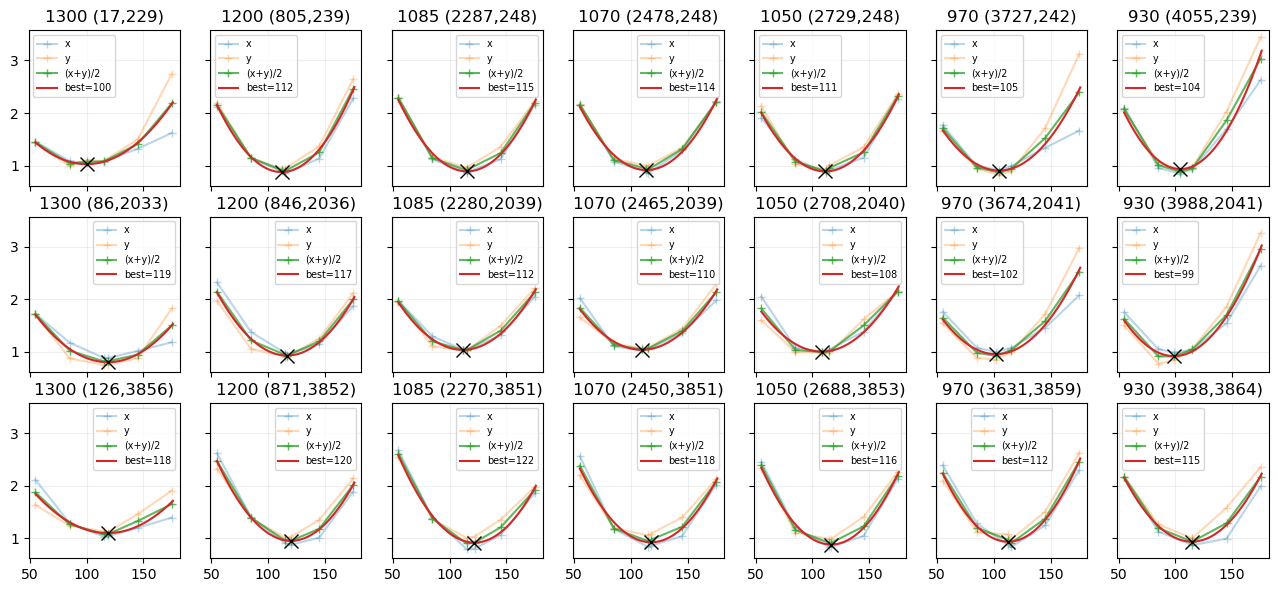

In [653]:
plt.close('all')
f, bestFocus = plotFocusGrid(ledFrame)
f.savefig('n1_bestfocus.pdf')
f

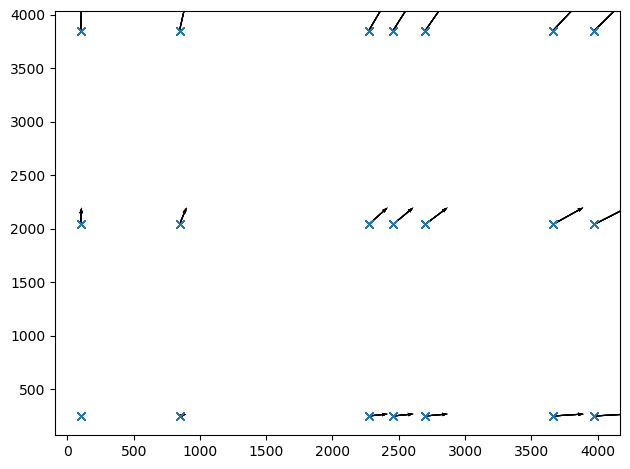

In [699]:
f,p1 = plt.subplots(num='grid3', clear=True)
xTarget, yTarget = nirander.xStepToPix(ledFrame.xstep), nirander.yStepToPix(ledFrame.ystep)
xMeas, yMeas =  ledFrame.xpix, ledFrame.ypix
#p1.plot(ledFrame.xpix, ledFrame.ypix, '+')
p1.plot(xTarget, yTarget, 'x')
q = p1.quiver(xTarget, yTarget, xMeas, yMeas, width=0.002)
pl.quiverkey(q, X=0.3, Y=0.9, U=10,
             label='length = 10', labelpos='E')
pl.set_xlim(0,4500,auto=False)
pl.set_ylim(0,4500,auto=False)
f.tight_layout()
f

In [1113]:
inFocus = ledFrame[ledFrame['focus'].astype('i4') != ledFrame['focus']].reset_index()
print(inFocus.to_string(float_format=lambda f:f'{f:0.3f}'))

    index  visit   focus    x2    y2     xpix     ypix      flux      peak  size  xstep  ystep  wavelength  dutyCycle
0       5   6709 100.289 1.041 1.104   16.289  228.121 32687.207  6306.116 1.073   3343   4704        1300        100
1      11   6715 118.739 0.884 0.760   85.101 2032.474 28145.162  8098.922 0.822   3343  14181        1300        100
2      17   6721 118.494 1.036 1.113  125.044 3857.126 30297.643  6021.458 1.074   3343  24079        1300        100
3      23   6727 111.981 0.891 0.940  804.866  238.238 65665.578 20469.408 0.915  13713   4704        1200         33
4      29   6733 116.688 0.948 0.911  845.883 2035.554 63011.379 17311.297 0.930  13713  14181        1200         33
5      35   6739 120.257 0.877 1.027  869.946 3852.962 62606.562 21326.340 0.952  13713  24079        1200         33
6      41   6745 115.400 0.874 0.967 2286.921  247.252 69078.172 19642.436 0.920  33473   4704        1085         30
7      47   6751 111.748 1.043 1.031 2280.452 2038.755 7

In [669]:
quickSpotGrid(inFocus, d3, rad=15, file='n1_infocus.fits')

0 1300 16 228
1 1300 85 2032
2 1300 125 3857
3 1200 805 238
4 1200 846 2036
5 1200 870 3853
6 1085 2287 247
7 1085 2280 2039
8 1085 2270 3852
9 1070 2478 247
10 1070 2465 2039
11 1070 2450 3852
12 1050 2730 247
13 1050 2708 2040
14 1050 2688 3854
15 970 3728 241
16 970 3674 2041
17 970 3632 3860
18 930 4055 239
19 930 3989 2041
20 930 3939 3865


2020-04-02 22:04:43.840Z butler           10 butler.py:69 loaded butler from {'pfi': {'template': 'pfi/PFI.yaml', 'loader': <bound method YAML.load of <ruamel_yaml.main.YAML object at 0x7fc25ffc34d0>>}, 'modulePath': {'template': 'pfi/cobras/{moduleName}'}, 'cobraGeometry': {'template': 'pfi/cobras/{moduleName}/{cobraInModule}/geometry.yaml', 'loaderModule': 'ics.cobraCharmer.cobra'}, 'moduleXml': {'template': 'pfi/modules/{moduleName}/{moduleName}{version}.xml', 'loaderModule': 'ics.cobraCharmer.pfiDesign'}, 'motorMap': {'template': 'pfi/cobras/{moduleName}/{cobraModuleId}/maps/{motor}_{direction}_{mapName}.yaml', 'loaderModule': 'ics.cobraCharmer.motormap'}, 'configRoot': {'template': '/data/pfsx/config'}}, for {'fpsRun': {'template': 'pfs/{pfsDay}/fps/{visit:06d}'}, 'spsFile': {'template': 'pfs/{pfsDay}/sps/PF{site}A{visit:06d}{spectrograph}{armNum}.fits'}, 'rampFile': {'template': 'pfs/{pfsDay}/sps/PF{site}B{visit:06d}{spectrograph}{armNum}.fits'}, 'mcsFile': {'template': 'pfs/{pfs

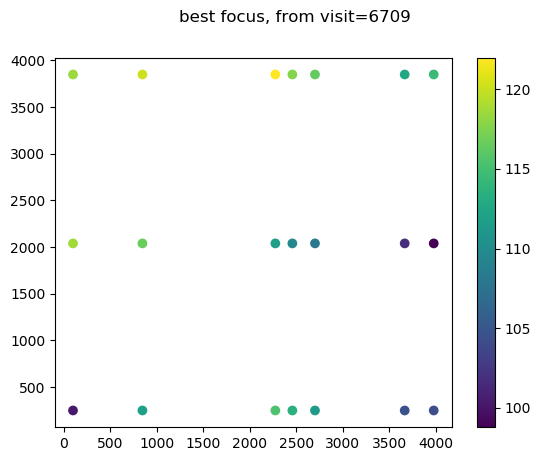

In [716]:
reload(hxdisp)
hxdisp.focusOffsetPlot(meade, inFocus, visit=inFocus['visit'].min())

# Dither tests

In [1250]:
reload(nirander)
meade =  nirander.NirIlluminator()
meade.moveToPix(2274,2040)
dark = nirander.takeSuperDark(meade,nread=5,nexp=5,force=True)

2020-04-07 20:38:13.306Z butler           10 butler.py:69 loaded butler from {'pfi': {'template': 'pfi/PFI.yaml', 'loader': <bound method YAML.load of <ruamel_yaml.main.YAML object at 0x7fc1f3604fd0>>}, 'modulePath': {'template': 'pfi/cobras/{moduleName}'}, 'cobraGeometry': {'template': 'pfi/cobras/{moduleName}/{cobraInModule}/geometry.yaml', 'loaderModule': 'ics.cobraCharmer.cobra'}, 'moduleXml': {'template': 'pfi/modules/{moduleName}/{moduleName}{version}.xml', 'loaderModule': 'ics.cobraCharmer.pfiDesign'}, 'motorMap': {'template': 'pfi/cobras/{moduleName}/{cobraModuleId}/maps/{motor}_{direction}_{mapName}.yaml', 'loaderModule': 'ics.cobraCharmer.motormap'}, 'configRoot': {'template': '/data/pfsx/config'}}, for {'fpsRun': {'template': 'pfs/{pfsDay}/fps/{visit:06d}'}, 'spsFile': {'template': 'pfs/{pfsDay}/sps/PF{site}A{visit:06d}{spectrograph}{armNum}.fits'}, 'rampFile': {'template': 'pfs/{pfsDay}/sps/PF{site}B{visit:06d}{spectrograph}{armNum}.fits'}, 'mcsFile': {'template': 'pfs/{pfs

['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=5']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=5']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=5']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=5']
['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=5']
dmed(1:1) = 0.000
dmed(1:2) = 0.000
dmed(1:3) = -1.000
dmed(1:4) = 0.000
dmed(2:1) = 0.000
dmed(2:2) = 1.000
dmed(2:3) = 0.000
dmed(2:4) = 1.000
dmed(3:1) = -1.000
dmed(3:2) = 0.000
dmed(3:3) = -1.000
dmed(3:4) = 0.000
dmed(4:1) = 0.000
dmed(4:2) = -1.000
dmed(4:3) = -1.000
dmed(4:4) = 0.000


In [1253]:
reload(hx)
nirander.butler.put(dark, 'dark', dict(visit=dark.visit0))
hxCalib = hx.HxCalib(cam=cam, darkStack=dark, badMask=badMask)

2020-04-07 21:24:35.923Z butler           10 butler.py:303 dumping dark({'visit': 8157}) = <class 'darkCube.DarkCube'> to /data/pfsx/redux/20200408/n1/dark-00815713.fits


In [725]:
dithers_1085 =  dithers

In [746]:
dithers_full = dithers

In [748]:
(4088 - np.array([100.0, 846, 2274, 2457, 2700, 3664, 3976]))[::-1]

array([ 112.,  424., 1388., 1631., 1814., 3242., 3988.])

In [ ]:
reload(nirander)
meade = nirander.NirIlluminator()

focus = []
for led in meade.leds.wave:
    x =  meade.leds.position[led]
    y = 96, 2000, 4000

    focus = 110
    # pfsutils.oneCmd('xcu_n1', f'motor move piston={focus} abs microns')
    meade.led(led)
    lampInfo = meade.ledState()
    dither1 = nirander.ditherAt(meade, led=led, center=pos, nramps=5)
    focus.append(dither1)
    dither1['focus'] = f
    dither1['wavelength'] = led
    dither1['dutyCycle'] = lampInfo[1]
    print(dither1)
    meade.ledsOff()
meade.ledsOff()

In [ ]:
reload(nirander)
meade = nirander.NirIlluminator()

dithers = []
for led in meade.leds.wave:
    x =  meade.leds.position[led]
    y = 96, 2000, 4000
    if led == 1085:
        focus = 112
    else:
        focus = 104.5
        pos = nirander.xStepToPix(52618), nirander.yStepToPix(4710)
    
    for pos in poslist:
        for f in focus,:#,focus-20,focus+20:
            pfsutils.oneCmd('xcu_n1', f'motor move piston={f} abs microns')
            meade.led(led)
            lampInfo = meade.ledState()
            dither1 = nirander.ditherAt(meade, led=led, center=pos, nramps=5)
            dithers.append(dither1)
            dither1['focus'] = f
            dither1['wavelength'] = led
            dither1['dutyCycle'] = lampInfo[1]
            print(dither1)
    meade.ledsOff()
meade.ledsOff()

In [743]:
reload(nirander)

dithers = []
for led in 1085, 970:
    if led == 1085:
        focus = 112
        pos = nirander.xStepToPix(33473), nirander.yStepToPix(14181)
    else:
        focus = 104.5
        pos = nirander.xStepToPix(52618), nirander.yStepToPix(4710)
    
    for f in focus,focus-20,focus+20:
        pfsutils.oneCmd('xcu_n1', f'motor move piston={f} abs microns')
        meade.led(led)
        lampInfo = meade.ledState()
        dither1 = nirander.ditherAt(meade, led=led, center=pos, nramps=5)
        dithers.append(dither1)
        dither1['focus'] = f
        dither1['wavelength'] = led
        dither1['dutyCycle'] = lampInfo[1]
        print(dither1)
    meade.ledsOff()
meade.ledsOff()

2020-04-05 03:09:40.340Z butler           10 butler.py:69 loaded butler from {'pfi': {'template': 'pfi/PFI.yaml', 'loader': <bound method YAML.load of <ruamel_yaml.main.YAML object at 0x7fc25ffbb1d0>>}, 'modulePath': {'template': 'pfi/cobras/{moduleName}'}, 'cobraGeometry': {'template': 'pfi/cobras/{moduleName}/{cobraInModule}/geometry.yaml', 'loaderModule': 'ics.cobraCharmer.cobra'}, 'moduleXml': {'template': 'pfi/modules/{moduleName}/{moduleName}{version}.xml', 'loaderModule': 'ics.cobraCharmer.pfiDesign'}, 'motorMap': {'template': 'pfi/cobras/{moduleName}/{cobraModuleId}/maps/{motor}_{direction}_{mapName}.yaml', 'loaderModule': 'ics.cobraCharmer.motormap'}, 'configRoot': {'template': '/data/pfsx/config'}}, for {'fpsRun': {'template': 'pfs/{pfsDay}/fps/{visit:06d}'}, 'spsFile': {'template': 'pfs/{pfsDay}/sps/PF{site}A{visit:06d}{spectrograph}{armNum}.fits'}, 'rampFile': {'template': 'pfs/{pfsDay}/sps/PF{site}B{visit:06d}{spectrograph}{armNum}.fits'}, 'mcsFile': {'template': 'pfs/{pfs

['oneCmd.py', '--level=w', 'xcu_n1', 'motor', 'move', 'piston=112', 'abs', 'microns']


2020-04-05 03:09:41.447Z meade            30 nirander.py:122 send: led 1085 30
2020-04-05 03:09:41.450Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 03:09:41.451Z meade            30 nirander.py:122 send: led 1085 30
2020-04-05 03:09:41.453Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 03:09:41.662Z meade            30 nirander.py:122 send: move 33268 13979
2020-04-05 03:10:00.801Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 03:10:00.803Z meade            30 nirander.py:122 send: move 33468 14179
2020-04-05 03:10:01.512Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:10:52.238Z meade            30 nirander.py:122 send: move 33468 14181
2020-04-05 03:10:52.644Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:11:46.691Z meade            30 nirander.py:122 send: move 33468 14183
2020-04-05 03:11:47.098Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:12:40.216Z meade            30 nirander.py:122 send: move 33468 14185
2020-04-05 03:12:40.624Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:13:34.646Z meade            30 nirander.py:122 send: move 33273 13979
2020-04-05 03:13:35.355Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 03:13:35.357Z meade            30 nirander.py:122 send: move 33473 14179
2020-04-05 03:13:36.066Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:14:29.491Z meade            30 nirander.py:122 send: move 33473 14181
2020-04-05 03:14:29.898Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:15:23.185Z meade            30 nirander.py:122 send: move 33473 14183
2020-04-05 03:15:23.592Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:16:18.097Z meade            30 nirander.py:122 send: move 33473 14185
2020-04-05 03:16:18.504Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:17:11.807Z meade            30 nirander.py:122 send: move 33278 13979
2020-04-05 03:17:12.516Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 03:17:12.518Z meade            30 nirander.py:122 send: move 33478 14179
2020-04-05 03:17:13.227Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:18:06.139Z meade            30 nirander.py:122 send: move 33478 14181
2020-04-05 03:18:06.546Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:19:00.492Z meade            30 nirander.py:122 send: move 33478 14183
2020-04-05 03:19:00.899Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:19:54.560Z meade            30 nirander.py:122 send: move 33478 14185
2020-04-05 03:19:54.967Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:20:49.136Z meade            30 nirander.py:122 send: move 33283 13979
2020-04-05 03:20:49.846Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 03:20:49.848Z meade            30 nirander.py:122 send: move 33483 14179
2020-04-05 03:20:50.558Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:21:43.911Z meade            30 nirander.py:122 send: move 33483 14181
2020-04-05 03:21:44.315Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:22:37.682Z meade            30 nirander.py:122 send: move 33483 14183
2020-04-05 03:22:38.089Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:23:32.220Z meade            30 nirander.py:122 send: move 33483 14185
2020-04-05 03:23:32.627Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:24:26.417Z meade            30 nirander.py:122 send: led 1085 30
2020-04-05 03:24:26.420Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 03:24:26.629Z meade            30 nirander.py:122 send: move 33268 13979
2020-04-05 03:24:27.338Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 03:24:27.340Z meade            30 nirander.py:122 send: move 33468 14179
2020-04-05 03:24:28.048Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:25:20.259Z meade            30 nirander.py:122 send: move 33468 14181
2020-04-05 03:25:20.666Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:26:15.573Z meade            30 nirander.py:122 send: move 33468 14183
2020-04-05 03:26:15.980Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:27:09.516Z meade            30 nirander.py:122 send: move 33468 14185
2020-04-05 03:27:09.923Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:28:03.238Z meade            30 nirander.py:122 send: move 33273 13979
2020-04-05 03:28:03.947Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 03:28:03.949Z meade            30 nirander.py:122 send: move 33473 14179
2020-04-05 03:28:04.657Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:28:58.116Z meade            30 nirander.py:122 send: move 33473 14181
2020-04-05 03:28:58.521Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:29:52.106Z meade            30 nirander.py:122 send: move 33473 14183
2020-04-05 03:29:52.513Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:30:46.460Z meade            30 nirander.py:122 send: move 33473 14185
2020-04-05 03:30:46.866Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:31:40.903Z meade            30 nirander.py:122 send: move 33278 13979
2020-04-05 03:31:41.611Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 03:31:41.613Z meade            30 nirander.py:122 send: move 33478 14179
2020-04-05 03:31:42.322Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:32:34.687Z meade            30 nirander.py:122 send: move 33478 14181
2020-04-05 03:32:35.093Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:33:29.649Z meade            30 nirander.py:122 send: move 33478 14183
2020-04-05 03:33:30.054Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:34:24.709Z meade            30 nirander.py:122 send: move 33478 14185
2020-04-05 03:34:25.116Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:35:18.335Z meade            30 nirander.py:122 send: move 33283 13979
2020-04-05 03:35:19.044Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 03:35:19.046Z meade            30 nirander.py:122 send: move 33483 14179
2020-04-05 03:35:19.754Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:36:12.602Z meade            30 nirander.py:122 send: move 33483 14181
2020-04-05 03:36:13.009Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:37:06.538Z meade            30 nirander.py:122 send: move 33483 14183
2020-04-05 03:37:06.943Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:38:00.780Z meade            30 nirander.py:122 send: move 33483 14185
2020-04-05 03:38:01.188Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:38:54.835Z meade            30 nirander.py:122 send: led 1085 30
2020-04-05 03:38:54.837Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 03:38:55.046Z meade            30 nirander.py:122 send: move 33268 13979
2020-04-05 03:38:55.756Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 03:38:55.758Z meade            30 nirander.py:122 send: move 33468 14179
2020-04-05 03:38:56.467Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:39:49.569Z meade            30 nirander.py:122 send: move 33468 14181
2020-04-05 03:39:49.976Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:40:44.251Z meade            30 nirander.py:122 send: move 33468 14183
2020-04-05 03:40:44.657Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:41:37.845Z meade            30 nirander.py:122 send: move 33468 14185
2020-04-05 03:41:38.252Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:42:32.673Z meade            30 nirander.py:122 send: move 33273 13979
2020-04-05 03:42:33.382Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 03:42:33.383Z meade            30 nirander.py:122 send: move 33473 14179
2020-04-05 03:42:34.091Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:43:26.934Z meade            30 nirander.py:122 send: move 33473 14181
2020-04-05 03:43:27.341Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:44:20.392Z meade            30 nirander.py:122 send: move 33473 14183
2020-04-05 03:44:20.798Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:45:16.008Z meade            30 nirander.py:122 send: move 33473 14185
2020-04-05 03:45:16.415Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:46:10.340Z meade            30 nirander.py:122 send: move 33278 13979
2020-04-05 03:46:11.050Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 03:46:11.052Z meade            30 nirander.py:122 send: move 33478 14179
2020-04-05 03:46:11.761Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:47:03.751Z meade            30 nirander.py:122 send: move 33478 14181
2020-04-05 03:47:04.157Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:47:58.223Z meade            30 nirander.py:122 send: move 33478 14183
2020-04-05 03:47:58.630Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:48:52.006Z meade            30 nirander.py:122 send: move 33478 14185
2020-04-05 03:48:52.413Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:49:46.376Z meade            30 nirander.py:122 send: move 33283 13979
2020-04-05 03:49:47.086Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 03:49:47.087Z meade            30 nirander.py:122 send: move 33483 14179
2020-04-05 03:49:47.798Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:50:40.566Z meade            30 nirander.py:122 send: move 33483 14181
2020-04-05 03:50:40.973Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:51:35.302Z meade            30 nirander.py:122 send: move 33483 14183
2020-04-05 03:51:35.708Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:52:30.105Z meade            30 nirander.py:122 send: move 33483 14185
2020-04-05 03:52:30.511Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:53:23.937Z meade            30 nirander.py:122 send: led 1085 30
2020-04-05 03:53:23.939Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 03:53:24.148Z meade            30 nirander.py:122 send: move 33268 13979
2020-04-05 03:53:24.857Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 03:53:24.858Z meade            30 nirander.py:122 send: move 33468 14179
2020-04-05 03:53:25.567Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:54:18.821Z meade            30 nirander.py:122 send: move 33468 14181
2020-04-05 03:54:19.228Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:55:12.530Z meade            30 nirander.py:122 send: move 33468 14183
2020-04-05 03:55:12.936Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:56:06.454Z meade            30 nirander.py:122 send: move 33468 14185
2020-04-05 03:56:06.860Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:57:01.235Z meade            30 nirander.py:122 send: move 33273 13979
2020-04-05 03:57:01.944Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 03:57:01.946Z meade            30 nirander.py:122 send: move 33473 14179
2020-04-05 03:57:02.655Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:57:55.020Z meade            30 nirander.py:122 send: move 33473 14181
2020-04-05 03:57:55.426Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:58:49.564Z meade            30 nirander.py:122 send: move 33473 14183
2020-04-05 03:58:49.971Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 03:59:44.484Z meade            30 nirander.py:122 send: move 33473 14185
2020-04-05 03:59:44.891Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:00:38.705Z meade            30 nirander.py:122 send: move 33278 13979
2020-04-05 04:00:39.415Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 04:00:39.417Z meade            30 nirander.py:122 send: move 33478 14179
2020-04-05 04:00:40.126Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:01:32.685Z meade            30 nirander.py:122 send: move 33478 14181
2020-04-05 04:01:33.092Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:02:27.537Z meade            30 nirander.py:122 send: move 33478 14183
2020-04-05 04:02:27.944Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:03:21.295Z meade            30 nirander.py:122 send: move 33478 14185
2020-04-05 04:03:21.701Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:04:15.425Z meade            30 nirander.py:122 send: move 33283 13979
2020-04-05 04:04:16.132Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 04:04:16.134Z meade            30 nirander.py:122 send: move 33483 14179
2020-04-05 04:04:16.843Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:05:09.966Z meade            30 nirander.py:122 send: move 33483 14181
2020-04-05 04:05:10.373Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:06:04.156Z meade            30 nirander.py:122 send: move 33483 14183
2020-04-05 04:06:04.563Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:06:59.040Z meade            30 nirander.py:122 send: move 33483 14185
2020-04-05 04:06:59.447Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:07:53.015Z meade            30 nirander.py:122 send: led 1085 30
2020-04-05 04:07:53.017Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 04:07:53.226Z meade            30 nirander.py:122 send: move 33268 13979
2020-04-05 04:07:53.934Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 04:07:53.936Z meade            30 nirander.py:122 send: move 33468 14179
2020-04-05 04:07:54.645Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:08:47.148Z meade            30 nirander.py:122 send: move 33468 14181
2020-04-05 04:08:47.555Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:09:41.709Z meade            30 nirander.py:122 send: move 33468 14183
2020-04-05 04:09:42.115Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:10:36.348Z meade            30 nirander.py:122 send: move 33468 14185
2020-04-05 04:10:36.755Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:11:30.100Z meade            30 nirander.py:122 send: move 33273 13979
2020-04-05 04:11:30.806Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 04:11:30.808Z meade            30 nirander.py:122 send: move 33473 14179
2020-04-05 04:11:31.515Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:12:24.489Z meade            30 nirander.py:122 send: move 33473 14181
2020-04-05 04:12:24.895Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:13:18.542Z meade            30 nirander.py:122 send: move 33473 14183
2020-04-05 04:13:18.949Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:14:12.741Z meade            30 nirander.py:122 send: move 33473 14185
2020-04-05 04:14:13.148Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:15:07.251Z meade            30 nirander.py:122 send: move 33278 13979
2020-04-05 04:15:07.957Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 04:15:07.959Z meade            30 nirander.py:122 send: move 33478 14179
2020-04-05 04:15:08.667Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:16:01.519Z meade            30 nirander.py:122 send: move 33478 14181
2020-04-05 04:16:01.925Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:16:56.202Z meade            30 nirander.py:122 send: move 33478 14183
2020-04-05 04:16:56.609Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:17:50.129Z meade            30 nirander.py:122 send: move 33478 14185
2020-04-05 04:17:50.536Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:18:44.731Z meade            30 nirander.py:122 send: move 33283 13979
2020-04-05 04:18:45.440Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 04:18:45.444Z meade            30 nirander.py:122 send: move 33483 14179
2020-04-05 04:18:46.153Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:19:40.235Z meade            30 nirander.py:122 send: move 33483 14181
2020-04-05 04:19:40.642Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:20:33.489Z meade            30 nirander.py:122 send: move 33483 14183
2020-04-05 04:20:33.896Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:21:28.765Z meade            30 nirander.py:122 send: move 33483 14185
2020-04-05 04:21:29.172Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
    visit  xstep  ystep  focus  wavelength  dutyCycle
0    7307  33468  14179    112        1085         30
1    7308  33468  14181    112        1085         30
2    7309  33468  14183    112        1085         30
3    7310  33468  14185    112        1085         30
4    7311  33473  14179    112        1085         30
..    ...    ...    ...    ...         ...        ...
75   7382  33478  14185    112        1085         30
76   7383  33483  14179    112        1085         30
77   7384  33483  14181    112        1085         30
78   7385  33483  14183    112        1085         30
79   7386  33483  14185    112        1085         30

[80 rows x 6 columns]
['oneCmd.py', '--level=w', 'xcu_n1', 'motor', 'move', 'piston=92', 'abs', 'microns']


2020-04-05 04:22:21.999Z meade            30 nirander.py:122 send: led 1085 30
2020-04-05 04:22:22.001Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 04:22:22.003Z meade            30 nirander.py:122 send: led 1085 30
2020-04-05 04:22:22.004Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 04:22:22.210Z meade            30 nirander.py:122 send: move 33268 13979
2020-04-05 04:22:22.915Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 04:22:22.917Z meade            30 nirander.py:122 send: move 33468 14179
2020-04-05 04:22:23.623Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:23:15.708Z meade            30 nirander.py:122 send: move 33468 14181
2020-04-05 04:23:16.114Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:24:10.342Z meade            30 nirander.py:122 send: move 33468 14183
2020-04-05 04:24:10.748Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:25:04.693Z meade            30 nirander.py:122 send: move 33468 14185
2020-04-05 04:25:05.099Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:25:58.896Z meade            30 nirander.py:122 send: move 33273 13979
2020-04-05 04:25:59.603Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 04:25:59.605Z meade            30 nirander.py:122 send: move 33473 14179
2020-04-05 04:26:00.311Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:26:52.977Z meade            30 nirander.py:122 send: move 33473 14181
2020-04-05 04:26:53.383Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:27:47.211Z meade            30 nirander.py:122 send: move 33473 14183
2020-04-05 04:27:47.618Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:28:42.338Z meade            30 nirander.py:122 send: move 33473 14185
2020-04-05 04:28:42.744Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:29:35.991Z meade            30 nirander.py:122 send: move 33278 13979
2020-04-05 04:29:36.700Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 04:29:36.702Z meade            30 nirander.py:122 send: move 33478 14179
2020-04-05 04:29:37.411Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:30:31.153Z meade            30 nirander.py:122 send: move 33478 14181
2020-04-05 04:30:31.560Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:31:24.731Z meade            30 nirander.py:122 send: move 33478 14183
2020-04-05 04:31:25.138Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:32:18.603Z meade            30 nirander.py:122 send: move 33478 14185
2020-04-05 04:32:19.010Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:33:13.765Z meade            30 nirander.py:122 send: move 33283 13979
2020-04-05 04:33:14.474Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 04:33:14.476Z meade            30 nirander.py:122 send: move 33483 14179
2020-04-05 04:33:15.184Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:34:07.158Z meade            30 nirander.py:122 send: move 33483 14181
2020-04-05 04:34:07.562Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:35:01.575Z meade            30 nirander.py:122 send: move 33483 14183
2020-04-05 04:35:01.982Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:35:56.582Z meade            30 nirander.py:122 send: move 33483 14185
2020-04-05 04:35:56.989Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:36:51.059Z meade            30 nirander.py:122 send: led 1085 30
2020-04-05 04:36:51.062Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 04:36:51.270Z meade            30 nirander.py:122 send: move 33268 13979
2020-04-05 04:36:51.979Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 04:36:51.981Z meade            30 nirander.py:122 send: move 33468 14179
2020-04-05 04:36:52.689Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:37:44.421Z meade            30 nirander.py:122 send: move 33468 14181
2020-04-05 04:37:44.827Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:38:38.628Z meade            30 nirander.py:122 send: move 33468 14183
2020-04-05 04:38:39.034Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:39:33.252Z meade            30 nirander.py:122 send: move 33468 14185
2020-04-05 04:39:33.659Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:40:27.567Z meade            30 nirander.py:122 send: move 33273 13979
2020-04-05 04:40:28.276Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 04:40:28.277Z meade            30 nirander.py:122 send: move 33473 14179
2020-04-05 04:40:28.987Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:41:21.994Z meade            30 nirander.py:122 send: move 33473 14181
2020-04-05 04:41:22.400Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:42:16.096Z meade            30 nirander.py:122 send: move 33473 14183
2020-04-05 04:42:16.503Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:43:11.130Z meade            30 nirander.py:122 send: move 33473 14185
2020-04-05 04:43:11.537Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:44:04.885Z meade            30 nirander.py:122 send: move 33278 13979
2020-04-05 04:44:05.594Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 04:44:05.596Z meade            30 nirander.py:122 send: move 33478 14179
2020-04-05 04:44:06.304Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:44:59.438Z meade            30 nirander.py:122 send: move 33478 14181
2020-04-05 04:44:59.843Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:45:53.413Z meade            30 nirander.py:122 send: move 33478 14183
2020-04-05 04:45:53.819Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:46:48.383Z meade            30 nirander.py:122 send: move 33478 14185
2020-04-05 04:46:48.790Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:47:41.800Z meade            30 nirander.py:122 send: move 33283 13979
2020-04-05 04:47:42.509Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 04:47:42.510Z meade            30 nirander.py:122 send: move 33483 14179
2020-04-05 04:47:43.219Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:48:36.361Z meade            30 nirander.py:122 send: move 33483 14181
2020-04-05 04:48:36.765Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:49:31.231Z meade            30 nirander.py:122 send: move 33483 14183
2020-04-05 04:49:31.638Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:50:24.798Z meade            30 nirander.py:122 send: move 33483 14185
2020-04-05 04:50:25.204Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:51:19.411Z meade            30 nirander.py:122 send: led 1085 30
2020-04-05 04:51:19.413Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 04:51:19.622Z meade            30 nirander.py:122 send: move 33268 13979
2020-04-05 04:51:20.331Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 04:51:20.332Z meade            30 nirander.py:122 send: move 33468 14179
2020-04-05 04:51:21.041Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:52:13.760Z meade            30 nirander.py:122 send: move 33468 14181
2020-04-05 04:52:14.165Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:53:07.895Z meade            30 nirander.py:122 send: move 33468 14183
2020-04-05 04:53:08.301Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:54:02.532Z meade            30 nirander.py:122 send: move 33468 14185
2020-04-05 04:54:02.939Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:54:56.483Z meade            30 nirander.py:122 send: move 33273 13979
2020-04-05 04:54:57.193Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 04:54:57.195Z meade            30 nirander.py:122 send: move 33473 14179
2020-04-05 04:54:57.903Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:55:51.185Z meade            30 nirander.py:122 send: move 33473 14181
2020-04-05 04:55:51.590Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:56:44.961Z meade            30 nirander.py:122 send: move 33473 14183
2020-04-05 04:56:45.368Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:57:39.457Z meade            30 nirander.py:122 send: move 33473 14185
2020-04-05 04:57:39.864Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:58:34.212Z meade            30 nirander.py:122 send: move 33278 13979
2020-04-05 04:58:34.921Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 04:58:34.923Z meade            30 nirander.py:122 send: move 33478 14179
2020-04-05 04:58:35.630Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 04:59:27.943Z meade            30 nirander.py:122 send: move 33478 14181
2020-04-05 04:59:28.349Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:00:22.688Z meade            30 nirander.py:122 send: move 33478 14183
2020-04-05 05:00:23.094Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:01:16.528Z meade            30 nirander.py:122 send: move 33478 14185
2020-04-05 05:01:16.935Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:02:10.830Z meade            30 nirander.py:122 send: move 33283 13979
2020-04-05 05:02:11.539Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 05:02:11.541Z meade            30 nirander.py:122 send: move 33483 14179
2020-04-05 05:02:12.250Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:03:05.096Z meade            30 nirander.py:122 send: move 33483 14181
2020-04-05 05:03:05.502Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:03:59.615Z meade            30 nirander.py:122 send: move 33483 14183
2020-04-05 05:04:00.019Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:04:54.233Z meade            30 nirander.py:122 send: move 33483 14185
2020-04-05 05:04:54.639Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:05:47.714Z meade            30 nirander.py:122 send: led 1085 30
2020-04-05 05:05:47.717Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 05:05:47.926Z meade            30 nirander.py:122 send: move 33268 13979
2020-04-05 05:05:48.635Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 05:05:48.637Z meade            30 nirander.py:122 send: move 33468 14179
2020-04-05 05:05:49.346Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:06:42.656Z meade            30 nirander.py:122 send: move 33468 14181
2020-04-05 05:06:43.062Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:07:37.091Z meade            30 nirander.py:122 send: move 33468 14183
2020-04-05 05:07:37.498Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:08:31.068Z meade            30 nirander.py:122 send: move 33468 14185
2020-04-05 05:08:31.475Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:09:25.378Z meade            30 nirander.py:122 send: move 33273 13979
2020-04-05 05:09:26.086Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 05:09:26.088Z meade            30 nirander.py:122 send: move 33473 14179
2020-04-05 05:09:26.797Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:10:20.741Z meade            30 nirander.py:122 send: move 33473 14181
2020-04-05 05:10:21.149Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:11:13.628Z meade            30 nirander.py:122 send: move 33473 14183
2020-04-05 05:11:14.034Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:12:07.931Z meade            30 nirander.py:122 send: move 33473 14185
2020-04-05 05:12:08.338Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:13:02.395Z meade            30 nirander.py:122 send: move 33278 13979
2020-04-05 05:13:03.105Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 05:13:03.107Z meade            30 nirander.py:122 send: move 33478 14179
2020-04-05 05:13:03.815Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:13:57.471Z meade            30 nirander.py:122 send: move 33478 14181
2020-04-05 05:13:57.878Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:14:50.894Z meade            30 nirander.py:122 send: move 33478 14183
2020-04-05 05:14:51.301Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:15:45.427Z meade            30 nirander.py:122 send: move 33478 14185
2020-04-05 05:15:45.834Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:16:40.004Z meade            30 nirander.py:122 send: move 33283 13979
2020-04-05 05:16:40.713Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 05:16:40.715Z meade            30 nirander.py:122 send: move 33483 14179
2020-04-05 05:16:41.423Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:17:33.383Z meade            30 nirander.py:122 send: move 33483 14181
2020-04-05 05:17:33.790Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:18:28.275Z meade            30 nirander.py:122 send: move 33483 14183
2020-04-05 05:18:28.682Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:19:22.552Z meade            30 nirander.py:122 send: move 33483 14185
2020-04-05 05:19:22.958Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:20:16.678Z meade            30 nirander.py:122 send: led 1085 30
2020-04-05 05:20:16.681Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 05:20:16.890Z meade            30 nirander.py:122 send: move 33268 13979
2020-04-05 05:20:17.599Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 05:20:17.601Z meade            30 nirander.py:122 send: move 33468 14179
2020-04-05 05:20:18.309Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:21:11.286Z meade            30 nirander.py:122 send: move 33468 14181
2020-04-05 05:21:11.693Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:22:05.728Z meade            30 nirander.py:122 send: move 33468 14183
2020-04-05 05:22:06.135Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:22:59.789Z meade            30 nirander.py:122 send: move 33468 14185
2020-04-05 05:23:00.196Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:23:54.064Z meade            30 nirander.py:122 send: move 33273 13979
2020-04-05 05:23:54.773Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 05:23:54.775Z meade            30 nirander.py:122 send: move 33473 14179
2020-04-05 05:23:55.484Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:24:48.850Z meade            30 nirander.py:122 send: move 33473 14181
2020-04-05 05:24:49.257Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:25:42.000Z meade            30 nirander.py:122 send: move 33473 14183
2020-04-05 05:25:42.406Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:26:37.220Z meade            30 nirander.py:122 send: move 33473 14185
2020-04-05 05:26:37.626Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:27:31.183Z meade            30 nirander.py:122 send: move 33278 13979
2020-04-05 05:27:31.892Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 05:27:31.894Z meade            30 nirander.py:122 send: move 33478 14179
2020-04-05 05:27:32.603Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:28:25.279Z meade            30 nirander.py:122 send: move 33478 14181
2020-04-05 05:28:25.685Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:29:19.718Z meade            30 nirander.py:122 send: move 33478 14183
2020-04-05 05:29:20.124Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:30:14.240Z meade            30 nirander.py:122 send: move 33478 14185
2020-04-05 05:30:14.647Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:31:08.180Z meade            30 nirander.py:122 send: move 33283 13979
2020-04-05 05:31:08.889Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 05:31:08.891Z meade            30 nirander.py:122 send: move 33483 14179
2020-04-05 05:31:09.600Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:32:03.088Z meade            30 nirander.py:122 send: move 33483 14181
2020-04-05 05:32:03.495Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:32:57.442Z meade            30 nirander.py:122 send: move 33483 14183
2020-04-05 05:32:57.849Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:33:51.384Z meade            30 nirander.py:122 send: move 33483 14185
2020-04-05 05:33:51.789Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
    visit  xstep  ystep  focus  wavelength  dutyCycle
0    7387  33468  14179     92        1085         30
1    7388  33468  14181     92        1085         30
2    7389  33468  14183     92        1085         30
3    7390  33468  14185     92        1085         30
4    7391  33473  14179     92        1085         30
..    ...    ...    ...    ...         ...        ...
75   7462  33478  14185     92        1085         30
76   7463  33483  14179     92        1085         30
77   7464  33483  14181     92        1085         30
78   7465  33483  14183     92        1085         30
79   7466  33483  14185     92        1085         30

[80 rows x 6 columns]
['oneCmd.py', '--level=w', 'xcu_n1', 'motor', 'move', 'piston=132', 'abs', 'microns']


2020-04-05 05:34:46.439Z meade            30 nirander.py:122 send: led 1085 30
2020-04-05 05:34:46.441Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 05:34:46.443Z meade            30 nirander.py:122 send: led 1085 30
2020-04-05 05:34:46.445Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 05:34:46.654Z meade            30 nirander.py:122 send: move 33268 13979
2020-04-05 05:34:47.363Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 05:34:47.365Z meade            30 nirander.py:122 send: move 33468 14179
2020-04-05 05:34:48.074Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:35:39.993Z meade            30 nirander.py:122 send: move 33468 14181
2020-04-05 05:35:40.400Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:36:34.172Z meade            30 nirander.py:122 send: move 33468 14183
2020-04-05 05:36:34.579Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:37:29.619Z meade            30 nirander.py:122 send: move 33468 14185
2020-04-05 05:37:30.024Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:38:22.480Z meade            30 nirander.py:122 send: move 33273 13979
2020-04-05 05:38:23.188Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 05:38:23.189Z meade            30 nirander.py:122 send: move 33473 14179
2020-04-05 05:38:23.896Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:39:17.406Z meade            30 nirander.py:122 send: move 33473 14181
2020-04-05 05:39:17.812Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:40:11.766Z meade            30 nirander.py:122 send: move 33473 14183
2020-04-05 05:40:12.172Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:41:05.675Z meade            30 nirander.py:122 send: move 33473 14185
2020-04-05 05:41:06.083Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:42:00.164Z meade            30 nirander.py:122 send: move 33278 13979
2020-04-05 05:42:00.873Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 05:42:00.875Z meade            30 nirander.py:122 send: move 33478 14179
2020-04-05 05:42:01.584Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:42:54.026Z meade            30 nirander.py:122 send: move 33478 14181
2020-04-05 05:42:54.433Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:43:48.347Z meade            30 nirander.py:122 send: move 33478 14183
2020-04-05 05:43:48.754Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:44:43.626Z meade            30 nirander.py:122 send: move 33478 14185
2020-04-05 05:44:44.031Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:45:37.587Z meade            30 nirander.py:122 send: move 33283 13979
2020-04-05 05:45:38.296Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 05:45:38.298Z meade            30 nirander.py:122 send: move 33483 14179
2020-04-05 05:45:39.007Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:46:31.499Z meade            30 nirander.py:122 send: move 33483 14181
2020-04-05 05:46:31.906Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:47:25.467Z meade            30 nirander.py:122 send: move 33483 14183
2020-04-05 05:47:25.874Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:48:19.959Z meade            30 nirander.py:122 send: move 33483 14185
2020-04-05 05:48:20.366Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:49:14.484Z meade            30 nirander.py:122 send: led 1085 30
2020-04-05 05:49:14.486Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 05:49:14.695Z meade            30 nirander.py:122 send: move 33268 13979
2020-04-05 05:49:15.403Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 05:49:15.405Z meade            30 nirander.py:122 send: move 33468 14179
2020-04-05 05:49:16.114Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:50:08.665Z meade            30 nirander.py:122 send: move 33468 14181
2020-04-05 05:50:09.072Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:51:03.160Z meade            30 nirander.py:122 send: move 33468 14183
2020-04-05 05:51:03.567Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:51:57.401Z meade            30 nirander.py:122 send: move 33468 14185
2020-04-05 05:51:57.808Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:52:51.475Z meade            30 nirander.py:122 send: move 33273 13979
2020-04-05 05:52:52.184Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 05:52:52.186Z meade            30 nirander.py:122 send: move 33473 14179
2020-04-05 05:52:52.895Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:53:45.743Z meade            30 nirander.py:122 send: move 33473 14181
2020-04-05 05:53:46.149Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:54:40.470Z meade            30 nirander.py:122 send: move 33473 14183
2020-04-05 05:54:40.877Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:55:34.583Z meade            30 nirander.py:122 send: move 33473 14185
2020-04-05 05:55:34.990Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:56:29.152Z meade            30 nirander.py:122 send: move 33278 13979
2020-04-05 05:56:29.861Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 05:56:29.863Z meade            30 nirander.py:122 send: move 33478 14179
2020-04-05 05:56:30.571Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:57:23.061Z meade            30 nirander.py:122 send: move 33478 14181
2020-04-05 05:57:23.467Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:58:17.628Z meade            30 nirander.py:122 send: move 33478 14183
2020-04-05 05:58:18.035Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 05:59:12.795Z meade            30 nirander.py:122 send: move 33478 14185
2020-04-05 05:59:13.201Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:00:05.875Z meade            30 nirander.py:122 send: move 33283 13979
2020-04-05 06:00:06.582Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 06:00:06.584Z meade            30 nirander.py:122 send: move 33483 14179
2020-04-05 06:00:07.291Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:01:00.725Z meade            30 nirander.py:122 send: move 33483 14181
2020-04-05 06:01:01.132Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:01:55.263Z meade            30 nirander.py:122 send: move 33483 14183
2020-04-05 06:01:55.670Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:02:49.326Z meade            30 nirander.py:122 send: move 33483 14185
2020-04-05 06:02:49.734Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:03:43.353Z meade            30 nirander.py:122 send: led 1085 30
2020-04-05 06:03:43.355Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 06:03:43.564Z meade            30 nirander.py:122 send: move 33268 13979
2020-04-05 06:03:44.273Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 06:03:44.275Z meade            30 nirander.py:122 send: move 33468 14179
2020-04-05 06:03:44.984Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:04:37.453Z meade            30 nirander.py:122 send: move 33468 14181
2020-04-05 06:04:37.860Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:05:31.829Z meade            30 nirander.py:122 send: move 33468 14183
2020-04-05 06:05:32.237Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:06:25.787Z meade            30 nirander.py:122 send: move 33468 14185
2020-04-05 06:06:26.193Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:07:20.389Z meade            30 nirander.py:122 send: move 33273 13979
2020-04-05 06:07:21.098Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 06:07:21.100Z meade            30 nirander.py:122 send: move 33473 14179
2020-04-05 06:07:21.809Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:08:15.025Z meade            30 nirander.py:122 send: move 33473 14181
2020-04-05 06:08:15.432Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:09:09.557Z meade            30 nirander.py:122 send: move 33473 14183
2020-04-05 06:09:09.966Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:10:03.302Z meade            30 nirander.py:122 send: move 33473 14185
2020-04-05 06:10:03.710Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:10:58.219Z meade            30 nirander.py:122 send: move 33278 13979
2020-04-05 06:10:58.928Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 06:10:58.930Z meade            30 nirander.py:122 send: move 33478 14179
2020-04-05 06:10:59.639Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:11:52.510Z meade            30 nirander.py:122 send: move 33478 14181
2020-04-05 06:11:52.917Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:12:45.950Z meade            30 nirander.py:122 send: move 33478 14183
2020-04-05 06:12:46.357Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:13:40.744Z meade            30 nirander.py:122 send: move 33478 14185
2020-04-05 06:13:41.152Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:14:34.863Z meade            30 nirander.py:122 send: move 33283 13979
2020-04-05 06:14:35.570Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 06:14:35.572Z meade            30 nirander.py:122 send: move 33483 14179
2020-04-05 06:14:36.278Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:15:29.364Z meade            30 nirander.py:122 send: move 33483 14181
2020-04-05 06:15:29.770Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:16:24.114Z meade            30 nirander.py:122 send: move 33483 14183
2020-04-05 06:16:24.520Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:17:17.987Z meade            30 nirander.py:122 send: move 33483 14185
2020-04-05 06:17:18.393Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:18:12.571Z meade            30 nirander.py:122 send: led 1085 30
2020-04-05 06:18:12.574Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 06:18:12.782Z meade            30 nirander.py:122 send: move 33268 13979
2020-04-05 06:18:13.491Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 06:18:13.493Z meade            30 nirander.py:122 send: move 33468 14179
2020-04-05 06:18:14.201Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:19:06.206Z meade            30 nirander.py:122 send: move 33468 14181
2020-04-05 06:19:06.611Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:20:01.589Z meade            30 nirander.py:122 send: move 33468 14183
2020-04-05 06:20:01.996Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:20:54.790Z meade            30 nirander.py:122 send: move 33468 14185
2020-04-05 06:20:55.196Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:21:50.567Z meade            30 nirander.py:122 send: move 33273 13979
2020-04-05 06:21:51.275Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 06:21:51.277Z meade            30 nirander.py:122 send: move 33473 14179
2020-04-05 06:21:51.983Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:22:43.568Z meade            30 nirander.py:122 send: move 33473 14181
2020-04-05 06:22:43.973Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:23:38.036Z meade            30 nirander.py:122 send: move 33473 14183
2020-04-05 06:23:38.443Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:24:32.573Z meade            30 nirander.py:122 send: move 33473 14185
2020-04-05 06:24:32.980Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:25:26.414Z meade            30 nirander.py:122 send: move 33278 13979
2020-04-05 06:25:27.124Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 06:25:27.126Z meade            30 nirander.py:122 send: move 33478 14179
2020-04-05 06:25:27.835Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:26:20.886Z meade            30 nirander.py:122 send: move 33478 14181
2020-04-05 06:26:21.293Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:27:14.797Z meade            30 nirander.py:122 send: move 33478 14183
2020-04-05 06:27:15.202Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:28:09.226Z meade            30 nirander.py:122 send: move 33478 14185
2020-04-05 06:28:09.632Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:29:03.548Z meade            30 nirander.py:122 send: move 33283 13979
2020-04-05 06:29:04.258Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 06:29:04.259Z meade            30 nirander.py:122 send: move 33483 14179
2020-04-05 06:29:04.968Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:29:58.314Z meade            30 nirander.py:122 send: move 33483 14181
2020-04-05 06:29:58.719Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:30:53.406Z meade            30 nirander.py:122 send: move 33483 14183
2020-04-05 06:30:53.812Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:31:46.818Z meade            30 nirander.py:122 send: move 33483 14185
2020-04-05 06:31:47.225Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:32:41.552Z meade            30 nirander.py:122 send: led 1085 30
2020-04-05 06:32:41.555Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 06:32:41.764Z meade            30 nirander.py:122 send: move 33268 13979
2020-04-05 06:32:42.473Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 06:32:42.474Z meade            30 nirander.py:122 send: move 33468 14179
2020-04-05 06:32:43.181Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:33:35.155Z meade            30 nirander.py:122 send: move 33468 14181
2020-04-05 06:33:35.561Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:34:29.836Z meade            30 nirander.py:122 send: move 33468 14183
2020-04-05 06:34:30.243Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:35:23.814Z meade            30 nirander.py:122 send: move 33468 14185
2020-04-05 06:35:24.221Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:36:18.770Z meade            30 nirander.py:122 send: move 33273 13979
2020-04-05 06:36:19.479Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 06:36:19.481Z meade            30 nirander.py:122 send: move 33473 14179
2020-04-05 06:36:20.190Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:37:12.956Z meade            30 nirander.py:122 send: move 33473 14181
2020-04-05 06:37:13.363Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:38:06.770Z meade            30 nirander.py:122 send: move 33473 14183
2020-04-05 06:38:07.177Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:39:01.321Z meade            30 nirander.py:122 send: move 33473 14185
2020-04-05 06:39:01.728Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:39:55.424Z meade            30 nirander.py:122 send: move 33278 13979
2020-04-05 06:39:56.133Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 06:39:56.135Z meade            30 nirander.py:122 send: move 33478 14179
2020-04-05 06:39:56.843Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:40:49.647Z meade            30 nirander.py:122 send: move 33478 14181
2020-04-05 06:40:50.054Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:41:44.438Z meade            30 nirander.py:122 send: move 33478 14183
2020-04-05 06:41:44.843Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:42:38.486Z meade            30 nirander.py:122 send: move 33478 14185
2020-04-05 06:42:38.893Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:43:32.397Z meade            30 nirander.py:122 send: move 33283 13979
2020-04-05 06:43:33.107Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 06:43:33.109Z meade            30 nirander.py:122 send: move 33483 14179
2020-04-05 06:43:33.817Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:44:27.351Z meade            30 nirander.py:122 send: move 33483 14181
2020-04-05 06:44:27.757Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:45:21.662Z meade            30 nirander.py:122 send: move 33483 14183
2020-04-05 06:45:22.069Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:46:15.809Z meade            30 nirander.py:122 send: move 33483 14185
2020-04-05 06:46:16.216Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
    visit  xstep  ystep  focus  wavelength  dutyCycle
0    7467  33468  14179    132        1085         30
1    7468  33468  14181    132        1085         30
2    7469  33468  14183    132        1085         30
3    7470  33468  14185    132        1085         30
4    7471  33473  14179    132        1085         30
..    ...    ...    ...    ...         ...        ...
75   7542  33478  14185    132        1085         30
76   7543  33483  14179    132        1085         30
77   7544  33483  14181    132        1085         30
78   7545  33483  14183    132        1085         30
79   7546  33483  14185    132        1085         30

[80 rows x 6 columns]
['oneCmd.py', '--level=w', 'xcu_n1', 'motor', 'move', 'piston=104.5', 'abs', 'microns']


2020-04-05 06:47:13.625Z meade            30 nirander.py:122 send: led 970 83
2020-04-05 06:47:13.628Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 06:47:13.630Z meade            30 nirander.py:122 send: led 970 83
2020-04-05 06:47:13.633Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 06:47:13.843Z meade            30 nirander.py:122 send: move 52413 4509
2020-04-05 06:47:32.689Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 06:47:32.691Z meade            30 nirander.py:122 send: move 52613 4709
2020-04-05 06:47:33.401Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:48:25.969Z meade            30 nirander.py:122 send: move 52613 4711
2020-04-05 06:48:26.376Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:49:19.965Z meade            30 nirander.py:122 send: move 52613 4713
2020-04-05 06:49:20.371Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:50:14.375Z meade            30 nirander.py:122 send: move 52613 4715
2020-04-05 06:50:14.780Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:51:09.181Z meade            30 nirander.py:122 send: move 52418 4509
2020-04-05 06:51:09.890Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 06:51:09.892Z meade            30 nirander.py:122 send: move 52618 4709
2020-04-05 06:51:10.602Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:52:03.040Z meade            30 nirander.py:122 send: move 52618 4711
2020-04-05 06:52:03.447Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:52:57.570Z meade            30 nirander.py:122 send: move 52618 4713
2020-04-05 06:52:57.976Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:53:52.670Z meade            30 nirander.py:122 send: move 52618 4715
2020-04-05 06:53:53.076Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:54:45.955Z meade            30 nirander.py:122 send: move 52423 4509
2020-04-05 06:54:46.664Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 06:54:46.666Z meade            30 nirander.py:122 send: move 52623 4709
2020-04-05 06:54:47.374Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:55:40.755Z meade            30 nirander.py:122 send: move 52623 4711
2020-04-05 06:55:41.162Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:56:34.309Z meade            30 nirander.py:122 send: move 52623 4713
2020-04-05 06:56:34.716Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:57:29.353Z meade            30 nirander.py:122 send: move 52623 4715
2020-04-05 06:57:29.758Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:58:24.530Z meade            30 nirander.py:122 send: move 52428 4509
2020-04-05 06:58:25.239Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 06:58:25.240Z meade            30 nirander.py:122 send: move 52628 4709
2020-04-05 06:58:25.949Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 06:59:17.451Z meade            30 nirander.py:122 send: move 52628 4711
2020-04-05 06:59:17.857Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:00:11.786Z meade            30 nirander.py:122 send: move 52628 4713
2020-04-05 07:00:12.193Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:01:05.930Z meade            30 nirander.py:122 send: move 52628 4715
2020-04-05 07:01:06.335Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:02:00.429Z meade            30 nirander.py:122 send: led 970 83
2020-04-05 07:02:00.432Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 07:02:00.640Z meade            30 nirander.py:122 send: move 52413 4509
2020-04-05 07:02:01.349Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 07:02:01.351Z meade            30 nirander.py:122 send: move 52613 4709
2020-04-05 07:02:02.060Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:02:54.688Z meade            30 nirander.py:122 send: move 52613 4711
2020-04-05 07:02:55.095Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:03:49.435Z meade            30 nirander.py:122 send: move 52613 4713
2020-04-05 07:03:49.842Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:04:42.998Z meade            30 nirander.py:122 send: move 52613 4715
2020-04-05 07:04:43.403Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:05:37.843Z meade            30 nirander.py:122 send: move 52418 4509
2020-04-05 07:05:38.552Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 07:05:38.553Z meade            30 nirander.py:122 send: move 52618 4709
2020-04-05 07:05:39.262Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:06:32.091Z meade            30 nirander.py:122 send: move 52618 4711
2020-04-05 07:06:32.498Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:07:26.034Z meade            30 nirander.py:122 send: move 52618 4713
2020-04-05 07:07:26.441Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:08:21.005Z meade            30 nirander.py:122 send: move 52618 4715
2020-04-05 07:08:21.412Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:09:14.808Z meade            30 nirander.py:122 send: move 52423 4509
2020-04-05 07:09:15.514Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 07:09:15.516Z meade            30 nirander.py:122 send: move 52623 4709
2020-04-05 07:09:16.224Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:10:08.900Z meade            30 nirander.py:122 send: move 52623 4711
2020-04-05 07:10:09.307Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:11:03.664Z meade            30 nirander.py:122 send: move 52623 4713
2020-04-05 07:11:04.071Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:11:57.185Z meade            30 nirander.py:122 send: move 52623 4715
2020-04-05 07:11:57.592Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:12:52.071Z meade            30 nirander.py:122 send: move 52428 4509
2020-04-05 07:12:52.778Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 07:12:52.780Z meade            30 nirander.py:122 send: move 52628 4709
2020-04-05 07:12:53.489Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:13:46.691Z meade            30 nirander.py:122 send: move 52628 4711
2020-04-05 07:13:47.098Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:14:40.326Z meade            30 nirander.py:122 send: move 52628 4713
2020-04-05 07:14:40.733Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:15:34.582Z meade            30 nirander.py:122 send: move 52628 4715
2020-04-05 07:15:34.989Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:16:29.180Z meade            30 nirander.py:122 send: led 970 83
2020-04-05 07:16:29.181Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 07:16:29.388Z meade            30 nirander.py:122 send: move 52413 4509
2020-04-05 07:16:30.095Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 07:16:30.097Z meade            30 nirander.py:122 send: move 52613 4709
2020-04-05 07:16:30.803Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:17:23.165Z meade            30 nirander.py:122 send: move 52613 4711
2020-04-05 07:17:23.570Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:18:18.763Z meade            30 nirander.py:122 send: move 52613 4713
2020-04-05 07:18:19.169Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:19:12.081Z meade            30 nirander.py:122 send: move 52613 4715
2020-04-05 07:19:12.488Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:20:06.720Z meade            30 nirander.py:122 send: move 52418 4509
2020-04-05 07:20:07.426Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 07:20:07.428Z meade            30 nirander.py:122 send: move 52618 4709
2020-04-05 07:20:08.134Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:21:00.694Z meade            30 nirander.py:122 send: move 52618 4711
2020-04-05 07:21:01.101Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:21:55.155Z meade            30 nirander.py:122 send: move 52618 4713
2020-04-05 07:21:55.562Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:22:49.832Z meade            30 nirander.py:122 send: move 52618 4715
2020-04-05 07:22:50.239Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:23:43.554Z meade            30 nirander.py:122 send: move 52423 4509
2020-04-05 07:23:44.261Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 07:23:44.262Z meade            30 nirander.py:122 send: move 52623 4709
2020-04-05 07:23:44.968Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:24:37.502Z meade            30 nirander.py:122 send: move 52623 4711
2020-04-05 07:24:37.908Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:25:32.287Z meade            30 nirander.py:122 send: move 52623 4713
2020-04-05 07:25:32.694Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:26:27.539Z meade            30 nirander.py:122 send: move 52623 4715
2020-04-05 07:26:27.945Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:27:20.783Z meade            30 nirander.py:122 send: move 52428 4509
2020-04-05 07:27:21.492Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 07:27:21.494Z meade            30 nirander.py:122 send: move 52628 4709
2020-04-05 07:27:22.201Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:28:15.316Z meade            30 nirander.py:122 send: move 52628 4711
2020-04-05 07:28:15.719Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:29:09.711Z meade            30 nirander.py:122 send: move 52628 4713
2020-04-05 07:29:10.118Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:30:04.016Z meade            30 nirander.py:122 send: move 52628 4715
2020-04-05 07:30:04.423Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:30:57.605Z meade            30 nirander.py:122 send: led 970 83
2020-04-05 07:30:57.608Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 07:30:57.816Z meade            30 nirander.py:122 send: move 52413 4509
2020-04-05 07:30:58.524Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 07:30:58.526Z meade            30 nirander.py:122 send: move 52613 4709
2020-04-05 07:30:59.233Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:31:53.085Z meade            30 nirander.py:122 send: move 52613 4711
2020-04-05 07:31:53.492Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:32:47.621Z meade            30 nirander.py:122 send: move 52613 4713
2020-04-05 07:32:48.028Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:33:40.994Z meade            30 nirander.py:122 send: move 52613 4715
2020-04-05 07:33:41.401Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:34:35.159Z meade            30 nirander.py:122 send: move 52418 4509
2020-04-05 07:34:35.865Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 07:34:35.867Z meade            30 nirander.py:122 send: move 52618 4709
2020-04-05 07:34:36.572Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:35:29.407Z meade            30 nirander.py:122 send: move 52618 4711
2020-04-05 07:35:29.813Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:36:23.746Z meade            30 nirander.py:122 send: move 52618 4713
2020-04-05 07:36:24.153Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:37:18.392Z meade            30 nirander.py:122 send: move 52618 4715
2020-04-05 07:37:18.799Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:38:12.697Z meade            30 nirander.py:122 send: move 52423 4509
2020-04-05 07:38:13.406Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 07:38:13.408Z meade            30 nirander.py:122 send: move 52623 4709
2020-04-05 07:38:14.116Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:39:07.304Z meade            30 nirander.py:122 send: move 52623 4711
2020-04-05 07:39:07.707Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:40:02.562Z meade            30 nirander.py:122 send: move 52623 4713
2020-04-05 07:40:02.969Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:40:55.260Z meade            30 nirander.py:122 send: move 52623 4715
2020-04-05 07:40:55.667Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:41:49.865Z meade            30 nirander.py:122 send: move 52428 4509
2020-04-05 07:41:50.575Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 07:41:50.576Z meade            30 nirander.py:122 send: move 52628 4709
2020-04-05 07:41:51.283Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:42:43.903Z meade            30 nirander.py:122 send: move 52628 4711
2020-04-05 07:42:44.308Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:43:39.847Z meade            30 nirander.py:122 send: move 52628 4713
2020-04-05 07:43:40.255Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:44:32.710Z meade            30 nirander.py:122 send: move 52628 4715
2020-04-05 07:44:33.117Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:45:26.959Z meade            30 nirander.py:122 send: led 970 83
2020-04-05 07:45:26.962Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 07:45:27.171Z meade            30 nirander.py:122 send: move 52413 4509
2020-04-05 07:45:27.879Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 07:45:27.881Z meade            30 nirander.py:122 send: move 52613 4709
2020-04-05 07:45:28.590Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:46:21.553Z meade            30 nirander.py:122 send: move 52613 4711
2020-04-05 07:46:21.958Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:47:15.580Z meade            30 nirander.py:122 send: move 52613 4713
2020-04-05 07:47:15.986Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:48:10.456Z meade            30 nirander.py:122 send: move 52613 4715
2020-04-05 07:48:10.864Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:49:04.219Z meade            30 nirander.py:122 send: move 52418 4509
2020-04-05 07:49:04.928Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 07:49:04.930Z meade            30 nirander.py:122 send: move 52618 4709
2020-04-05 07:49:05.638Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:49:58.926Z meade            30 nirander.py:122 send: move 52618 4711
2020-04-05 07:49:59.332Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:50:52.739Z meade            30 nirander.py:122 send: move 52618 4713
2020-04-05 07:50:53.146Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:51:47.084Z meade            30 nirander.py:122 send: move 52618 4715
2020-04-05 07:51:47.491Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:52:41.298Z meade            30 nirander.py:122 send: move 52423 4509
2020-04-05 07:52:42.007Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 07:52:42.009Z meade            30 nirander.py:122 send: move 52623 4709
2020-04-05 07:52:42.717Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:53:35.571Z meade            30 nirander.py:122 send: move 52623 4711
2020-04-05 07:53:35.976Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:54:31.468Z meade            30 nirander.py:122 send: move 52623 4713
2020-04-05 07:54:31.875Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:55:24.078Z meade            30 nirander.py:122 send: move 52623 4715
2020-04-05 07:55:24.485Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:56:19.128Z meade            30 nirander.py:122 send: move 52428 4509
2020-04-05 07:56:19.837Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 07:56:19.839Z meade            30 nirander.py:122 send: move 52628 4709
2020-04-05 07:56:20.547Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:57:12.935Z meade            30 nirander.py:122 send: move 52628 4711
2020-04-05 07:57:13.342Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:58:07.498Z meade            30 nirander.py:122 send: move 52628 4713
2020-04-05 07:58:07.902Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 07:59:01.638Z meade            30 nirander.py:122 send: move 52628 4715
2020-04-05 07:59:02.044Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
    visit  xstep  ystep  focus  wavelength  dutyCycle
0    7547  52613   4709  104.5         970         83
1    7548  52613   4711  104.5         970         83
2    7549  52613   4713  104.5         970         83
3    7550  52613   4715  104.5         970         83
4    7551  52618   4709  104.5         970         83
..    ...    ...    ...    ...         ...        ...
75   7622  52623   4715  104.5         970         83
76   7623  52628   4709  104.5         970         83
77   7624  52628   4711  104.5         970         83
78   7625  52628   4713  104.5         970         83
79   7626  52628   4715  104.5         970         83

[80 rows x 6 columns]
['oneCmd.py', '--level=w', 'xcu_n1', 'motor', 'move', 'piston=84.5', 'abs', 'microns']


2020-04-05 07:59:56.406Z meade            30 nirander.py:122 send: led 970 83
2020-04-05 07:59:56.409Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 07:59:56.411Z meade            30 nirander.py:122 send: led 970 83
2020-04-05 07:59:56.413Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 07:59:56.622Z meade            30 nirander.py:122 send: move 52413 4509
2020-04-05 07:59:57.330Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 07:59:57.332Z meade            30 nirander.py:122 send: move 52613 4709
2020-04-05 07:59:58.040Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:00:49.884Z meade            30 nirander.py:122 send: move 52613 4711
2020-04-05 08:00:50.290Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:01:45.254Z meade            30 nirander.py:122 send: move 52613 4713
2020-04-05 08:01:45.660Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:02:38.414Z meade            30 nirander.py:122 send: move 52613 4715
2020-04-05 08:02:38.820Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:03:32.780Z meade            30 nirander.py:122 send: move 52418 4509
2020-04-05 08:03:33.489Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 08:03:33.491Z meade            30 nirander.py:122 send: move 52618 4709
2020-04-05 08:03:34.198Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:04:27.331Z meade            30 nirander.py:122 send: move 52618 4711
2020-04-05 08:04:27.737Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:05:21.999Z meade            30 nirander.py:122 send: move 52618 4713
2020-04-05 08:05:22.404Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:06:15.368Z meade            30 nirander.py:122 send: move 52618 4715
2020-04-05 08:06:15.773Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:07:09.871Z meade            30 nirander.py:122 send: move 52423 4509
2020-04-05 08:07:10.580Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 08:07:10.582Z meade            30 nirander.py:122 send: move 52623 4709
2020-04-05 08:07:11.292Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:08:04.235Z meade            30 nirander.py:122 send: move 52623 4711
2020-04-05 08:08:04.642Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:08:58.343Z meade            30 nirander.py:122 send: move 52623 4713
2020-04-05 08:08:58.749Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:09:53.139Z meade            30 nirander.py:122 send: move 52623 4715
2020-04-05 08:09:53.545Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:10:47.407Z meade            30 nirander.py:122 send: move 52428 4509
2020-04-05 08:10:48.116Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 08:10:48.118Z meade            30 nirander.py:122 send: move 52628 4709
2020-04-05 08:10:48.827Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:11:41.676Z meade            30 nirander.py:122 send: move 52628 4711
2020-04-05 08:11:42.083Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:12:36.153Z meade            30 nirander.py:122 send: move 52628 4713
2020-04-05 08:12:36.558Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:13:30.552Z meade            30 nirander.py:122 send: move 52628 4715
2020-04-05 08:13:30.956Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:14:25.239Z meade            30 nirander.py:122 send: led 970 83
2020-04-05 08:14:25.241Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 08:14:25.449Z meade            30 nirander.py:122 send: move 52413 4509
2020-04-05 08:14:26.158Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 08:14:26.160Z meade            30 nirander.py:122 send: move 52613 4709
2020-04-05 08:14:26.869Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:15:18.498Z meade            30 nirander.py:122 send: move 52613 4711
2020-04-05 08:15:18.904Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:16:12.912Z meade            30 nirander.py:122 send: move 52613 4713
2020-04-05 08:16:13.318Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:17:06.954Z meade            30 nirander.py:122 send: move 52613 4715
2020-04-05 08:17:07.358Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:18:02.528Z meade            30 nirander.py:122 send: move 52418 4509
2020-04-05 08:18:03.236Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 08:18:03.238Z meade            30 nirander.py:122 send: move 52618 4709
2020-04-05 08:18:03.947Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:18:55.386Z meade            30 nirander.py:122 send: move 52618 4711
2020-04-05 08:18:55.793Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:19:50.923Z meade            30 nirander.py:122 send: move 52618 4713
2020-04-05 08:19:51.328Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:20:44.550Z meade            30 nirander.py:122 send: move 52618 4715
2020-04-05 08:20:44.955Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:21:39.343Z meade            30 nirander.py:122 send: move 52423 4509
2020-04-05 08:21:40.052Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 08:21:40.054Z meade            30 nirander.py:122 send: move 52623 4709
2020-04-05 08:21:40.763Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:22:32.962Z meade            30 nirander.py:122 send: move 52623 4711
2020-04-05 08:22:33.370Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:23:28.045Z meade            30 nirander.py:122 send: move 52623 4713
2020-04-05 08:23:28.452Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:24:21.742Z meade            30 nirander.py:122 send: move 52623 4715
2020-04-05 08:24:22.147Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:25:16.588Z meade            30 nirander.py:122 send: move 52428 4509
2020-04-05 08:25:17.298Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 08:25:17.300Z meade            30 nirander.py:122 send: move 52628 4709
2020-04-05 08:25:18.008Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:26:10.369Z meade            30 nirander.py:122 send: move 52628 4711
2020-04-05 08:26:10.776Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:27:05.401Z meade            30 nirander.py:122 send: move 52628 4713
2020-04-05 08:27:05.808Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:27:58.994Z meade            30 nirander.py:122 send: move 52628 4715
2020-04-05 08:27:59.399Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:28:53.773Z meade            30 nirander.py:122 send: led 970 83
2020-04-05 08:28:53.776Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 08:28:53.984Z meade            30 nirander.py:122 send: move 52413 4509
2020-04-05 08:28:54.693Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 08:28:54.695Z meade            30 nirander.py:122 send: move 52613 4709
2020-04-05 08:28:55.403Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:29:47.569Z meade            30 nirander.py:122 send: move 52613 4711
2020-04-05 08:29:47.977Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:30:41.748Z meade            30 nirander.py:122 send: move 52613 4713
2020-04-05 08:30:42.155Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:31:36.122Z meade            30 nirander.py:122 send: move 52613 4715
2020-04-05 08:31:36.527Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:32:31.303Z meade            30 nirander.py:122 send: move 52418 4509
2020-04-05 08:32:32.012Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 08:32:32.014Z meade            30 nirander.py:122 send: move 52618 4709
2020-04-05 08:32:32.724Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:33:25.025Z meade            30 nirander.py:122 send: move 52618 4711
2020-04-05 08:33:25.432Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:34:19.787Z meade            30 nirander.py:122 send: move 52618 4713
2020-04-05 08:34:20.193Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:35:13.146Z meade            30 nirander.py:122 send: move 52618 4715
2020-04-05 08:35:13.553Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:36:07.197Z meade            30 nirander.py:122 send: move 52423 4509
2020-04-05 08:36:07.903Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 08:36:07.904Z meade            30 nirander.py:122 send: move 52623 4709
2020-04-05 08:36:08.612Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:37:02.647Z meade            30 nirander.py:122 send: move 52623 4711
2020-04-05 08:37:03.054Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:37:56.227Z meade            30 nirander.py:122 send: move 52623 4713
2020-04-05 08:37:56.634Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:38:52.069Z meade            30 nirander.py:122 send: move 52623 4715
2020-04-05 08:38:52.473Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:39:45.208Z meade            30 nirander.py:122 send: move 52428 4509
2020-04-05 08:39:45.916Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 08:39:45.918Z meade            30 nirander.py:122 send: move 52628 4709
2020-04-05 08:39:46.626Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:40:39.272Z meade            30 nirander.py:122 send: move 52628 4711
2020-04-05 08:40:39.678Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:41:33.601Z meade            30 nirander.py:122 send: move 52628 4713
2020-04-05 08:41:34.008Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:42:27.360Z meade            30 nirander.py:122 send: move 52628 4715
2020-04-05 08:42:27.767Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:43:21.808Z meade            30 nirander.py:122 send: led 970 83
2020-04-05 08:43:21.810Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 08:43:22.017Z meade            30 nirander.py:122 send: move 52413 4509
2020-04-05 08:43:22.724Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 08:43:22.725Z meade            30 nirander.py:122 send: move 52613 4709
2020-04-05 08:43:23.431Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:44:16.841Z meade            30 nirander.py:122 send: move 52613 4711
2020-04-05 08:44:17.248Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:45:11.997Z meade            30 nirander.py:122 send: move 52613 4713
2020-04-05 08:45:12.404Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:46:05.264Z meade            30 nirander.py:122 send: move 52613 4715
2020-04-05 08:46:05.670Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:46:59.319Z meade            30 nirander.py:122 send: move 52418 4509
2020-04-05 08:47:00.026Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 08:47:00.027Z meade            30 nirander.py:122 send: move 52618 4709
2020-04-05 08:47:00.734Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:47:53.881Z meade            30 nirander.py:122 send: move 52618 4711
2020-04-05 08:47:54.288Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:48:47.989Z meade            30 nirander.py:122 send: move 52618 4713
2020-04-05 08:48:48.396Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:49:42.157Z meade            30 nirander.py:122 send: move 52618 4715
2020-04-05 08:49:42.564Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:50:36.180Z meade            30 nirander.py:122 send: move 52423 4509
2020-04-05 08:50:36.886Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 08:50:36.888Z meade            30 nirander.py:122 send: move 52623 4709
2020-04-05 08:50:37.596Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:51:30.687Z meade            30 nirander.py:122 send: move 52623 4711
2020-04-05 08:51:31.091Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:52:25.582Z meade            30 nirander.py:122 send: move 52623 4713
2020-04-05 08:52:25.989Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:53:19.484Z meade            30 nirander.py:122 send: move 52623 4715
2020-04-05 08:53:19.891Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:54:14.506Z meade            30 nirander.py:122 send: move 52428 4509
2020-04-05 08:54:15.213Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 08:54:15.214Z meade            30 nirander.py:122 send: move 52628 4709
2020-04-05 08:54:15.920Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:55:07.889Z meade            30 nirander.py:122 send: move 52628 4711
2020-04-05 08:55:08.295Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:56:02.976Z meade            30 nirander.py:122 send: move 52628 4713
2020-04-05 08:56:03.383Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:56:56.531Z meade            30 nirander.py:122 send: move 52628 4715
2020-04-05 08:56:56.937Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:57:50.748Z meade            30 nirander.py:122 send: led 970 83
2020-04-05 08:57:50.750Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 08:57:50.957Z meade            30 nirander.py:122 send: move 52413 4509
2020-04-05 08:57:51.664Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 08:57:51.666Z meade            30 nirander.py:122 send: move 52613 4709
2020-04-05 08:57:52.371Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:58:45.353Z meade            30 nirander.py:122 send: move 52613 4711
2020-04-05 08:58:45.760Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 08:59:39.995Z meade            30 nirander.py:122 send: move 52613 4713
2020-04-05 08:59:40.402Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:00:33.734Z meade            30 nirander.py:122 send: move 52613 4715
2020-04-05 09:00:34.141Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:01:28.531Z meade            30 nirander.py:122 send: move 52418 4509
2020-04-05 09:01:29.240Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 09:01:29.242Z meade            30 nirander.py:122 send: move 52618 4709
2020-04-05 09:01:29.948Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:02:22.962Z meade            30 nirander.py:122 send: move 52618 4711
2020-04-05 09:02:23.367Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:03:16.500Z meade            30 nirander.py:122 send: move 52618 4713
2020-04-05 09:03:16.907Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:04:10.818Z meade            30 nirander.py:122 send: move 52618 4715
2020-04-05 09:04:11.225Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:05:05.600Z meade            30 nirander.py:122 send: move 52423 4509
2020-04-05 09:05:06.309Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 09:05:06.311Z meade            30 nirander.py:122 send: move 52623 4709
2020-04-05 09:05:07.018Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:06:00.235Z meade            30 nirander.py:122 send: move 52623 4711
2020-04-05 09:06:00.642Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:06:54.196Z meade            30 nirander.py:122 send: move 52623 4713
2020-04-05 09:06:54.603Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:07:48.701Z meade            30 nirander.py:122 send: move 52623 4715
2020-04-05 09:07:49.108Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:08:42.559Z meade            30 nirander.py:122 send: move 52428 4509
2020-04-05 09:08:43.266Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 09:08:43.268Z meade            30 nirander.py:122 send: move 52628 4709
2020-04-05 09:08:43.975Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:09:37.199Z meade            30 nirander.py:122 send: move 52628 4711
2020-04-05 09:09:37.606Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:10:31.638Z meade            30 nirander.py:122 send: move 52628 4713
2020-04-05 09:10:32.045Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:11:25.207Z meade            30 nirander.py:122 send: move 52628 4715
2020-04-05 09:11:25.614Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
    visit  xstep  ystep  focus  wavelength  dutyCycle
0    7627  52613   4709   84.5         970         83
1    7628  52613   4711   84.5         970         83
2    7629  52613   4713   84.5         970         83
3    7630  52613   4715   84.5         970         83
4    7631  52618   4709   84.5         970         83
..    ...    ...    ...    ...         ...        ...
75   7702  52623   4715   84.5         970         83
76   7703  52628   4709   84.5         970         83
77   7704  52628   4711   84.5         970         83
78   7705  52628   4713   84.5         970         83
79   7706  52628   4715   84.5         970         83

[80 rows x 6 columns]
['oneCmd.py', '--level=w', 'xcu_n1', 'motor', 'move', 'piston=124.5', 'abs', 'microns']


2020-04-05 09:12:21.491Z meade            30 nirander.py:122 send: led 970 83
2020-04-05 09:12:21.493Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 09:12:21.495Z meade            30 nirander.py:122 send: led 970 83
2020-04-05 09:12:21.497Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 09:12:21.704Z meade            30 nirander.py:122 send: move 52413 4509
2020-04-05 09:12:22.410Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 09:12:22.412Z meade            30 nirander.py:122 send: move 52613 4709
2020-04-05 09:12:23.119Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:13:14.307Z meade            30 nirander.py:122 send: move 52613 4711
2020-04-05 09:13:14.713Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:14:08.280Z meade            30 nirander.py:122 send: move 52613 4713
2020-04-05 09:14:08.687Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:15:02.837Z meade            30 nirander.py:122 send: move 52613 4715
2020-04-05 09:15:03.245Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:15:56.818Z meade            30 nirander.py:122 send: move 52418 4509
2020-04-05 09:15:57.527Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 09:15:57.529Z meade            30 nirander.py:122 send: move 52618 4709
2020-04-05 09:15:58.238Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:16:51.412Z meade            30 nirander.py:122 send: move 52618 4711
2020-04-05 09:16:51.817Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:17:45.527Z meade            30 nirander.py:122 send: move 52618 4713
2020-04-05 09:17:45.933Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:18:40.740Z meade            30 nirander.py:122 send: move 52618 4715
2020-04-05 09:18:41.147Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:19:34.225Z meade            30 nirander.py:122 send: move 52423 4509
2020-04-05 09:19:34.935Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 09:19:34.936Z meade            30 nirander.py:122 send: move 52623 4709
2020-04-05 09:19:35.643Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:20:29.223Z meade            30 nirander.py:122 send: move 52623 4711
2020-04-05 09:20:29.628Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:21:22.808Z meade            30 nirander.py:122 send: move 52623 4713
2020-04-05 09:21:23.213Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:22:18.201Z meade            30 nirander.py:122 send: move 52623 4715
2020-04-05 09:22:18.609Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:23:11.191Z meade            30 nirander.py:122 send: move 52428 4509
2020-04-05 09:23:11.899Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 09:23:11.901Z meade            30 nirander.py:122 send: move 52628 4709
2020-04-05 09:23:12.609Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:24:05.474Z meade            30 nirander.py:122 send: move 52628 4711
2020-04-05 09:24:05.882Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:24:59.767Z meade            30 nirander.py:122 send: move 52628 4713
2020-04-05 09:25:00.172Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:25:54.968Z meade            30 nirander.py:122 send: move 52628 4715
2020-04-05 09:25:55.375Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:26:48.459Z meade            30 nirander.py:122 send: led 970 83
2020-04-05 09:26:48.462Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 09:26:48.671Z meade            30 nirander.py:122 send: move 52413 4509
2020-04-05 09:26:49.380Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 09:26:49.382Z meade            30 nirander.py:122 send: move 52613 4709
2020-04-05 09:26:50.091Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:27:43.885Z meade            30 nirander.py:122 send: move 52613 4711
2020-04-05 09:27:44.290Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:28:37.226Z meade            30 nirander.py:122 send: move 52613 4713
2020-04-05 09:28:37.632Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:29:31.328Z meade            30 nirander.py:122 send: move 52613 4715
2020-04-05 09:29:31.735Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:30:25.677Z meade            30 nirander.py:122 send: move 52418 4509
2020-04-05 09:30:26.386Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 09:30:26.388Z meade            30 nirander.py:122 send: move 52618 4709
2020-04-05 09:30:27.097Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:31:19.727Z meade            30 nirander.py:122 send: move 52618 4711
2020-04-05 09:31:20.134Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:32:14.112Z meade            30 nirander.py:122 send: move 52618 4713
2020-04-05 09:32:14.517Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:33:09.294Z meade            30 nirander.py:122 send: move 52618 4715
2020-04-05 09:33:09.701Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:34:03.062Z meade            30 nirander.py:122 send: move 52423 4509
2020-04-05 09:34:03.771Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 09:34:03.776Z meade            30 nirander.py:122 send: move 52623 4709
2020-04-05 09:34:04.485Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:34:57.668Z meade            30 nirander.py:122 send: move 52623 4711
2020-04-05 09:34:58.075Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:35:51.742Z meade            30 nirander.py:122 send: move 52623 4713
2020-04-05 09:35:52.147Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:36:46.260Z meade            30 nirander.py:122 send: move 52623 4715
2020-04-05 09:36:46.667Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:37:40.020Z meade            30 nirander.py:122 send: move 52428 4509
2020-04-05 09:37:40.730Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 09:37:40.732Z meade            30 nirander.py:122 send: move 52628 4709
2020-04-05 09:37:41.442Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:38:34.204Z meade            30 nirander.py:122 send: move 52628 4711
2020-04-05 09:38:34.611Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:39:29.783Z meade            30 nirander.py:122 send: move 52628 4713
2020-04-05 09:39:30.188Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:40:23.108Z meade            30 nirander.py:122 send: move 52628 4715
2020-04-05 09:40:23.512Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:41:17.299Z meade            30 nirander.py:122 send: led 970 83
2020-04-05 09:41:17.301Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 09:41:17.510Z meade            30 nirander.py:122 send: move 52413 4509
2020-04-05 09:41:18.219Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 09:41:18.221Z meade            30 nirander.py:122 send: move 52613 4709
2020-04-05 09:41:18.930Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:42:11.836Z meade            30 nirander.py:122 send: move 52613 4711
2020-04-05 09:42:12.243Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:43:06.263Z meade            30 nirander.py:122 send: move 52613 4713
2020-04-05 09:43:06.668Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:44:00.709Z meade            30 nirander.py:122 send: move 52613 4715
2020-04-05 09:44:01.117Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:44:54.535Z meade            30 nirander.py:122 send: move 52418 4509
2020-04-05 09:44:55.243Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 09:44:55.245Z meade            30 nirander.py:122 send: move 52618 4709
2020-04-05 09:44:55.954Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:45:48.882Z meade            30 nirander.py:122 send: move 52618 4711
2020-04-05 09:45:49.288Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:46:43.326Z meade            30 nirander.py:122 send: move 52618 4713
2020-04-05 09:46:43.732Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:47:37.227Z meade            30 nirander.py:122 send: move 52618 4715
2020-04-05 09:47:37.633Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:48:31.594Z meade            30 nirander.py:122 send: move 52423 4509
2020-04-05 09:48:32.304Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 09:48:32.305Z meade            30 nirander.py:122 send: move 52623 4709
2020-04-05 09:48:33.014Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:49:25.724Z meade            30 nirander.py:122 send: move 52623 4711
2020-04-05 09:49:26.131Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:50:20.724Z meade            30 nirander.py:122 send: move 52623 4713
2020-04-05 09:50:21.130Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:51:14.929Z meade            30 nirander.py:122 send: move 52623 4715
2020-04-05 09:51:15.335Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:52:08.918Z meade            30 nirander.py:122 send: move 52428 4509
2020-04-05 09:52:09.627Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 09:52:09.629Z meade            30 nirander.py:122 send: move 52628 4709
2020-04-05 09:52:10.338Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:53:03.565Z meade            30 nirander.py:122 send: move 52628 4711
2020-04-05 09:53:03.973Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:53:58.095Z meade            30 nirander.py:122 send: move 52628 4713
2020-04-05 09:53:58.500Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:54:51.966Z meade            30 nirander.py:122 send: move 52628 4715
2020-04-05 09:54:52.370Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:55:45.935Z meade            30 nirander.py:122 send: led 970 83
2020-04-05 09:55:45.937Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 09:55:46.146Z meade            30 nirander.py:122 send: move 52413 4509
2020-04-05 09:55:46.854Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 09:55:46.857Z meade            30 nirander.py:122 send: move 52613 4709
2020-04-05 09:55:47.566Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:56:41.929Z meade            30 nirander.py:122 send: move 52613 4711
2020-04-05 09:56:42.335Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:57:34.963Z meade            30 nirander.py:122 send: move 52613 4713
2020-04-05 09:57:35.369Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:58:29.184Z meade            30 nirander.py:122 send: move 52613 4715
2020-04-05 09:58:29.590Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 09:59:23.381Z meade            30 nirander.py:122 send: move 52418 4509
2020-04-05 09:59:24.088Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 09:59:24.090Z meade            30 nirander.py:122 send: move 52618 4709
2020-04-05 09:59:24.799Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 10:00:17.940Z meade            30 nirander.py:122 send: move 52618 4711
2020-04-05 10:00:18.346Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 10:01:12.170Z meade            30 nirander.py:122 send: move 52618 4713
2020-04-05 10:01:12.577Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 10:02:06.379Z meade            30 nirander.py:122 send: move 52618 4715
2020-04-05 10:02:06.784Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 10:03:00.285Z meade            30 nirander.py:122 send: move 52423 4509
2020-04-05 10:03:00.995Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 10:03:00.996Z meade            30 nirander.py:122 send: move 52623 4709
2020-04-05 10:03:01.705Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 10:03:55.271Z meade            30 nirander.py:122 send: move 52623 4711
2020-04-05 10:03:55.677Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 10:04:49.536Z meade            30 nirander.py:122 send: move 52623 4713
2020-04-05 10:04:49.943Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 10:05:43.411Z meade            30 nirander.py:122 send: move 52623 4715
2020-04-05 10:05:43.816Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 10:06:37.838Z meade            30 nirander.py:122 send: move 52428 4509
2020-04-05 10:06:38.547Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 10:06:38.548Z meade            30 nirander.py:122 send: move 52628 4709
2020-04-05 10:06:39.256Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 10:07:32.410Z meade            30 nirander.py:122 send: move 52628 4711
2020-04-05 10:07:32.818Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 10:08:26.545Z meade            30 nirander.py:122 send: move 52628 4713
2020-04-05 10:08:26.952Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 10:09:20.929Z meade            30 nirander.py:122 send: move 52628 4715
2020-04-05 10:09:21.335Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 10:10:14.950Z meade            30 nirander.py:122 send: led 970 83
2020-04-05 10:10:14.952Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 10:10:15.159Z meade            30 nirander.py:122 send: move 52413 4509
2020-04-05 10:10:15.865Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 10:10:15.866Z meade            30 nirander.py:122 send: move 52613 4709
2020-04-05 10:10:16.574Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 10:11:09.927Z meade            30 nirander.py:122 send: move 52613 4711
2020-04-05 10:11:10.334Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 10:12:03.486Z meade            30 nirander.py:122 send: move 52613 4713
2020-04-05 10:12:03.893Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 10:12:57.955Z meade            30 nirander.py:122 send: move 52613 4715
2020-04-05 10:12:58.361Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 10:13:52.562Z meade            30 nirander.py:122 send: move 52418 4509
2020-04-05 10:13:53.271Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 10:13:53.273Z meade            30 nirander.py:122 send: move 52618 4709
2020-04-05 10:13:53.982Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 10:14:46.777Z meade            30 nirander.py:122 send: move 52618 4711
2020-04-05 10:14:47.184Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 10:15:41.466Z meade            30 nirander.py:122 send: move 52618 4713
2020-04-05 10:15:41.873Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 10:16:35.134Z meade            30 nirander.py:122 send: move 52618 4715
2020-04-05 10:16:35.539Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 10:17:29.484Z meade            30 nirander.py:122 send: move 52423 4509
2020-04-05 10:17:30.191Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 10:17:30.194Z meade            30 nirander.py:122 send: move 52623 4709
2020-04-05 10:17:30.900Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 10:18:24.885Z meade            30 nirander.py:122 send: move 52623 4711
2020-04-05 10:18:25.292Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 10:19:17.536Z meade            30 nirander.py:122 send: move 52623 4713
2020-04-05 10:19:17.943Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 10:20:12.895Z meade            30 nirander.py:122 send: move 52623 4715
2020-04-05 10:20:13.302Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 10:21:06.746Z meade            30 nirander.py:122 send: move 52428 4509
2020-04-05 10:21:07.453Z meade            30 nirander.py:130 rcvd: OK, reply: OK
2020-04-05 10:21:07.455Z meade            30 nirander.py:122 send: move 52628 4709
2020-04-05 10:21:08.161Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 10:22:01.590Z meade            30 nirander.py:122 send: move 52628 4711
2020-04-05 10:22:01.996Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 10:22:55.511Z meade            30 nirander.py:122 send: move 52628 4713
2020-04-05 10:22:55.918Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']


2020-04-05 10:23:49.229Z meade            30 nirander.py:122 send: move 52628 4715
2020-04-05 10:23:49.636Z meade            30 nirander.py:130 rcvd: OK, reply: OK


['oneCmd.py', '--level=w', 'hx_n1', 'ramp', 'nread=3']
    visit  xstep  ystep  focus  wavelength  dutyCycle
0    7707  52613   4709  124.5         970         83
1    7708  52613   4711  124.5         970         83
2    7709  52613   4713  124.5         970         83
3    7710  52613   4715  124.5         970         83
4    7711  52618   4709  124.5         970         83
..    ...    ...    ...    ...         ...        ...
75   7782  52623   4715  124.5         970         83
76   7783  52628   4709  124.5         970         83
77   7784  52628   4711  124.5         970         83
78   7785  52628   4713  124.5         970         83
79   7786  52628   4715  124.5         970         83

[80 rows x 6 columns]


In [745]:
allDithers = pd.concat(dithers, ignore_index=True)
allDithers

,visit,xstep,ystep,focus,wavelength,dutyCycle
0,7307,33468,14179,112.0,1085,30
1,7308,33468,14181,112.0,1085,30
2,7309,33468,14183,112.0,1085,30
3,7310,33468,14185,112.0,1085,30
4,7311,33473,14179,112.0,1085,30
...,...,...,...,...,...,...
475,7782,52623,4715,124.5,970,83
476,7783,52628,4709,124.5,970,83
477,7784,52628,4711,124.5,970,83
478,7785,52628,4713,124.5,970,83
